# PHASE 4 GROUP 10 PROJECT - TIME SERIES MODELING USING ZILLOW HOUSING DATA

### INTRODUCTION

Industries across the world have been exposed to dynamic trends in the market place. The Real Estate Industry has not been spared and has been forced to adapt the emerging trends to remain relevant. As a consultant for a real estate investment firm, we have been tasked to determine the best 5 zip codes to live in. The project aims to forecast real estate prices using historical prices to predict future prices. We shall set out to discover areas with the highest profitability using data from Zillow Research.

### BUSINESS UNDERSTANDING

The dataset contains historical data on home prices across various zip codes, along with other relevant features such as location characteristics and market trends. The challenge lies in analyzing this data to determine which zip codes offer the most promising investment opportunities based on criteria such as price appreciation, market sta

### PROBLEM STATEMENT

The real-estate investment firm needs a data-driven approach to identify the top 5 zip codes for investment. To achieve this, the firm requires accurate forecasts of future real estate prices to make profitable investment decisions. This involves:

* Forecasting real estate prices for various zip codes using historical data.

* Defining the criteria for the "best" zip codes, considering profit margins, risk, and investment horizons.

* Providing a comprehensive recommendation with a rationale that addresses potential ambiguities and aligns with the firm's investment goals.

### OBJECTIVE

1. Trend Analysis

  To Identify long-term trends in property values across different regions.

  Purpose: To help investors understand how property values have changed over time and predict future trends.

2. Regional Comparison

  To Compare property value changes across different Zip codes.

  Purpose: To identify the top 5 zip codes which have seen the highest appreciation in property values, helping investors and policymakers allocate resources more effectively.

3. Seasonal Patterns

  To detect any seasonal patterns in property values.

  Purpose: To assist real estate agents and investors in timing their buying and selling activities.

### Success Metrics

The model will be considered a success if it achieves a low RMSE and ROI is adequate

### TABLE OF CONTENTS

1. Data Inspection
2. Data cleaning
3. Exploratory Data Analysis
4. Modelling
5. Evaluation
6. Conclusion
7. Recommendation

## A. DATA INSPECTION

In [1]:
# Import the necessarry libraries for data analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
sns.set()

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from math import sqrt
from matplotlib.pylab import rcParams


In [2]:
# Load and preview the dataset

df = pd.read_csv('/content/zillow_data (1).csv')
df



RegionID  RegionName             City State              Metro  \
0        84654       60657          Chicago    IL            Chicago   
1        90668       75070         McKinney    TX  Dallas-Fort Worth   
2        91982       77494             Katy    TX            Houston   
3        84616       60614          Chicago    IL            Chicago   
4        93144       79936          El Paso    TX            El Paso   
...        ...         ...              ...   ...                ...   
6240     94854       85262       Scottsdale    AZ            Phoenix   
6241     78741       47725       Evansville    IN         Evansville   
6242     94419       84054  North Salt Lake    UT              Ogden   
6243     84212       59840         Hamilton    MT                NaN   
6244     99722       98332       Gig Harbor    WA            Seattle   

       CountyName  SizeRank   1996-04   1996-05   1996-06  ...    2017-07  \
0            Cook         1  334200.0  335400.0  336500.0  ...  1005500.0   
1          Collin         2  235700.0  236900.0  236700.0  ...   308000.0   
2          Harris         3  210400.0  212200.0  212200.0  ...   321000.0   
3            Cook         4  498100.0  500900.0  503100.0  ...  1289800.0   
4         El Paso         5   77300.0   77300.0   77300.0  ...   119100.0   
...           ...       ...       ...       ...       ...  ...        ...   
6240     Maricopa      6241  523300.0  524500.0  525500.0  ...   918300.0   
6241  Vanderburgh      6242  123600.0  123100.0  122700.0  ...   184500.0   
6242        Davis      6243  160000.0  161500.0  163000.0  ...   302200.0   
6243      Ravalli      6244  122500.0  122600.0  122600.0  ...   184100.0   
6244       Pierce      6245  179300.0  180200.0  180800.0  ...        NaN   

        2017-08    2017-09    2017-10    2017-11    2017-12    2018-01  \
0     1007500.0  1007800.0  1009600.0  1013300.0  1018700.0  1024400.0   
1      310000.0   312500.0   314100.0   315000.0   316600.0   318100.0   
2      320600.0   320200.0   320400.0   320800.0   321200.0   321200.0   
3     1287700.0  1287400.0  1291500.0  1296600.0  1299000.0  1302700.0   
4      119400.0   120000.0   120300.0   120300.0   120300.0   120300.0   
...         ...        ...        ...        ...        ...        ...   
6240   920000.0   920400.0   919300.0   918300.0   917200.0   917600.0   
6241   184300.0   183900.0   184900.0   186500.0   187600.0   186700.0   
6242   306900.0   310600.0   314100.0   317300.0   319900.0   321500.0   
6243   182500.0   181200.0   181900.0   183900.0   187200.0   189600.0   
6244        NaN        NaN        NaN        NaN        NaN        NaN   

        2018-02    2018-03    2018-04  
0     1030700.0  1033800.0  1030600.0  
1      319600.0   321100.0   321800.0  
2      323000.0   326900.0   329900.0  
3     1306400.0  1308500.0  1307000.0  
4      120500.0   121000.0   121500.0  
...         ...        ...        ...  
6240   917700.0   913700.0   907500.0  
6241   185600.0   186100.0   187400.0  
6242   325500.0   329700.0   330800.0  
6243   188900.0   187100.0   186700.0  
6244        NaN        NaN        NaN  

[6245 rows x 272 columns]

In [3]:
# Checking the first 5 rows
df.head()

RegionID  RegionName      City State              Metro CountyName  \
0     84654       60657   Chicago    IL            Chicago       Cook   
1     90668       75070  McKinney    TX  Dallas-Fort Worth     Collin   
2     91982       77494      Katy    TX            Houston     Harris   
3     84616       60614   Chicago    IL            Chicago       Cook   
4     93144       79936   El Paso    TX            El Paso    El Paso   

   SizeRank   1996-04   1996-05   1996-06  ...    2017-07    2017-08  \
0         1  334200.0  335400.0  336500.0  ...  1005500.0  1007500.0   
1         2  235700.0  236900.0  236700.0  ...   308000.0   310000.0   
2         3  210400.0  212200.0  212200.0  ...   321000.0   320600.0   
3         4  498100.0  500900.0  503100.0  ...  1289800.0  1287700.0   
4         5   77300.0   77300.0   77300.0  ...   119100.0   119400.0   

     2017-09    2017-10    2017-11    2017-12    2018-01    2018-02  \
0  1007800.0  1009600.0  1013300.0  1018700.0  1024400.0  1030700.0   
1   312500.0   314100.0   315000.0   316600.0   318100.0   319600.0   
2   320200.0   320400.0   320800.0   321200.0   321200.0   323000.0   
3  1287400.0  1291500.0  1296600.0  1299000.0  1302700.0  1306400.0   
4   120000.0   120300.0   120300.0   120300.0   120300.0   120500.0   

     2018-03    2018-04  
0  1033800.0  1030600.0  
1   321100.0   321800.0  
2   326900.0   329900.0  
3  1308500.0  1307000.0  
4   121000.0   121500.0  

[5 rows x 272 columns]

In [4]:
#Checking the last 5 rows
df.tail()

RegionID  RegionName             City State       Metro   CountyName  \
6240     94854       85262       Scottsdale    AZ     Phoenix     Maricopa   
6241     78741       47725       Evansville    IN  Evansville  Vanderburgh   
6242     94419       84054  North Salt Lake    UT       Ogden        Davis   
6243     84212       59840         Hamilton    MT         NaN      Ravalli   
6244     99722       98332       Gig Harbor    WA     Seattle       Pierce   

      SizeRank   1996-04   1996-05   1996-06  ...   2017-07   2017-08  \
6240      6241  523300.0  524500.0  525500.0  ...  918300.0  920000.0   
6241      6242  123600.0  123100.0  122700.0  ...  184500.0  184300.0   
6242      6243  160000.0  161500.0  163000.0  ...  302200.0  306900.0   
6243      6244  122500.0  122600.0  122600.0  ...  184100.0  182500.0   
6244      6245  179300.0  180200.0  180800.0  ...       NaN       NaN   

       2017-09   2017-10   2017-11   2017-12   2018-01   2018-02   2018-03  \
6240  920400.0  919300.0  918300.0  917200.0  917600.0  917700.0  913700.0   
6241  183900.0  184900.0  186500.0  187600.0  186700.0  185600.0  186100.0   
6242  310600.0  314100.0  317300.0  319900.0  321500.0  325500.0  329700.0   
6243  181200.0  181900.0  183900.0  187200.0  189600.0  188900.0  187100.0   
6244       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

       2018-04  
6240  907500.0  
6241  187400.0  
6242  330800.0  
6243  186700.0  
6244       NaN  

[5 rows x 272 columns]

In [5]:
#checking statistical summary
df.describe().T

count           mean            std      min       25%       50%  \
RegionID    6245.0   84041.546357   37168.330087  58196.0   70574.0   79734.0   
RegionName  6245.0   53173.187670   29722.680700   1001.0   29550.0   49024.0   
SizeRank    6245.0    3123.000000    1802.920547      1.0    1562.0    3123.0   
1996-04     6083.0  130465.757028   90218.289204  21400.0   81650.0  113800.0   
1996-05     6083.0  130575.735657   90457.430291  21600.0   81800.0  113900.0   
...            ...            ...            ...      ...       ...       ...   
2017-12     6244.0  339746.444587  465164.850717  20800.0  154700.0  234200.0   
2018-01     6244.0  341933.392056  467945.636384  20500.0  155300.0  235500.0   
2018-02     6244.0  344186.931454  470303.241192  20800.0  156375.0  237350.0   
2018-03     6244.0  346759.401025  469945.694174  21300.0  157500.0  239100.0   
2018-04     6244.0  348486.258808  468167.333885  21500.0  158275.0  240100.0   

                 75%         max  
RegionID     93314.0    753844.0  
RegionName   80132.0     99801.0  
SizeRank      4684.0      6245.0  
1996-04     156550.0   3676700.0  
1996-05     156500.0   3704200.0  
...              ...         ...  
2017-12     379600.0  18307100.0  
2018-01     382400.0  18365900.0  
2018-02     385300.0  18530400.0  
2018-03     388200.0  18337700.0  
2018-04     389125.0  17894900.0  

[268 rows x 8 columns]

In [6]:
#Renaming RegionName to ZipCode
df = df.copy()
# Rename the column using inplace=True
df.rename(columns={'RegionName': 'ZipCode'}, inplace=True)

# Verify the changes
print(df.columns)
print(df.head())


Index(['RegionID', 'ZipCode', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)
   RegionID  ZipCode      City State              Metro CountyName  SizeRank  \
0     84654    60657   Chicago    IL            Chicago       Cook         1   
1     90668    75070  McKinney    TX  Dallas-Fort Worth     Collin         2   
2     91982    77494      Katy    TX            Houston     Harris         3   
3     84616    60614   Chicago    IL            Chicago       Cook         4   
4     93144    79936   El Paso    TX            El Paso    El Paso         5   

    1996-04   1996-05   1996-06  ...    2017-07    2017-08    2017-09  \
0  334200.0  335400.0  336500.0  ...  1005500.0  1007500.0  1007800.0   
1  235700.0  236900.0  236700.0  ...   308000.0   310000.0   312500.0   
2  21040

In [7]:
df = pd.melt(df,
                  id_vars=['RegionID', 'ZipCode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'],
                  var_name='time',
                  value_name='value')

df.head()

RegionID  ZipCode      City State              Metro CountyName  SizeRank  \
0     84654    60657   Chicago    IL            Chicago       Cook         1   
1     90668    75070  McKinney    TX  Dallas-Fort Worth     Collin         2   
2     91982    77494      Katy    TX            Houston     Harris         3   
3     84616    60614   Chicago    IL            Chicago       Cook         4   
4     93144    79936   El Paso    TX            El Paso    El Paso         5   

      time     value  
0  1996-04  334200.0  
1  1996-04  235700.0  
2  1996-04  210400.0  
3  1996-04  498100.0  
4  1996-04   77300.0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654925 entries, 0 to 1654924
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   RegionID    1654925 non-null  int64  
 1   ZipCode     1654925 non-null  int64  
 2   City        1654925 non-null  object 
 3   State       1654925 non-null  object 
 4   Metro       1640350 non-null  object 
 5   CountyName  1654925 non-null  object 
 6   SizeRank    1654925 non-null  int64  
 7   time        1654925 non-null  object 
 8   value       1630873 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 113.6+ MB


### The columns have 3 data types:
The data contains 272 columns and 14723 rows.


In [9]:
df.describe()

RegionID       ZipCode      SizeRank         value
count  1.654925e+06  1.654925e+06  1.654925e+06  1.630873e+06
mean   8.404155e+04  5.317319e+04  3.123000e+03  2.353379e+05
std    3.716537e+04  2.972031e+04  1.802777e+03  2.863109e+05
min    5.819600e+04  1.001000e+03  1.000000e+00  1.430000e+04
25%    7.057400e+04  2.955000e+04  1.562000e+03  1.147000e+05
50%    7.973400e+04  4.902400e+04  3.123000e+03  1.674000e+05
75%    9.331400e+04  8.013200e+04  4.684000e+03  2.703000e+05
max    7.538440e+05  9.980100e+04  6.245000e+03  1.931490e+07

In [10]:
df.shape

(1654925, 9)

## B. DATA CLEANING

In [11]:
# Finding null values
df.isnull().sum()

RegionID          0
ZipCode           0
City              0
State             0
Metro         14575
CountyName        0
SizeRank          0
time              0
value         24052
dtype: int64

In [12]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100
missing_percentage

RegionID      0.000000
ZipCode       0.000000
City          0.000000
State         0.000000
Metro         0.880705
CountyName    0.000000
SizeRank      0.000000
time          0.000000
value         1.453359
dtype: float64

In [13]:
df.drop('Metro', axis=1, inplace=True)

In [14]:
df1 = df.dropna(subset= ['value'])
df1.isnull().sum()

RegionID      0
ZipCode       0
City          0
State         0
CountyName    0
SizeRank      0
time          0
value         0
dtype: int64

In [15]:
df1.shape

(1630873, 8)

In [16]:
# Checking for duplicated entries
df1.duplicated().sum()

0

In [17]:
# Checking for placeholders
# Define a comprehensive list of potential placeholder values
common_placeholders = ["", "na", "n/a", "nan", "none", "null", "-", "--", "?", "??", "unknown", "missing", "void", "empty","#","#####"]

# Loop through each column and check for potential placeholders

found_placeholder = False
for column in df1.columns:
  unique_values = df1[column].unique()
  for value in unique_values:
    if pd.isna(value) or (isinstance(value, str) and value.strip().lower() in common_placeholders):
      count = (df1[column] == value).sum()
      print(f"Column '{column}': Found {count} occurrences of potential placeholder '{value}'")

      found_placeholder = True

if not found_placeholder:
  print("No potential placeholders found in the DataFrame.")

No potential placeholders found in the DataFrame.


In [18]:
df1.head()

RegionID  ZipCode      City State CountyName  SizeRank     time     value
0     84654    60657   Chicago    IL       Cook         1  1996-04  334200.0
1     90668    75070  McKinney    TX     Collin         2  1996-04  235700.0
2     91982    77494      Katy    TX     Harris         3  1996-04  210400.0
3     84616    60614   Chicago    IL       Cook         4  1996-04  498100.0
4     93144    79936   El Paso    TX    El Paso         5  1996-04   77300.0

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1630873 entries, 0 to 1654923
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   RegionID    1630873 non-null  int64  
 1   ZipCode     1630873 non-null  int64  
 2   City        1630873 non-null  object 
 3   State       1630873 non-null  object 
 4   CountyName  1630873 non-null  object 
 5   SizeRank    1630873 non-null  int64  
 6   time        1630873 non-null  object 
 7   value       1630873 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 112.0+ MB


In [20]:
# Convert 'time' column to datetime
df1.loc[:, 'time'] = pd.to_datetime(df1['time'], format='%Y-%m')

In [21]:
from datetime import datetime, timedelta
# Define the most recent date in the dataset
most_recent_date = df1['time'].max()

# Calculate the date 10 years ago from the most recent date
ten_years_ago = most_recent_date - timedelta(days=10*365)

# Filter the DataFrame for the last 10 years
df1_last_10_years = df1[df1['time'] >= ten_years_ago]

print("Filtered DataFrame for the last 10 years:\n", df1_last_10_years)
#df1_last_10_years = df2

Filtered DataFrame for the last 10 years:
          RegionID  ZipCode             City State   CountyName  SizeRank  \
905525      84654    60657          Chicago    IL         Cook         1   
905526      90668    75070         McKinney    TX       Collin         2   
905527      91982    77494             Katy    TX       Harris         3   
905528      84616    60614          Chicago    IL         Cook         4   
905529      93144    79936          El Paso    TX      El Paso         5   
...           ...      ...              ...   ...          ...       ...   
1654919     92555    78617           Austin    TX       Travis      6240   
1654920     94854    85262       Scottsdale    AZ     Maricopa      6241   
1654921     78741    47725       Evansville    IN  Vanderburgh      6242   
1654922     94419    84054  North Salt Lake    UT        Davis      6243   
1654923     84212    59840         Hamilton    MT      Ravalli      6244   

                        time      value  
90

In [22]:
df2 = df1_last_10_years
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 745592 entries, 905525 to 1654923
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   RegionID    745592 non-null  int64  
 1   ZipCode     745592 non-null  int64  
 2   City        745592 non-null  object 
 3   State       745592 non-null  object 
 4   CountyName  745592 non-null  object 
 5   SizeRank    745592 non-null  int64  
 6   time        745592 non-null  object 
 7   value       745592 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 51.2+ MB


**Checking For Outliers**

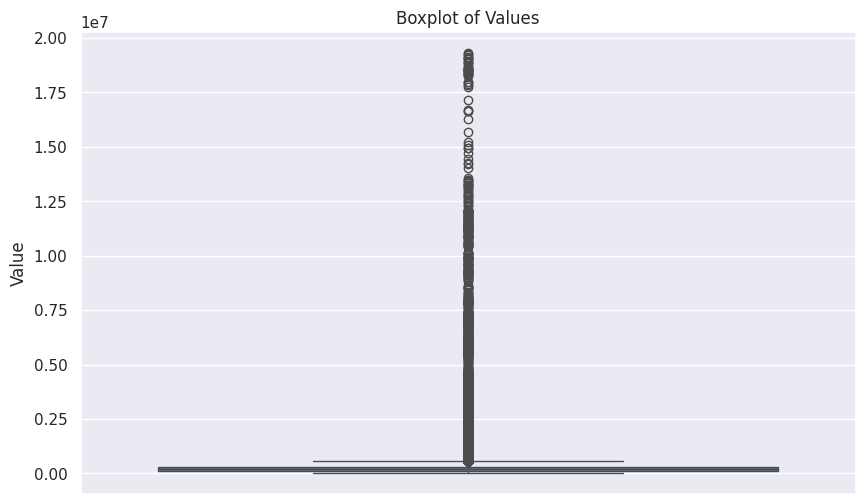

In [23]:
# Create a boxplot for the 'value' column
plt.figure(figsize=(10, 6))
sns.boxplot(y=df2['value'])
plt.title('Boxplot of Values')
plt.ylabel('Value')
plt.show()


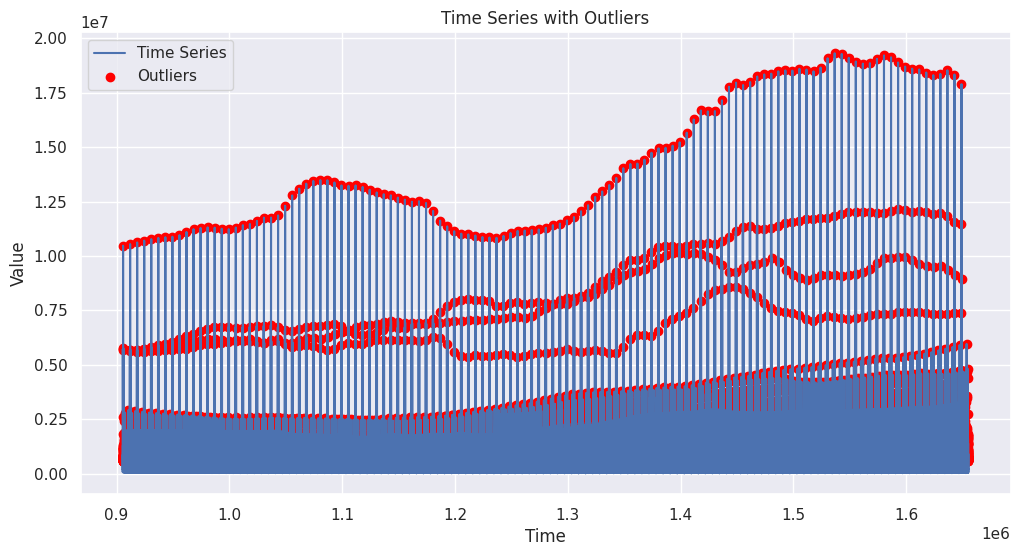

In [24]:
# Outlier detection
Q1 = df2['value'].quantile(0.25)
Q3 = df2['value'].quantile(0.75)
IQR = Q3 - Q1
outliers = df2[(df2['value'] < (Q1 - 1.5 * IQR)) | (df2['value'] > (Q3 + 1.5 * IQR))]

plt.figure(figsize=(12, 6))
plt.plot(df2.index, df2['value'], label='Time Series')
plt.scatter(outliers.index, outliers['value'], color='red', label='Outliers')
plt.title('Time Series with Outliers')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


Checking for outliers in the value column. There was no significant outlier in the data.

#### Using ROI to identify most suitable zipcodes to invest in

We used Return on Investment(ROI) to identify the top 5 zipcodes that would be most profitable to invest in.

In [25]:
# Calculate the initial and final values for each ZipCode
initial_values = df2.groupby('ZipCode').first()['value']
final_values = df2.groupby('ZipCode').last()['value']

# Calculate ROI for each ZipCode
roi = (final_values - initial_values) / initial_values * 100

# Convert the Series to a DataFrame for easier handling
roi_df = roi.reset_index()
roi_df.columns = ['ZipCode', 'ROI']

# Identify the top 5 zip codes with the highest ROI
top_5_zipcodes = roi_df.nlargest(5, 'ROI')

top_5_zipcodes

ZipCode         ROI
1623    30032  219.014085
4903    85035  211.411992
5666    94043  162.645570
5696    94301  159.556130
513     11222  158.812030

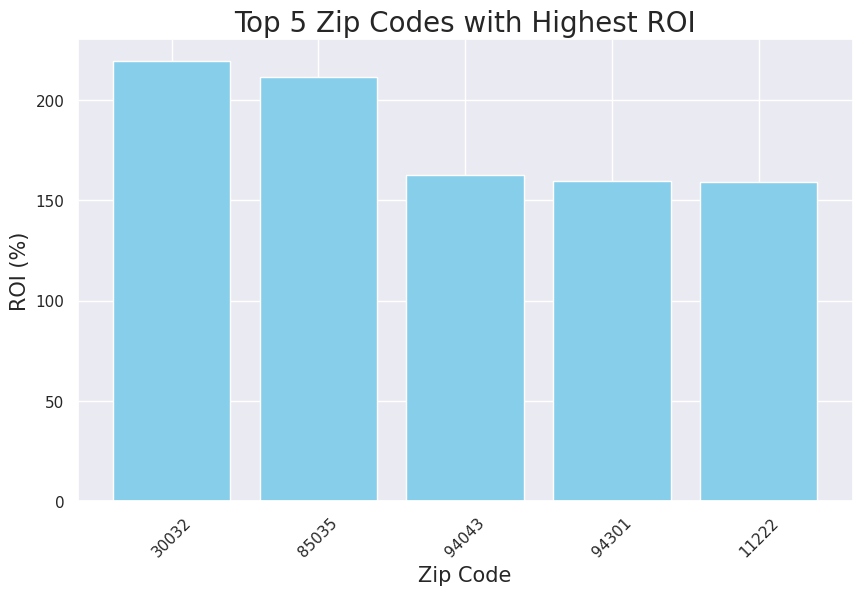

In [26]:
# Plot the bar graph for the top 5 zip codes
plt.figure(figsize=(10, 6))
plt.bar(top_5_zipcodes['ZipCode'].astype(str), top_5_zipcodes['ROI'], color='skyblue')
plt.xlabel('Zip Code', fontsize=15)
plt.ylabel('ROI (%)', fontsize=15)
plt.title('Top 5 Zip Codes with Highest ROI', fontsize=20)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [27]:
merged_df = pd.merge(df2, top_5_zipcodes, on='ZipCode')
merged_df

RegionID  ZipCode            City State CountyName  SizeRank  \
0       62033    11222        New York    NY      Kings      1156   
1       62033    11222        New York    NY      Kings      1156   
2       62033    11222        New York    NY      Kings      1156   
3       62033    11222        New York    NY      Kings      1156   
4       62033    11222        New York    NY      Kings      1156   
..        ...      ...             ...   ...        ...       ...   
507     70817    30032  Candler-Mcafee    GA     Dekalb       843   
508     70817    30032  Candler-Mcafee    GA     Dekalb       843   
509     70817    30032  Candler-Mcafee    GA     Dekalb       843   
510     70817    30032  Candler-Mcafee    GA     Dekalb       843   
511     70817    30032  Candler-Mcafee    GA     Dekalb       843   

                    time     value         ROI  
0    2008-05-01 00:00:00  665000.0  158.812030  
1    2008-06-01 00:00:00  656200.0  158.812030  
2    2008-07-01 00:00:00  647100.0  158.812030  
3    2008-08-01 00:00:00  640900.0  158.812030  
4    2008-09-01 00:00:00  637900.0  158.812030  
..                   ...       ...         ...  
507  2017-12-01 00:00:00  122300.0  219.014085  
508  2018-01-01 00:00:00  125400.0  219.014085  
509  2018-02-01 00:00:00  128600.0  219.014085  
510  2018-03-01 00:00:00  132800.0  219.014085  
511  2018-04-01 00:00:00  135900.0  219.014085  

[512 rows x 9 columns]

In [28]:
df3 = merged_df
df3

RegionID  ZipCode            City State CountyName  SizeRank  \
0       62033    11222        New York    NY      Kings      1156   
1       62033    11222        New York    NY      Kings      1156   
2       62033    11222        New York    NY      Kings      1156   
3       62033    11222        New York    NY      Kings      1156   
4       62033    11222        New York    NY      Kings      1156   
..        ...      ...             ...   ...        ...       ...   
507     70817    30032  Candler-Mcafee    GA     Dekalb       843   
508     70817    30032  Candler-Mcafee    GA     Dekalb       843   
509     70817    30032  Candler-Mcafee    GA     Dekalb       843   
510     70817    30032  Candler-Mcafee    GA     Dekalb       843   
511     70817    30032  Candler-Mcafee    GA     Dekalb       843   

                    time     value         ROI  
0    2008-05-01 00:00:00  665000.0  158.812030  
1    2008-06-01 00:00:00  656200.0  158.812030  
2    2008-07-01 00:00:00  647100.0  158.812030  
3    2008-08-01 00:00:00  640900.0  158.812030  
4    2008-09-01 00:00:00  637900.0  158.812030  
..                   ...       ...         ...  
507  2017-12-01 00:00:00  122300.0  219.014085  
508  2018-01-01 00:00:00  125400.0  219.014085  
509  2018-02-01 00:00:00  128600.0  219.014085  
510  2018-03-01 00:00:00  132800.0  219.014085  
511  2018-04-01 00:00:00  135900.0  219.014085  

[512 rows x 9 columns]

## C. RESAMPLING

##### Monythly data

In [29]:
# Convert 'time' to datetime
df3['time'] = pd.to_datetime(df3['time'])
# Extract year
df3['year'] = df3['time'].dt.year

# Group by year and calculate mean
df_monthly = df3.groupby(['RegionID', 'ZipCode', 'City', 'State', 'CountyName', 'SizeRank', 'time']).agg({'value': 'mean', 'ROI': 'mean'}).reset_index()

# C# Convert 'time' column to datetime format with only the year
df_monthly['time'] = pd.to_datetime(df_monthly['time'], format='%Y')

# Set the 'time' column as the index
df_monthly.set_index('time', inplace=True)

# Sort the DataFrame by the datetime index (optional but recommended)
df_monthly.sort_index(inplace=True)

# Display the DataFrame to verify the changes
df_monthly

RegionID  ZipCode            City State   CountyName  SizeRank  \
time                                                                         
2008-05-01     62033    11222        New York    NY        Kings      1156   
2008-05-01     97691    94301       Palo Alto    CA  Santa Clara      5739   
2008-05-01     97530    94043   Mountain View    CA  Santa Clara      2581   
2008-06-01     62033    11222        New York    NY        Kings      1156   
2008-06-01     97691    94301       Palo Alto    CA  Santa Clara      5739   
...              ...      ...             ...   ...          ...       ...   
2018-04-01     62033    11222        New York    NY        Kings      1156   
2018-04-01     97530    94043   Mountain View    CA  Santa Clara      2581   
2018-04-01     70817    30032  Candler-Mcafee    GA       Dekalb       843   
2018-04-01     94751    85035         Phoenix    AZ     Maricopa      1947   
2018-04-01     97691    94301       Palo Alto    CA  Santa Clara      5739   

                value         ROI  
time                               
2008-05-01   665000.0  158.812030  
2008-05-01  1856400.0  159.556130  
2008-05-01   790000.0  162.645570  
2008-06-01   656200.0  158.812030  
2008-06-01  1835900.0  159.556130  
...               ...         ...  
2018-04-01  1721100.0  158.812030  
2018-04-01  2074900.0  162.645570  
2018-04-01   135900.0  219.014085  
2018-04-01   161000.0  211.411992  
2018-04-01  4818400.0  159.556130  

[512 rows x 8 columns]

In [30]:
# Resample the data to monthly frequency and calculate the mean for each group
resampled_df = df_monthly.groupby(['RegionID', 'ZipCode', 'City', 'State', 'CountyName', 'SizeRank']).resample('M').mean().reset_index()
resampled_df

RegionID  ZipCode       City State   CountyName  SizeRank       time  \
0       62033    11222   New York    NY        Kings      1156 2008-05-31   
1       62033    11222   New York    NY        Kings      1156 2008-06-30   
2       62033    11222   New York    NY        Kings      1156 2008-07-31   
3       62033    11222   New York    NY        Kings      1156 2008-08-31   
4       62033    11222   New York    NY        Kings      1156 2008-09-30   
..        ...      ...        ...   ...          ...       ...        ...   
507     97691    94301  Palo Alto    CA  Santa Clara      5739 2017-12-31   
508     97691    94301  Palo Alto    CA  Santa Clara      5739 2018-01-31   
509     97691    94301  Palo Alto    CA  Santa Clara      5739 2018-02-28   
510     97691    94301  Palo Alto    CA  Santa Clara      5739 2018-03-31   
511     97691    94301  Palo Alto    CA  Santa Clara      5739 2018-04-30   

         value        ROI  
0     665000.0  158.81203  
1     656200.0  158.81203  
2     647100.0  158.81203  
3     640900.0  158.81203  
4     637900.0  158.81203  
..         ...        ...  
507  4544700.0  159.55613  
508  4595100.0  159.55613  
509  4668700.0  159.55613  
510  4762600.0  159.55613  
511  4818400.0  159.55613  

[512 rows x 9 columns]

In [31]:
df4 =df_monthly
df4

RegionID  ZipCode            City State   CountyName  SizeRank  \
time                                                                         
2008-05-01     62033    11222        New York    NY        Kings      1156   
2008-05-01     97691    94301       Palo Alto    CA  Santa Clara      5739   
2008-05-01     97530    94043   Mountain View    CA  Santa Clara      2581   
2008-06-01     62033    11222        New York    NY        Kings      1156   
2008-06-01     97691    94301       Palo Alto    CA  Santa Clara      5739   
...              ...      ...             ...   ...          ...       ...   
2018-04-01     62033    11222        New York    NY        Kings      1156   
2018-04-01     97530    94043   Mountain View    CA  Santa Clara      2581   
2018-04-01     70817    30032  Candler-Mcafee    GA       Dekalb       843   
2018-04-01     94751    85035         Phoenix    AZ     Maricopa      1947   
2018-04-01     97691    94301       Palo Alto    CA  Santa Clara      5739   

                value         ROI  
time                               
2008-05-01   665000.0  158.812030  
2008-05-01  1856400.0  159.556130  
2008-05-01   790000.0  162.645570  
2008-06-01   656200.0  158.812030  
2008-06-01  1835900.0  159.556130  
...               ...         ...  
2018-04-01  1721100.0  158.812030  
2018-04-01  2074900.0  162.645570  
2018-04-01   135900.0  219.014085  
2018-04-01   161000.0  211.411992  
2018-04-01  4818400.0  159.556130  

[512 rows x 8 columns]

##### Quarterly data

In [32]:
# Extract year and quarter
df_monthly['year'] = df_monthly.index.year
df_monthly['quarter'] = df_monthly.index.quarter

# Group by year, quarter, and other columns, then calculate mean
df_quarterly = df_monthly.groupby(['RegionID', 'ZipCode', 'City', 'State', 'CountyName', 'SizeRank', 'year', 'quarter']).agg({'value': 'mean', 'ROI': 'mean'}).reset_index()

# Display the result
df_quarterly

RegionID  ZipCode       City State   CountyName  SizeRank  year  quarter  \
0       62033    11222   New York    NY        Kings      1156  2008        2   
1       62033    11222   New York    NY        Kings      1156  2008        3   
2       62033    11222   New York    NY        Kings      1156  2008        4   
3       62033    11222   New York    NY        Kings      1156  2009        1   
4       62033    11222   New York    NY        Kings      1156  2009        2   
..        ...      ...        ...   ...          ...       ...   ...      ...   
170     97691    94301  Palo Alto    CA  Santa Clara      5739  2017        2   
171     97691    94301  Palo Alto    CA  Santa Clara      5739  2017        3   
172     97691    94301  Palo Alto    CA  Santa Clara      5739  2017        4   
173     97691    94301  Palo Alto    CA  Santa Clara      5739  2018        1   
174     97691    94301  Palo Alto    CA  Santa Clara      5739  2018        2   

            value        ROI  
0    6.606000e+05  158.81203  
1    6.419667e+05  158.81203  
2    6.346000e+05  158.81203  
3    6.304000e+05  158.81203  
4    6.181333e+05  158.81203  
..            ...        ...  
170  4.112500e+06  159.55613  
171  4.251733e+06  159.55613  
172  4.475833e+06  159.55613  
173  4.675467e+06  159.55613  
174  4.818400e+06  159.55613  

[175 rows x 10 columns]

##### Yearly Data

In [33]:
# Yearly data
# Extract year
df3['year'] = df3['time'].dt.year

# Group by year and calculate mean
df_yearly = df3.groupby(['RegionID', 'ZipCode', 'City', 'State', 'CountyName', 'SizeRank', 'year']).agg({'value': 'mean', 'ROI': 'mean'}).reset_index()

# Display the result
df_yearly

RegionID  ZipCode            City State   CountyName  SizeRank  year  \
0      62033    11222        New York    NY        Kings      1156  2008   
1      62033    11222        New York    NY        Kings      1156  2009   
2      62033    11222        New York    NY        Kings      1156  2010   
3      62033    11222        New York    NY        Kings      1156  2011   
4      62033    11222        New York    NY        Kings      1156  2012   
5      62033    11222        New York    NY        Kings      1156  2013   
6      62033    11222        New York    NY        Kings      1156  2014   
7      62033    11222        New York    NY        Kings      1156  2015   
8      62033    11222        New York    NY        Kings      1156  2016   
9      62033    11222        New York    NY        Kings      1156  2017   
10     62033    11222        New York    NY        Kings      1156  2018   
11     70817    30032  Candler-Mcafee    GA       Dekalb       843  2013   
12     70817    30032  Candler-Mcafee    GA       Dekalb       843  2014   
13     70817    30032  Candler-Mcafee    GA       Dekalb       843  2015   
14     70817    30032  Candler-Mcafee    GA       Dekalb       843  2016   
15     70817    30032  Candler-Mcafee    GA       Dekalb       843  2017   
16     70817    30032  Candler-Mcafee    GA       Dekalb       843  2018   
17     94751    85035         Phoenix    AZ     Maricopa      1947  2010   
18     94751    85035         Phoenix    AZ     Maricopa      1947  2011   
19     94751    85035         Phoenix    AZ     Maricopa      1947  2012   
20     94751    85035         Phoenix    AZ     Maricopa      1947  2013   
21     94751    85035         Phoenix    AZ     Maricopa      1947  2014   
22     94751    85035         Phoenix    AZ     Maricopa      1947  2015   
23     94751    85035         Phoenix    AZ     Maricopa      1947  2016   
24     94751    85035         Phoenix    AZ     Maricopa      1947  2017   
25     94751    85035         Phoenix    AZ     Maricopa      1947  2018   
26     97530    94043   Mountain View    CA  Santa Clara      2581  2008   
27     97530    94043   Mountain View    CA  Santa Clara      2581  2009   
28     97530    94043   Mountain View    CA  Santa Clara      2581  2010   
29     97530    94043   Mountain View    CA  Santa Clara      2581  2011   
30     97530    94043   Mountain View    CA  Santa Clara      2581  2012   
31     97530    94043   Mountain View    CA  Santa Clara      2581  2013   
32     97530    94043   Mountain View    CA  Santa Clara      2581  2014   
33     97530    94043   Mountain View    CA  Santa Clara      2581  2015   
34     97530    94043   Mountain View    CA  Santa Clara      2581  2016   
35     97530    94043   Mountain View    CA  Santa Clara      2581  2017   
36     97530    94043   Mountain View    CA  Santa Clara      2581  2018   
37     97691    94301       Palo Alto    CA  Santa Clara      5739  2008   
38     97691    94301       Palo Alto    CA  Santa Clara      5739  2009   
39     97691    94301       Palo Alto    CA  Santa Clara      5739  2010   
40     97691    94301       Palo Alto    CA  Santa Clara      5739  2011   
41     97691    94301       Palo Alto    CA  Santa Clara      5739  2012   
42     97691    94301       Palo Alto    CA  Santa Clara      5739  2013   
43     97691    94301       Palo Alto    CA  Santa Clara      5739  2014   
44     97691    94301       Palo Alto    CA  Santa Clara      5739  2015   
45     97691    94301       Palo Alto    CA  Santa Clara      5739  2016   
46     97691    94301       Palo Alto    CA  Santa Clara      5739  2017   
47     97691    94301       Palo Alto    CA  Santa Clara      5739  2018   

           value         ROI  
0   6.438625e+05  158.812030  
1   6.145083e+05  158.812030  
2   6.053500e+05  158.812030  
3   7.035750e+05  158.812030  
4   7.142250e+05  158.812030  
5   8.288417e+05  158.812030  
6   1.000142e+06  158.812030  
7   1.340867e+06  158.812030  


## D. EXPLORATORY DATA ANALYSIS
In this section we will consider:
* Univatiate Analysis,
* Bivariate
* Multivariate Analysis


#### Univariate Analysis

In [34]:
df4 = df_monthly
df4


RegionID  ZipCode            City State   CountyName  SizeRank  \
time                                                                         
2008-05-01     62033    11222        New York    NY        Kings      1156   
2008-05-01     97691    94301       Palo Alto    CA  Santa Clara      5739   
2008-05-01     97530    94043   Mountain View    CA  Santa Clara      2581   
2008-06-01     62033    11222        New York    NY        Kings      1156   
2008-06-01     97691    94301       Palo Alto    CA  Santa Clara      5739   
...              ...      ...             ...   ...          ...       ...   
2018-04-01     62033    11222        New York    NY        Kings      1156   
2018-04-01     97530    94043   Mountain View    CA  Santa Clara      2581   
2018-04-01     70817    30032  Candler-Mcafee    GA       Dekalb       843   
2018-04-01     94751    85035         Phoenix    AZ     Maricopa      1947   
2018-04-01     97691    94301       Palo Alto    CA  Santa Clara      5739   

                value         ROI  year  quarter  
time                                              
2008-05-01   665000.0  158.812030  2008        2  
2008-05-01  1856400.0  159.556130  2008        2  
2008-05-01   790000.0  162.645570  2008        2  
2008-06-01   656200.0  158.812030  2008        2  
2008-06-01  1835900.0  159.556130  2008        2  
...               ...         ...   ...      ...  
2018-04-01  1721100.0  158.812030  2018        2  
2018-04-01  2074900.0  162.645570  2018        2  
2018-04-01   135900.0  219.014085  2018        2  
2018-04-01   161000.0  211.411992  2018        2  
2018-04-01  4818400.0  159.556130  2018        2  

[512 rows x 10 columns]

           RegionID       ZipCode     SizeRank         value         ROI  \
count    512.000000    512.000000   512.000000  5.120000e+02  512.000000   
mean   85711.835938  65787.238281  2673.890625  1.167595e+06  176.361703   
std    15439.476123  35928.518772  1796.383635  1.121869e+06   24.805399   
min    62033.000000  11222.000000   843.000000  4.260000e+04  158.812030   
25%    70817.000000  30032.000000  1156.000000  1.295750e+05  159.556130   
50%    94751.000000  85035.000000  1947.000000  7.810000e+05  162.645570   
75%    97530.000000  94043.000000  2581.000000  1.661650e+06  211.411992   
max    97691.000000  94301.000000  5739.000000  4.818400e+06  219.014085   

              year     quarter  
count   512.000000  512.000000  
mean   2013.324219    2.503906  
std       2.811835    1.122612  
min    2008.000000    1.000000  
25%    2011.000000    1.000000  
50%    2014.000000    3.000000  
75%    2016.000000    4.000000  
max    2018.000000    4.000000  


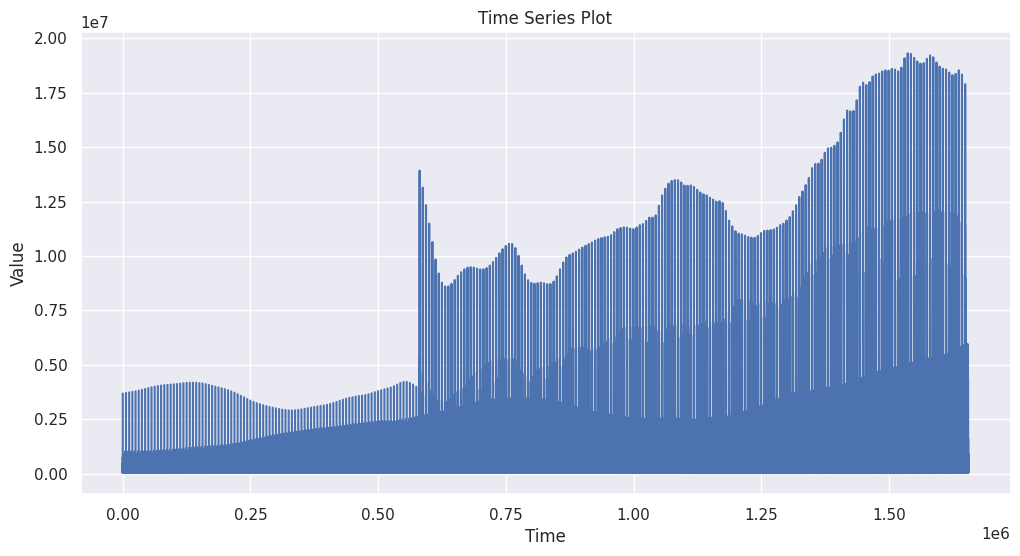

In [35]:
# Basic exploration
print(df4.describe())
plt.figure(figsize=(12, 6))
plt.plot(df['value'])
plt.title('Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

#### Change in House Prices for the top 5 Zip Codes

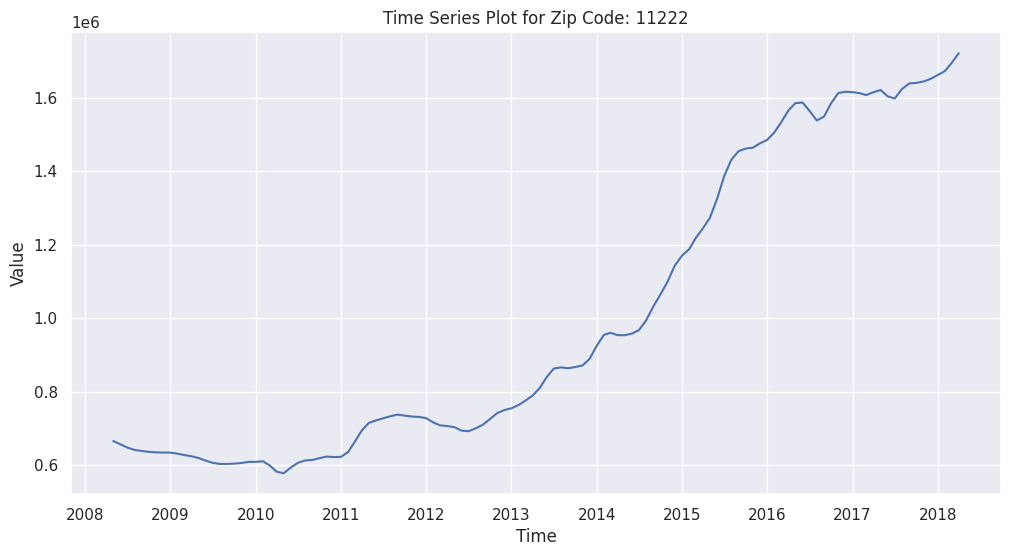

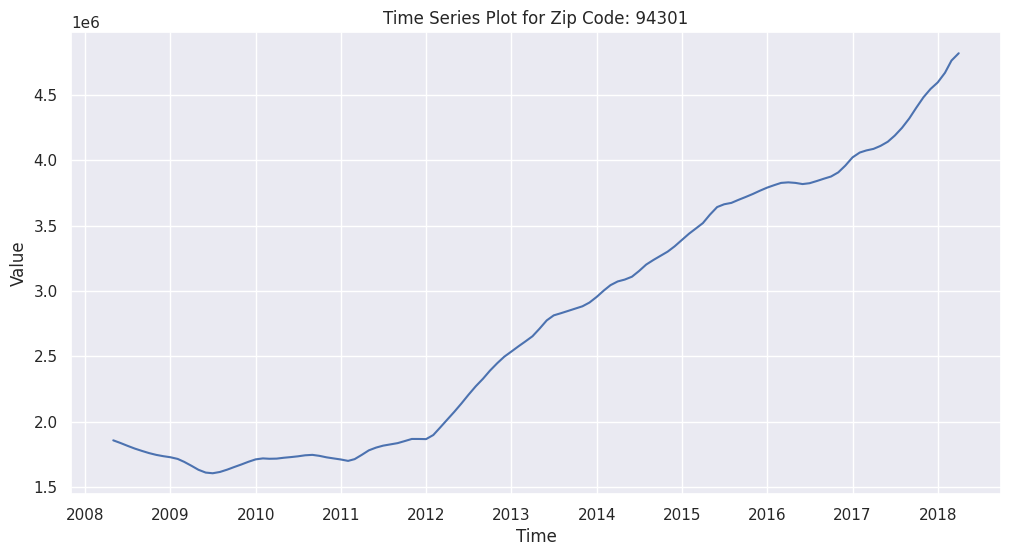

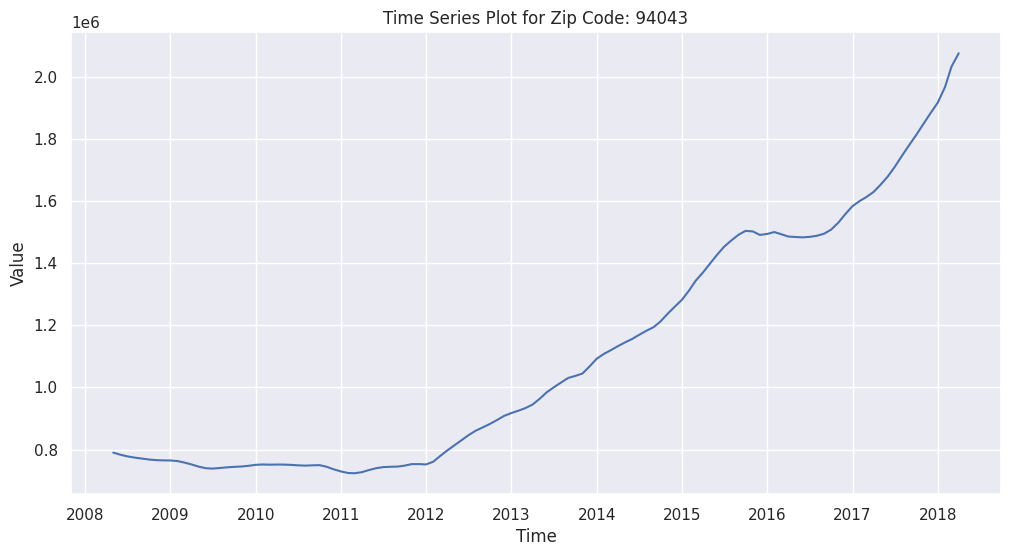

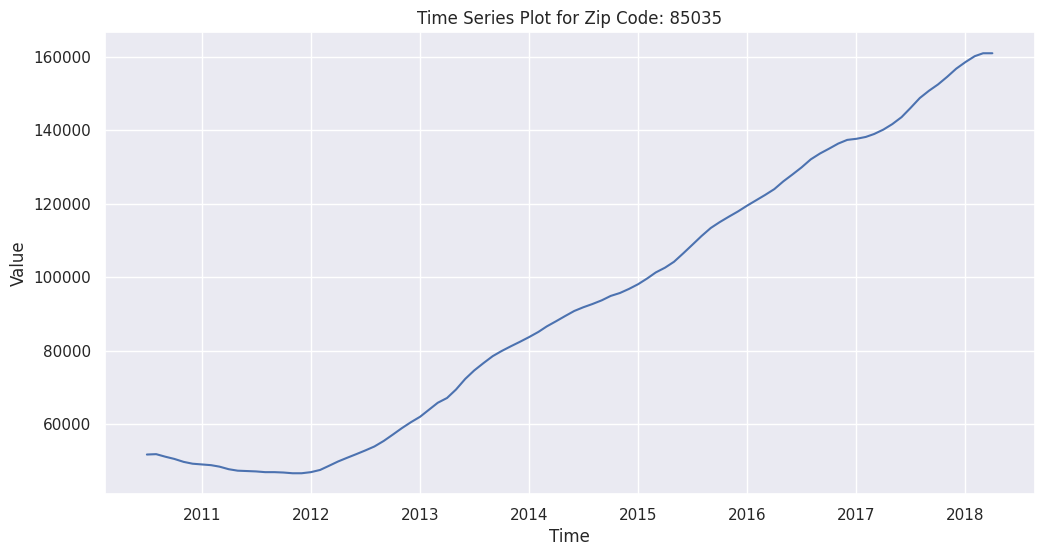

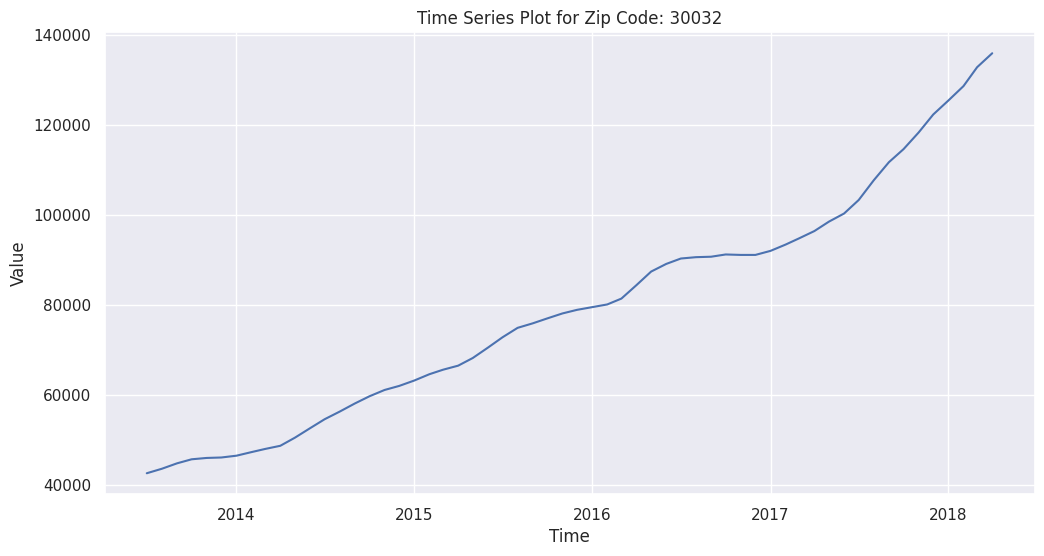

In [36]:
import matplotlib.pyplot as plt

# Get unique zip codes
zip_codes = df4['ZipCode'].unique()

# Plot each zip code in a separate figure
for zip_code in zip_codes:
    # Filter the DataFrame for each zip code
    df_zip = df4[df4['ZipCode'] == zip_code]

    # Create a new figure for each zip code
    plt.figure(figsize=(12, 6))
    plt.plot(df_zip.index, df_zip['value'])
    plt.title(f'Time Series Plot for Zip Code: {zip_code}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)

    # Show the plot
    plt.show()

There is a notable positive trend/slope where the home value is increasing over time for each of the individual zip codes

Univariate Analysis:
            RegionID       ZipCode      City State   CountyName     SizeRank  \
count     512.000000    512.000000       512   512          512   512.000000   
unique           NaN           NaN         5     4            4          NaN   
top              NaN           NaN  New York    CA  Santa Clara          NaN   
freq             NaN           NaN       120   240          240          NaN   
mean    85711.835938  65787.238281       NaN   NaN          NaN  2673.890625   
std     15439.476123  35928.518772       NaN   NaN          NaN  1796.383635   
min     62033.000000  11222.000000       NaN   NaN          NaN   843.000000   
25%     70817.000000  30032.000000       NaN   NaN          NaN  1156.000000   
50%     94751.000000  85035.000000       NaN   NaN          NaN  1947.000000   
75%     97530.000000  94043.000000       NaN   NaN          NaN  2581.000000   
max     97691.000000  94301.000000       NaN   NaN          NaN  5739.000000   

               val

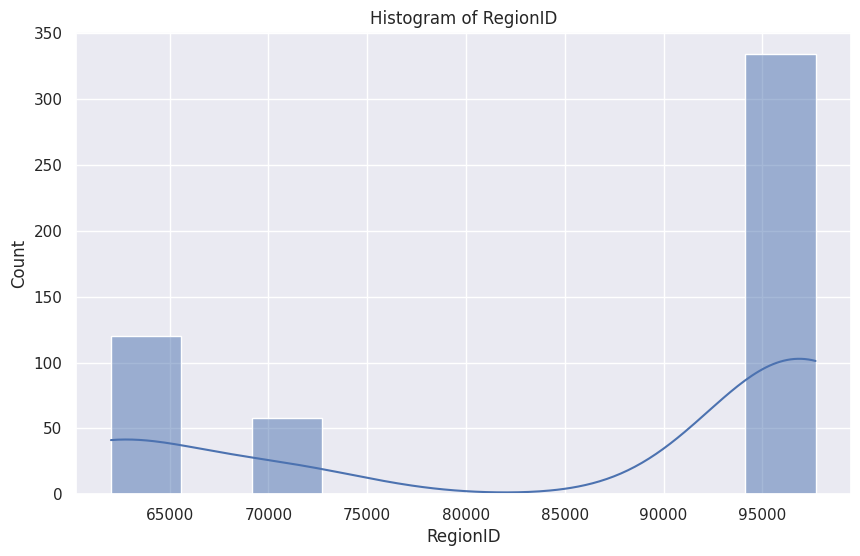

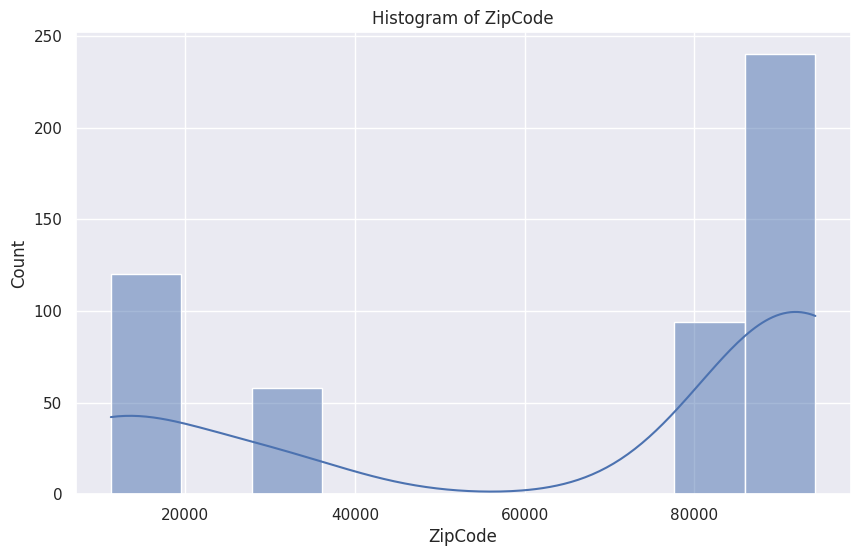

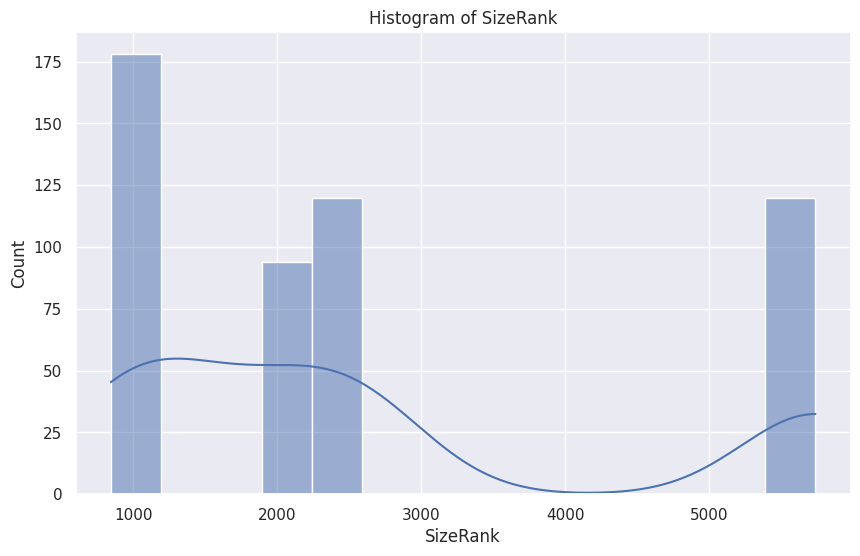

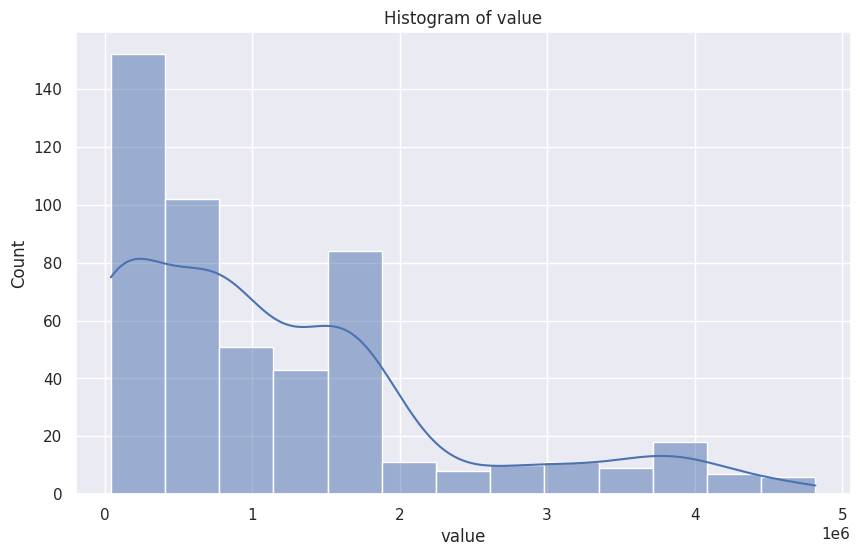

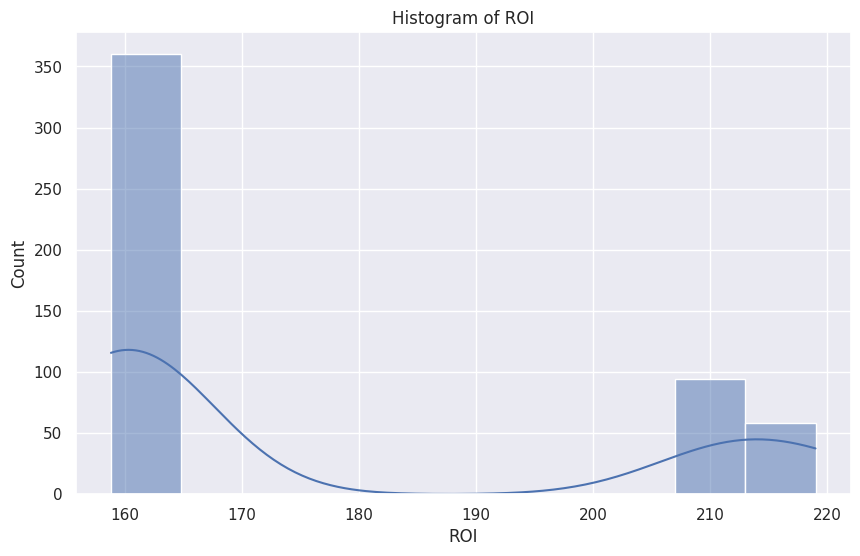

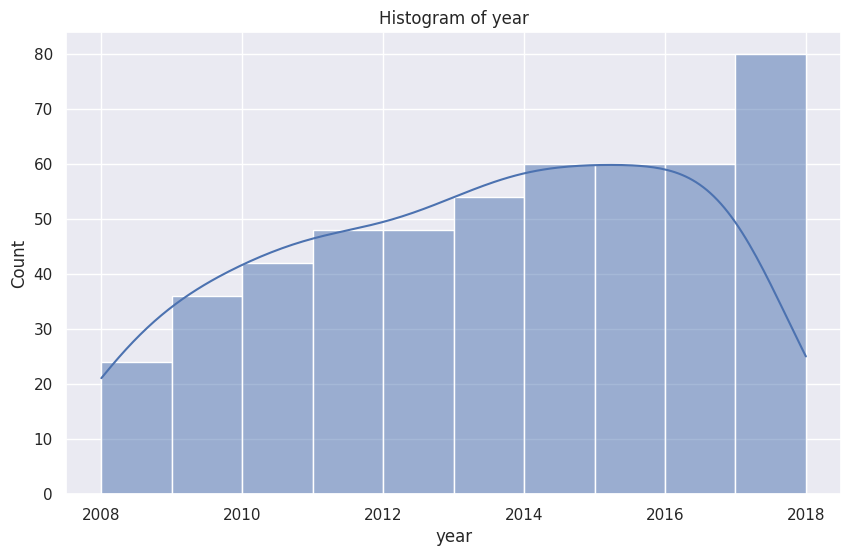

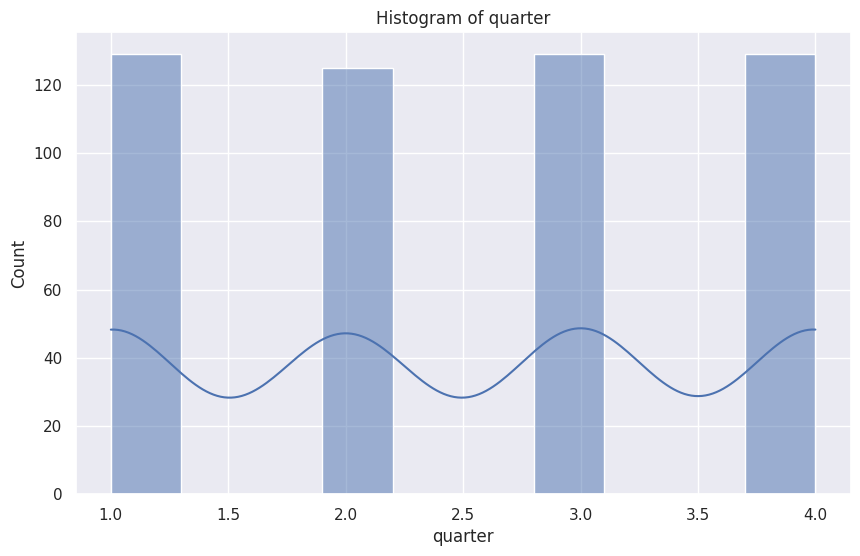

In [37]:
# Univariate Analysis
print("Univariate Analysis:")
print(df4.describe(include='all'))

# Plot histograms for numeric variables
numeric_columns = df4.select_dtypes(include='number').columns
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df4[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

* Most of the properties range between $50,000 and $100,000. From there there is a steep decline in the number of properties as value increases.
* Most properties registered an ROI of between 210% - 220%


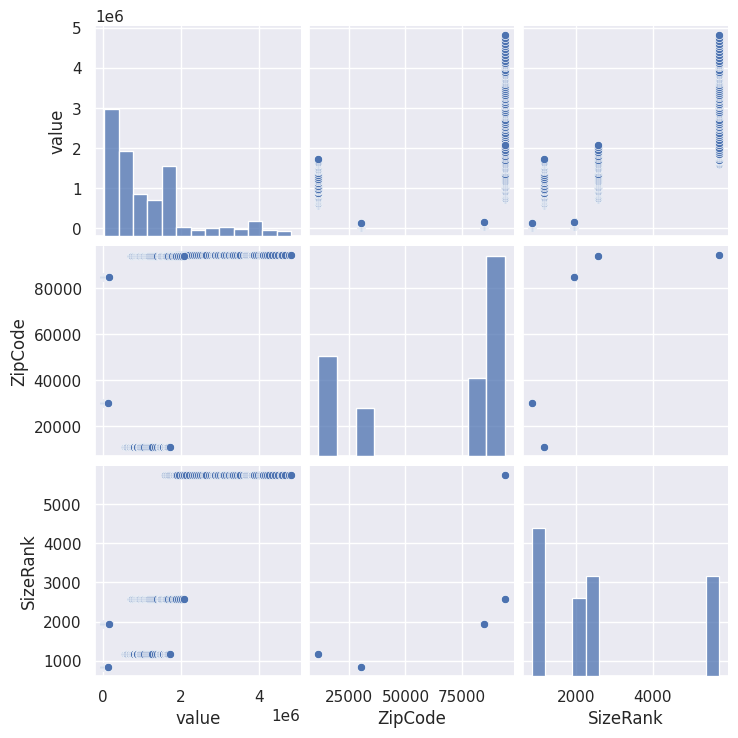

             value   ZipCode  SizeRank
value     1.000000  0.324519  0.786196
ZipCode   0.324519  1.000000  0.685050
SizeRank  0.786196  0.685050  1.000000


In [38]:
# Bivariate Analysis: Scatter plots and Correlation
# Ensure 'ZipCode' is numeric if necessary
df4['ZipCode'] = pd.to_numeric(df4['ZipCode'], errors='coerce')

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
df4_cleaned = df4.copy()

# Replace any infinite values in the DataFrame to NaN
df4_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)

# List of numeric columns
numeric_columns = ['value', 'ZipCode', 'SizeRank']

# Drop any rows with NaN values in the numeric columns to avoid issues in pairplot
df4_cleaned = df4_cleaned[numeric_columns].dropna()

# Plot scatter plots for numeric variable pairs
sns.pairplot(df4_cleaned)
plt.show()

# Calculate correlation matrix
correlation_matrix = df4_cleaned.corr()

# Display the correlation matrix
print(correlation_matrix)

* Zip codes in the 80000 range have the higher valued properties while tge 40000 range mostly has the lower valued properties


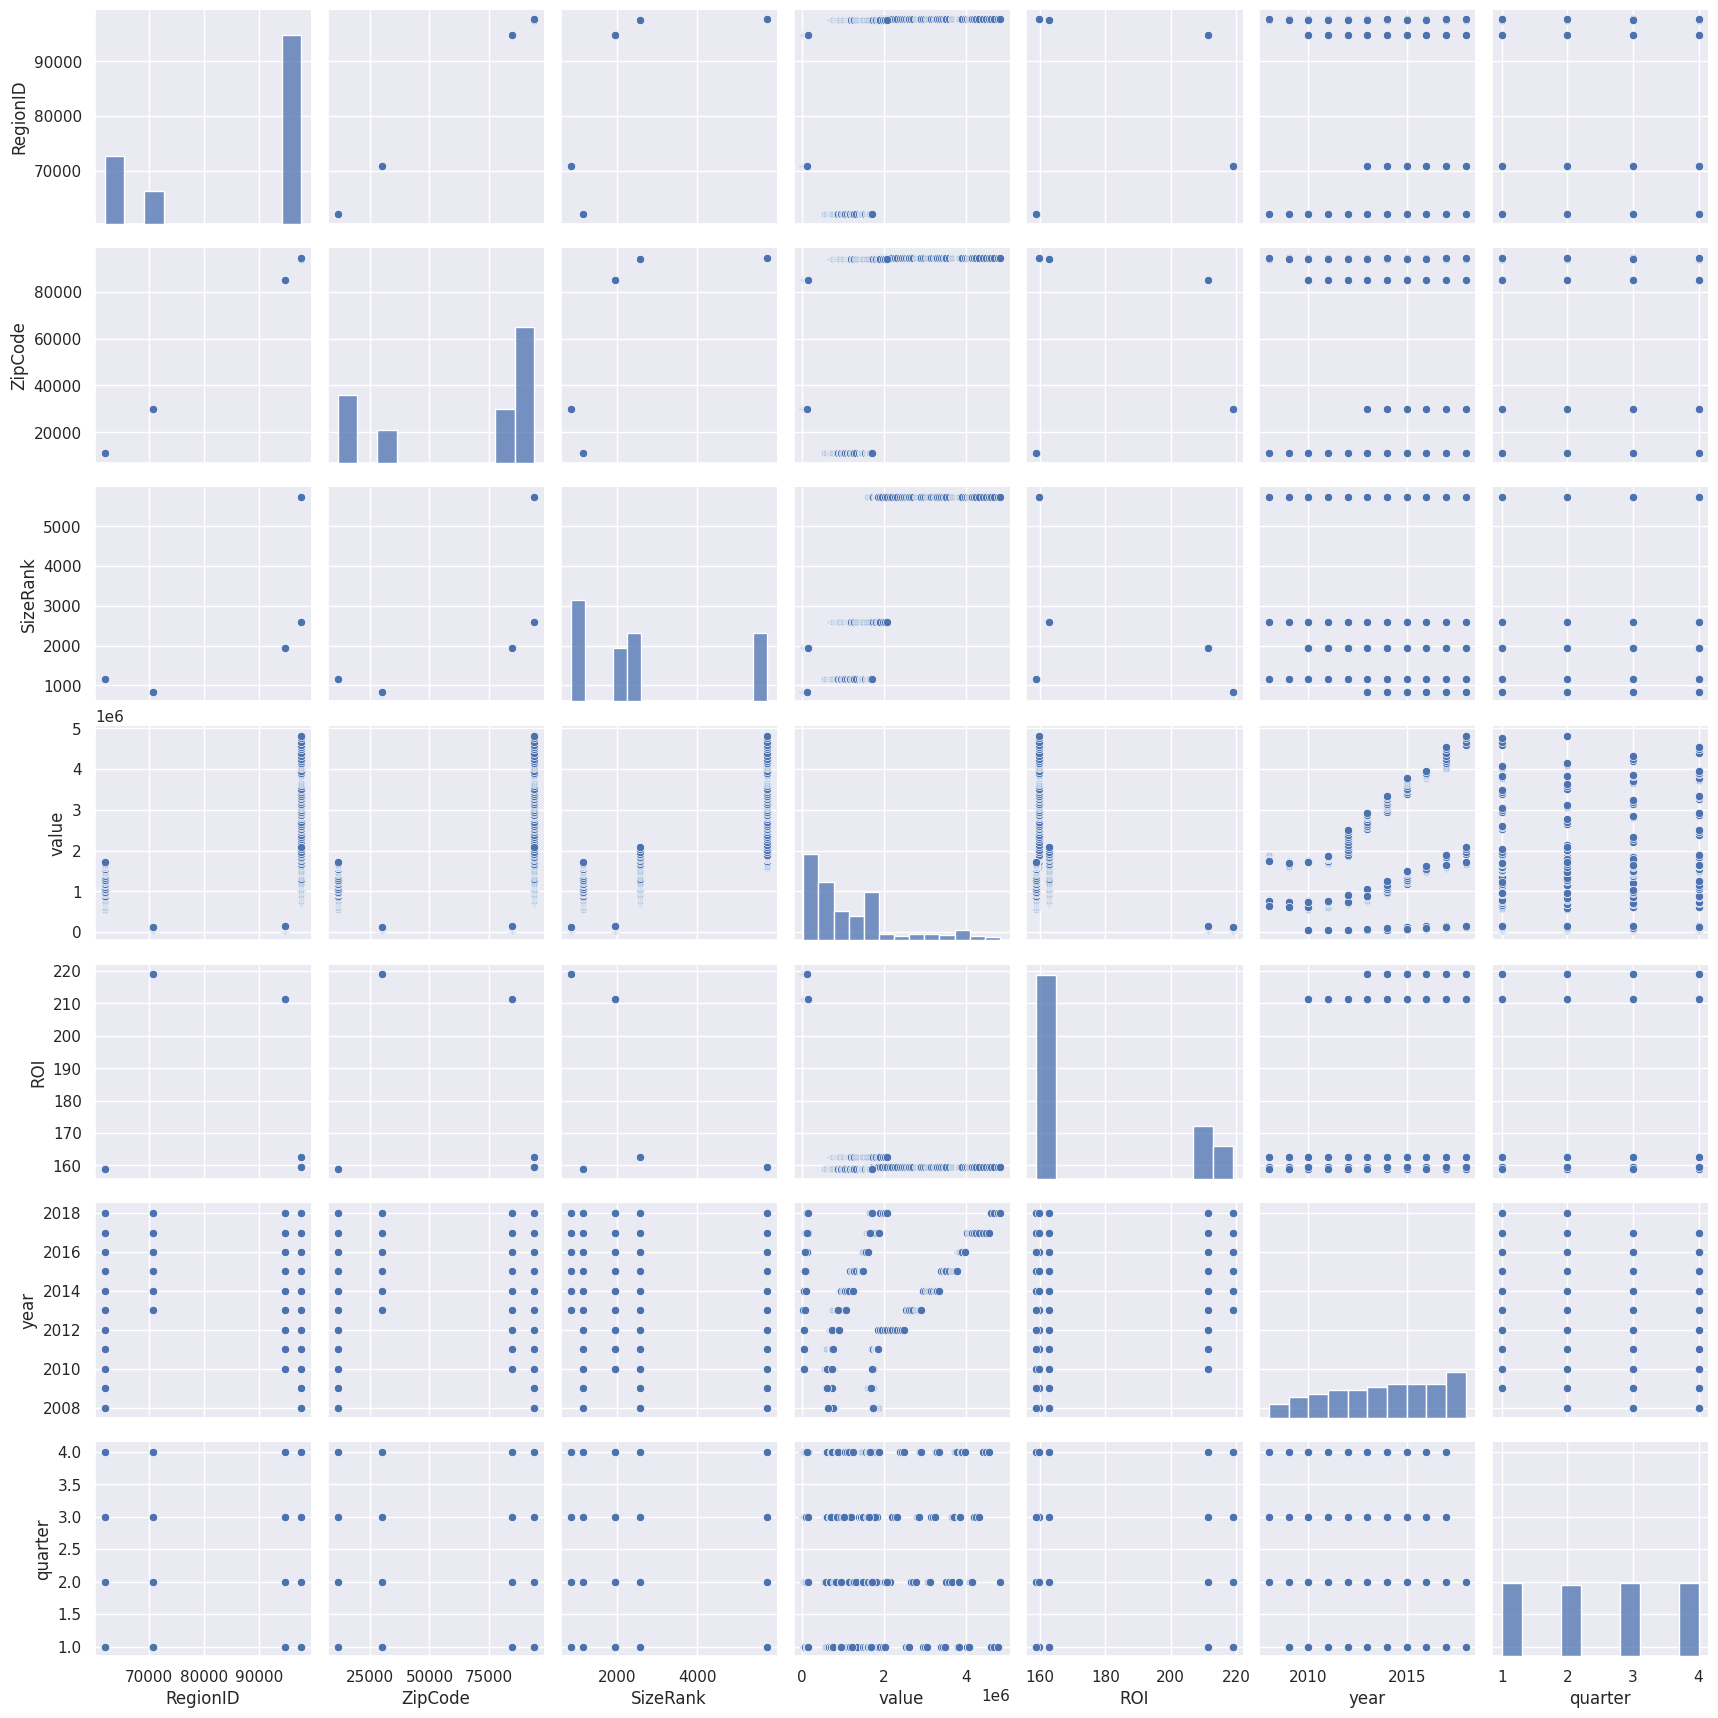

In [39]:
# Multivariate Analysis: Pair Plot
sns.pairplot(df4)
plt.show()

# Multiple Linear Regression to predict 'value' based on other numeric variables
import statsmodels.api as sm

# Define the dependent and independent variables
X = df4[['ZipCode', 'RegionID', 'SizeRank']]
y = df4['value']

# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression model summary
model_summary = model.summary()

## E. FEATURE ENGINEERING

1. Annual Features and Visualization per zipcode
2. Quarterly features and Visualization per zipcode
3. Monthly Features and Visualization per zipcode
4. Date-time Features
5. Window Features
6. Expanding Features

#### Visualization of Each Zipcode to identify different features of our data

In [40]:
df4.head()

RegionID  ZipCode           City State   CountyName  SizeRank  \
time                                                                        
2008-05-01     62033    11222       New York    NY        Kings      1156   
2008-05-01     97691    94301      Palo Alto    CA  Santa Clara      5739   
2008-05-01     97530    94043  Mountain View    CA  Santa Clara      2581   
2008-06-01     62033    11222       New York    NY        Kings      1156   
2008-06-01     97691    94301      Palo Alto    CA  Santa Clara      5739   

                value        ROI  year  quarter  
time                                             
2008-05-01   665000.0  158.81203  2008        2  
2008-05-01  1856400.0  159.55613  2008        2  
2008-05-01   790000.0  162.64557  2008        2  
2008-06-01   656200.0  158.81203  2008        2  
2008-06-01  1835900.0  159.55613  2008        2

#### 1. Annual/ Yearly Features

In [41]:
df_yearly.head()

RegionID  ZipCode      City State CountyName  SizeRank  year  \
0     62033    11222  New York    NY      Kings      1156  2008   
1     62033    11222  New York    NY      Kings      1156  2009   
2     62033    11222  New York    NY      Kings      1156  2010   
3     62033    11222  New York    NY      Kings      1156  2011   
4     62033    11222  New York    NY      Kings      1156  2012   

           value        ROI  
0  643862.500000  158.81203  
1  614508.333333  158.81203  
2  605350.000000  158.81203  
3  703575.000000  158.81203  
4  714225.000000  158.81203

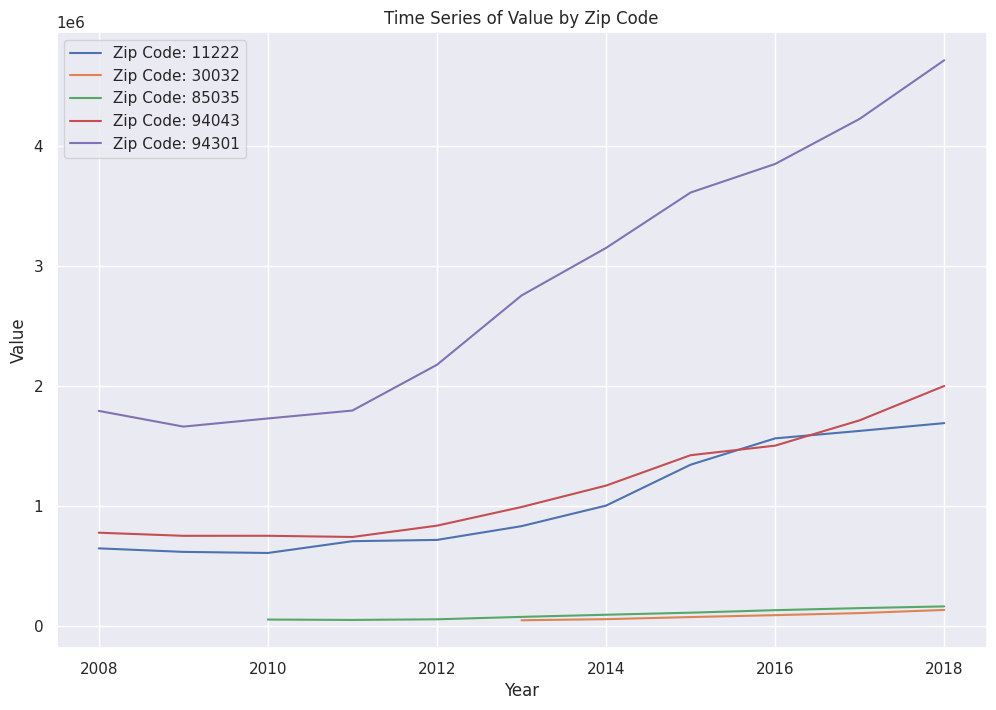

In [42]:
# Plotting the time series for different selected zipcodes
# Get unique zip codes
zip_codes = df_yearly['ZipCode'].unique()

# Create subplots
plt.figure(figsize=(12, 8))

# Plot each zip code in a separate line plot
for zip_code in zip_codes:
    df_zip = df_yearly[df_yearly['ZipCode'] == zip_code]
    plt.plot(df_zip['year'], df_zip['value'], label=f'Zip Code: {zip_code}')

# Customize the plot
plt.title('Time Series of Value by Zip Code')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

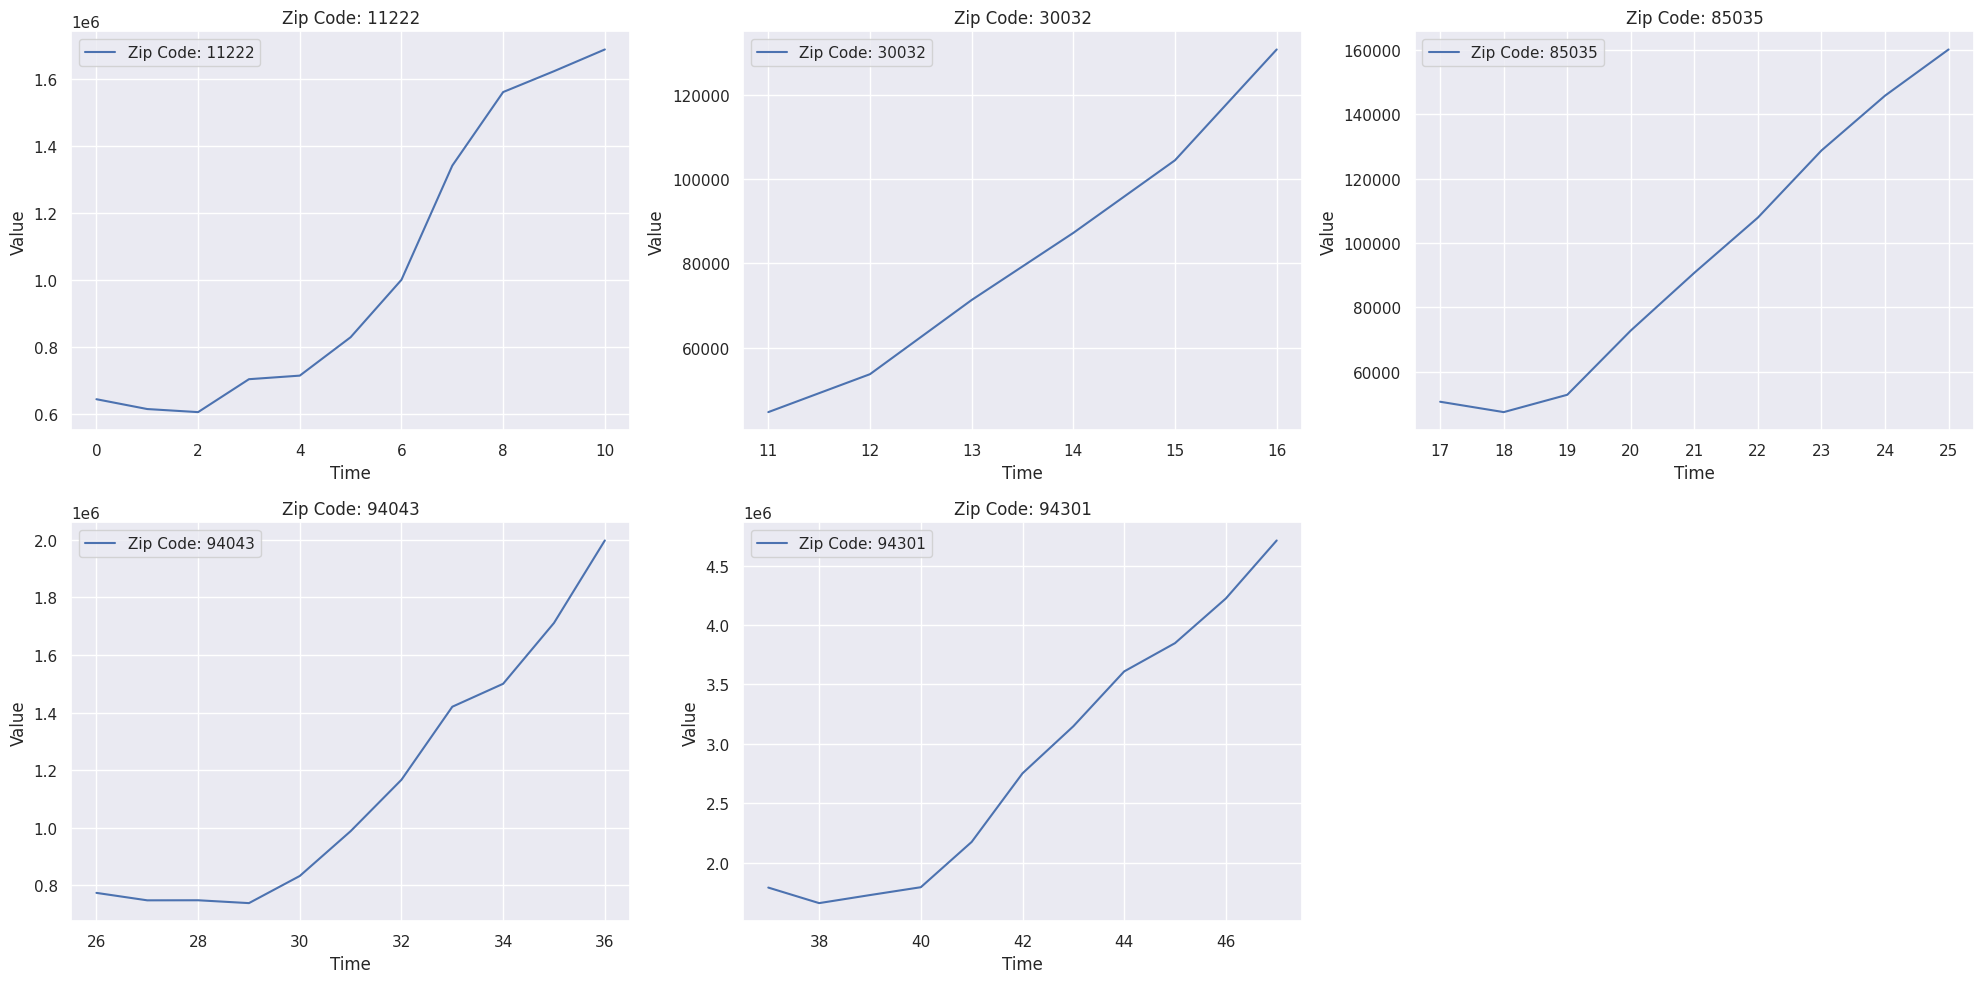

In [43]:
# Plotting the time series for different selected zipcodes
# Get unique zip codes
zip_codes = df_yearly['ZipCode'].unique()

# Define the number of rows and columns for subplots
num_zip_codes = len(zip_codes)
num_cols = 3  # Number of columns for subplots
num_rows = (num_zip_codes + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axs = axs.flatten()  # Flatten the array of axes for easy iteration

# Plot each zip code in a separate subplot
for i, zip_code in enumerate(zip_codes):
    # Filter the DataFrame for each zip code
    df_zip = df_yearly[df_yearly['ZipCode'] == zip_code]

    # Plotting the 'value' column
    axs[i].plot(df_zip.index, df_zip['value'], label=f'Zip Code: {zip_code}')
    axs[i].set_title(f'Zip Code: {zip_code}')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Value')
    axs[i].legend()

# Remove any empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


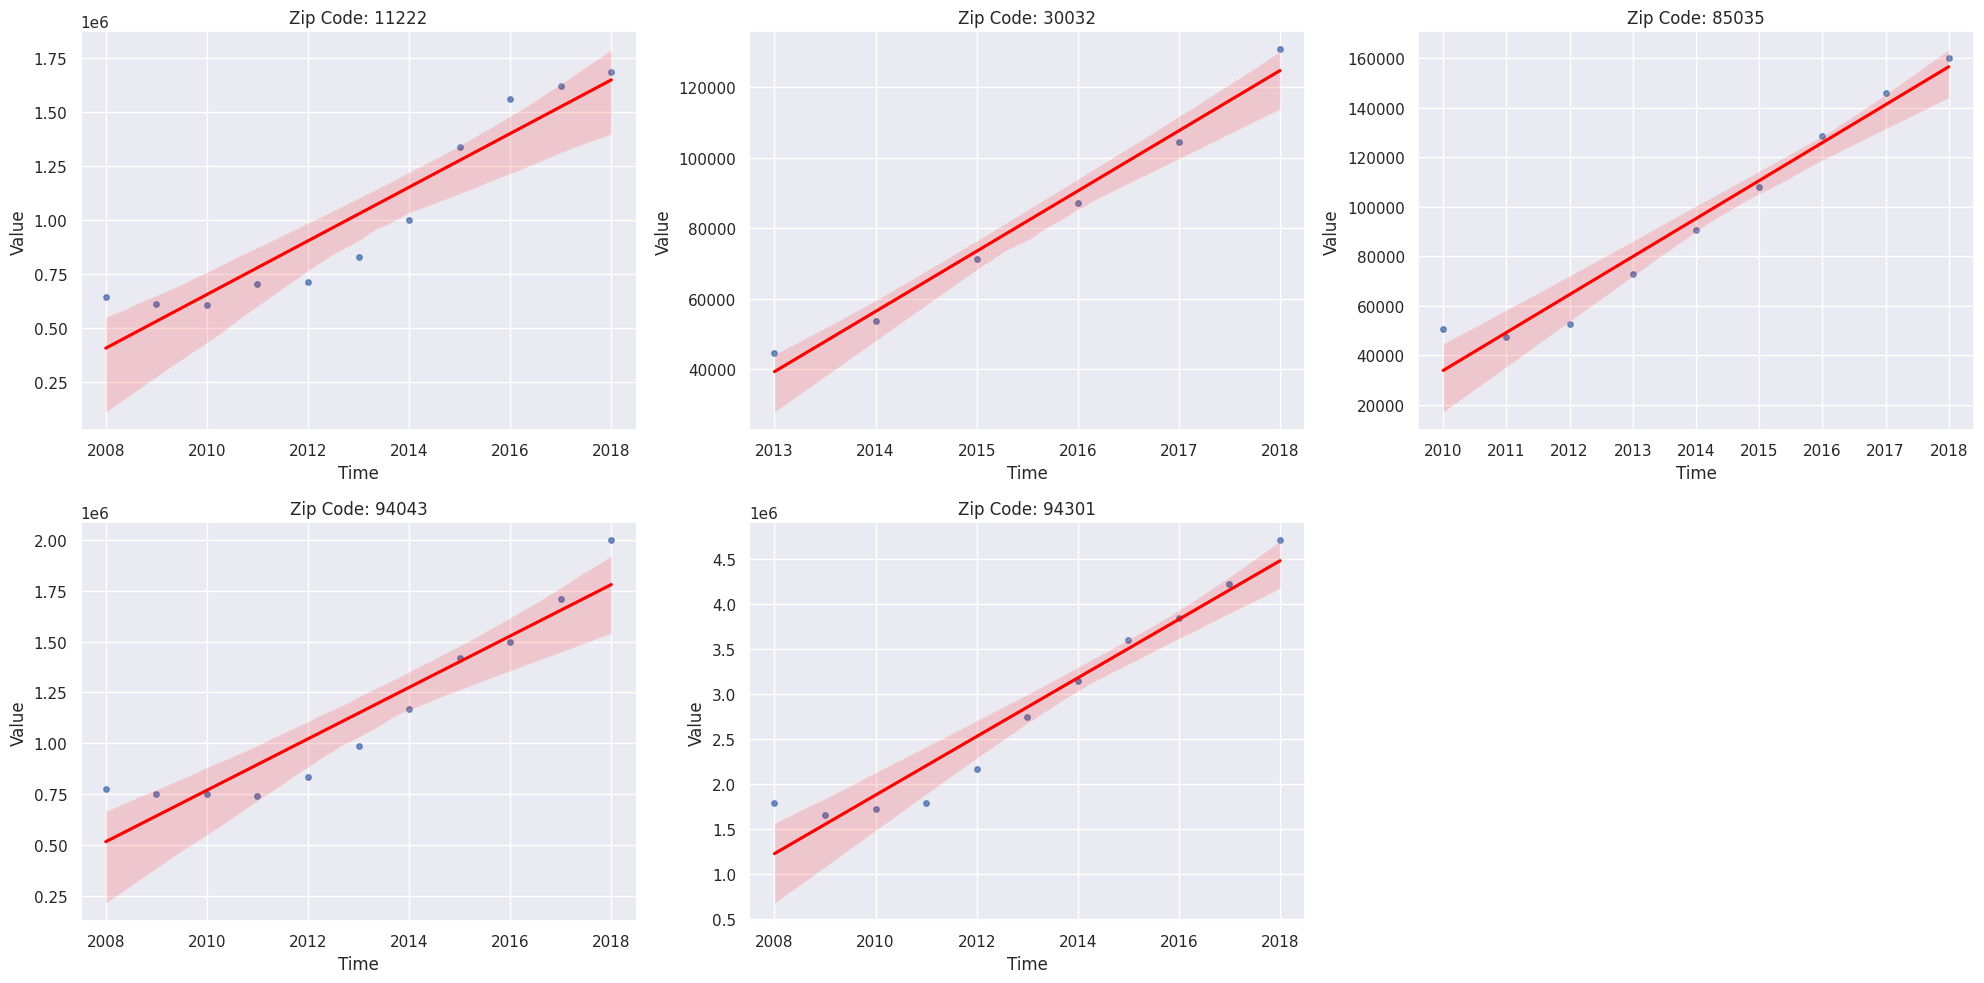

In [44]:
#Visualization for different ZipCodes with their trendline

# Get unique zip codes
zip_codes = df_yearly['ZipCode'].unique()

# Define the number of rows and columns for subplots
num_zip_codes = len(zip_codes)
num_cols = 3  # Number of columns for subplots
num_rows = (num_zip_codes + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axs = axs.flatten()  # Flatten the array of axes for easy iteration

# Plot each zip code in a separate subplot
for i, zip_code in enumerate(zip_codes):
    # Filter the DataFrame for each zip code
    df_zip = df_yearly[df_yearly['ZipCode'] == zip_code]

    # Convert DatetimeIndex to numeric timestamps (seconds since epoch)
    x = df_zip.index.astype(int) // 10**9  # Convert nanoseconds to seconds

    # Scatter plot with trend line using seaborn
    sns.regplot(x=df_zip ['year'], y=df_zip['value'], ax=axs[i], scatter_kws={'s': 15}, line_kws={'color': 'red'})

    axs[i].set_title(f'Zip Code: {zip_code}')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Value')

# Remove any empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


The home value is increasing over time, hence a positive trendlinein our data for the individual zipcodes.

#### 2. Quarterly Features

##### Quarterly visualization of our data to determine seasonality and trend

In [45]:
df_quarterly.head()

RegionID  ZipCode      City State CountyName  SizeRank  year  quarter  \
0     62033    11222  New York    NY      Kings      1156  2008        2   
1     62033    11222  New York    NY      Kings      1156  2008        3   
2     62033    11222  New York    NY      Kings      1156  2008        4   
3     62033    11222  New York    NY      Kings      1156  2009        1   
4     62033    11222  New York    NY      Kings      1156  2009        2   

           value        ROI  
0  660600.000000  158.81203  
1  641966.666667  158.81203  
2  634600.000000  158.81203  
3  630400.000000  158.81203  
4  618133.333333  158.81203

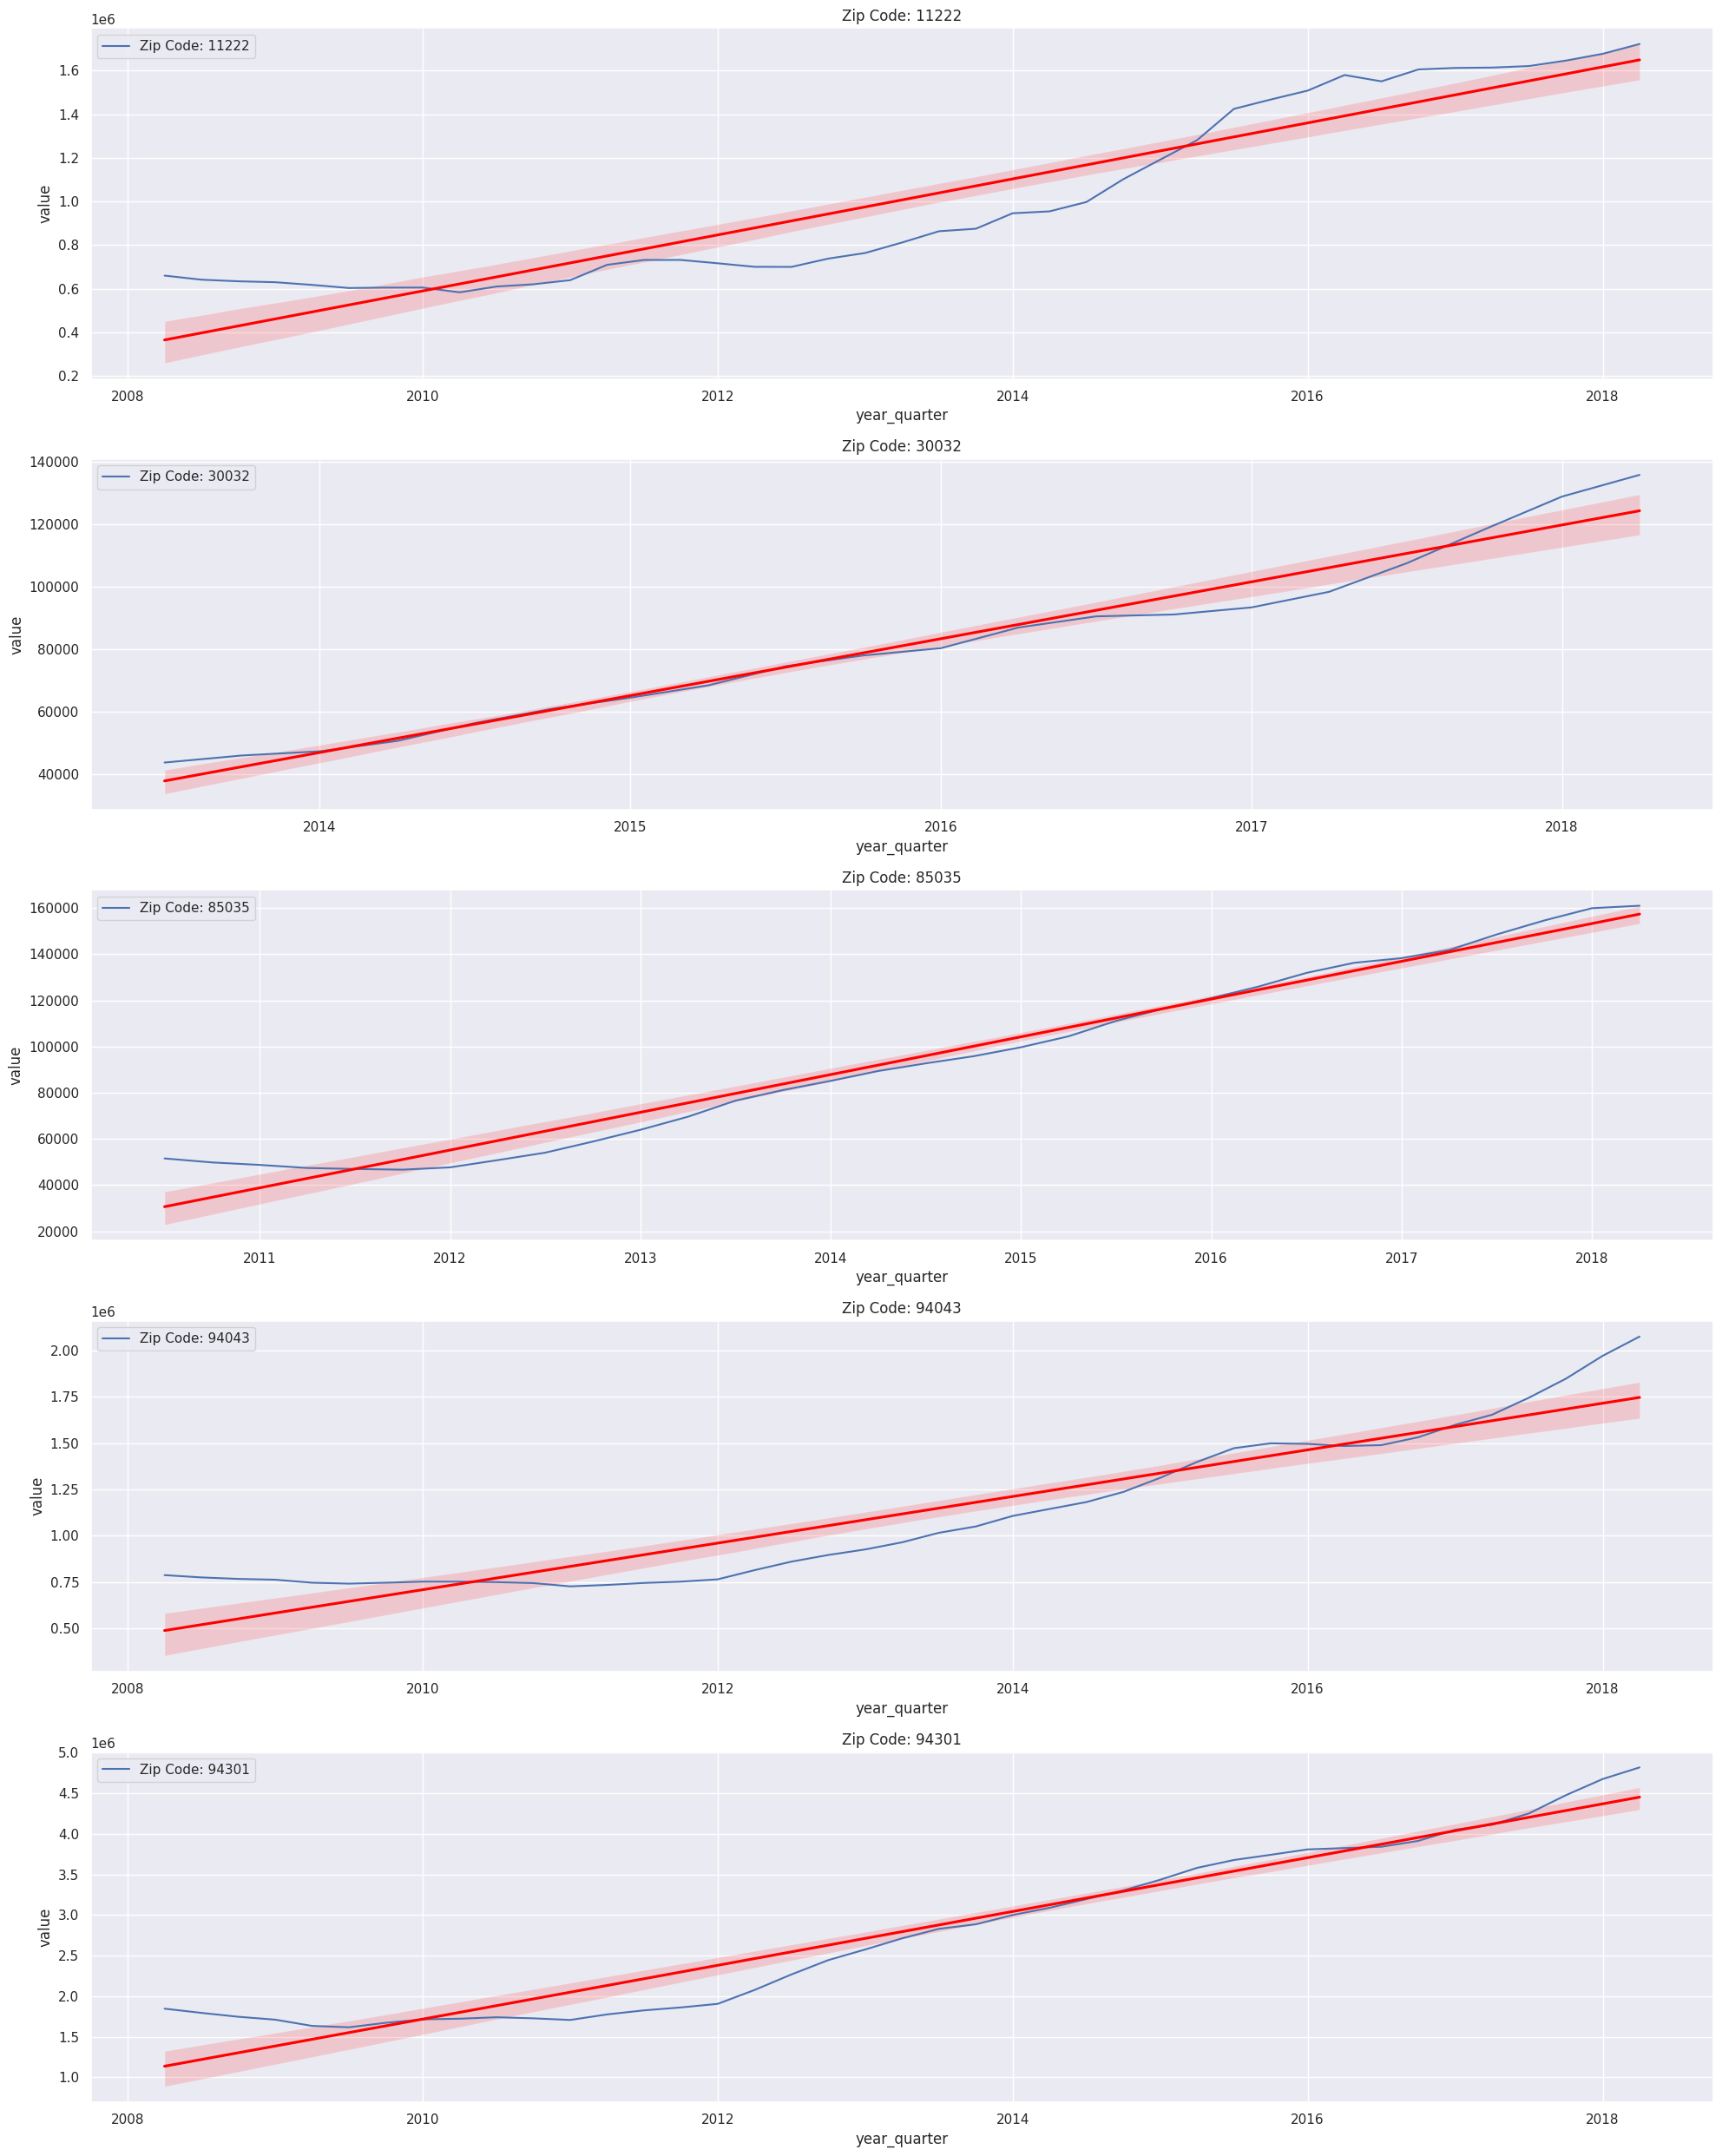

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure the quarter is numeric
df_quarterly['quarter'] = df_quarterly['quarter'].astype(int)

# Create a new column combining year and quarter as a numeric value
df_quarterly['year_quarter'] = df_quarterly['year'] + (df_quarterly['quarter'] - 1) / 4

# Get unique zip codes
zip_codes = df_quarterly['ZipCode'].unique()

# Define the number of rows and columns for subplots
num_zip_codes = len(zip_codes)
num_cols = 1 # Number of columns for subplots
num_rows = (num_zip_codes + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axs = axs.flatten()  # Flatten the array of axes for easy iteration

# Plot each zip code in a separate subplot
for i, zip_code in enumerate(zip_codes):
    # Filter the DataFrame for each zip code
    df_zip = df_quarterly[df_quarterly['ZipCode'] == zip_code]

    # Plotting the 'value' column
    axs[i].plot(df_zip['year_quarter'], df_zip['value'], label=f'Zip Code: {zip_code}')
    axs[i].set_title(f'Zip Code: {zip_code}')
    axs[i].set_xlabel('Year and Quarter')
    axs[i].set_ylabel('Value')
    axs[i].legend()

    # Adding a trend line (linear regression) using seaborn
    sns.regplot(data=df_zip, x='year_quarter', y='value', ax=axs[i], scatter=False, line_kws={'color':'red'})

# Remove any empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


#### 3. Monthly Features

##### Monthly data Visualization for each zipcode

<Axes: xlabel='time'>

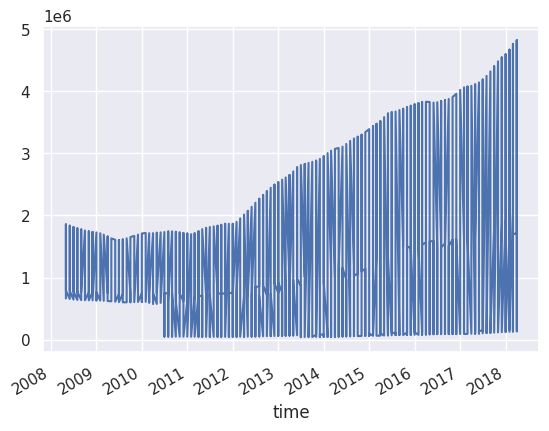

In [47]:
df_monthly['value'].plot()

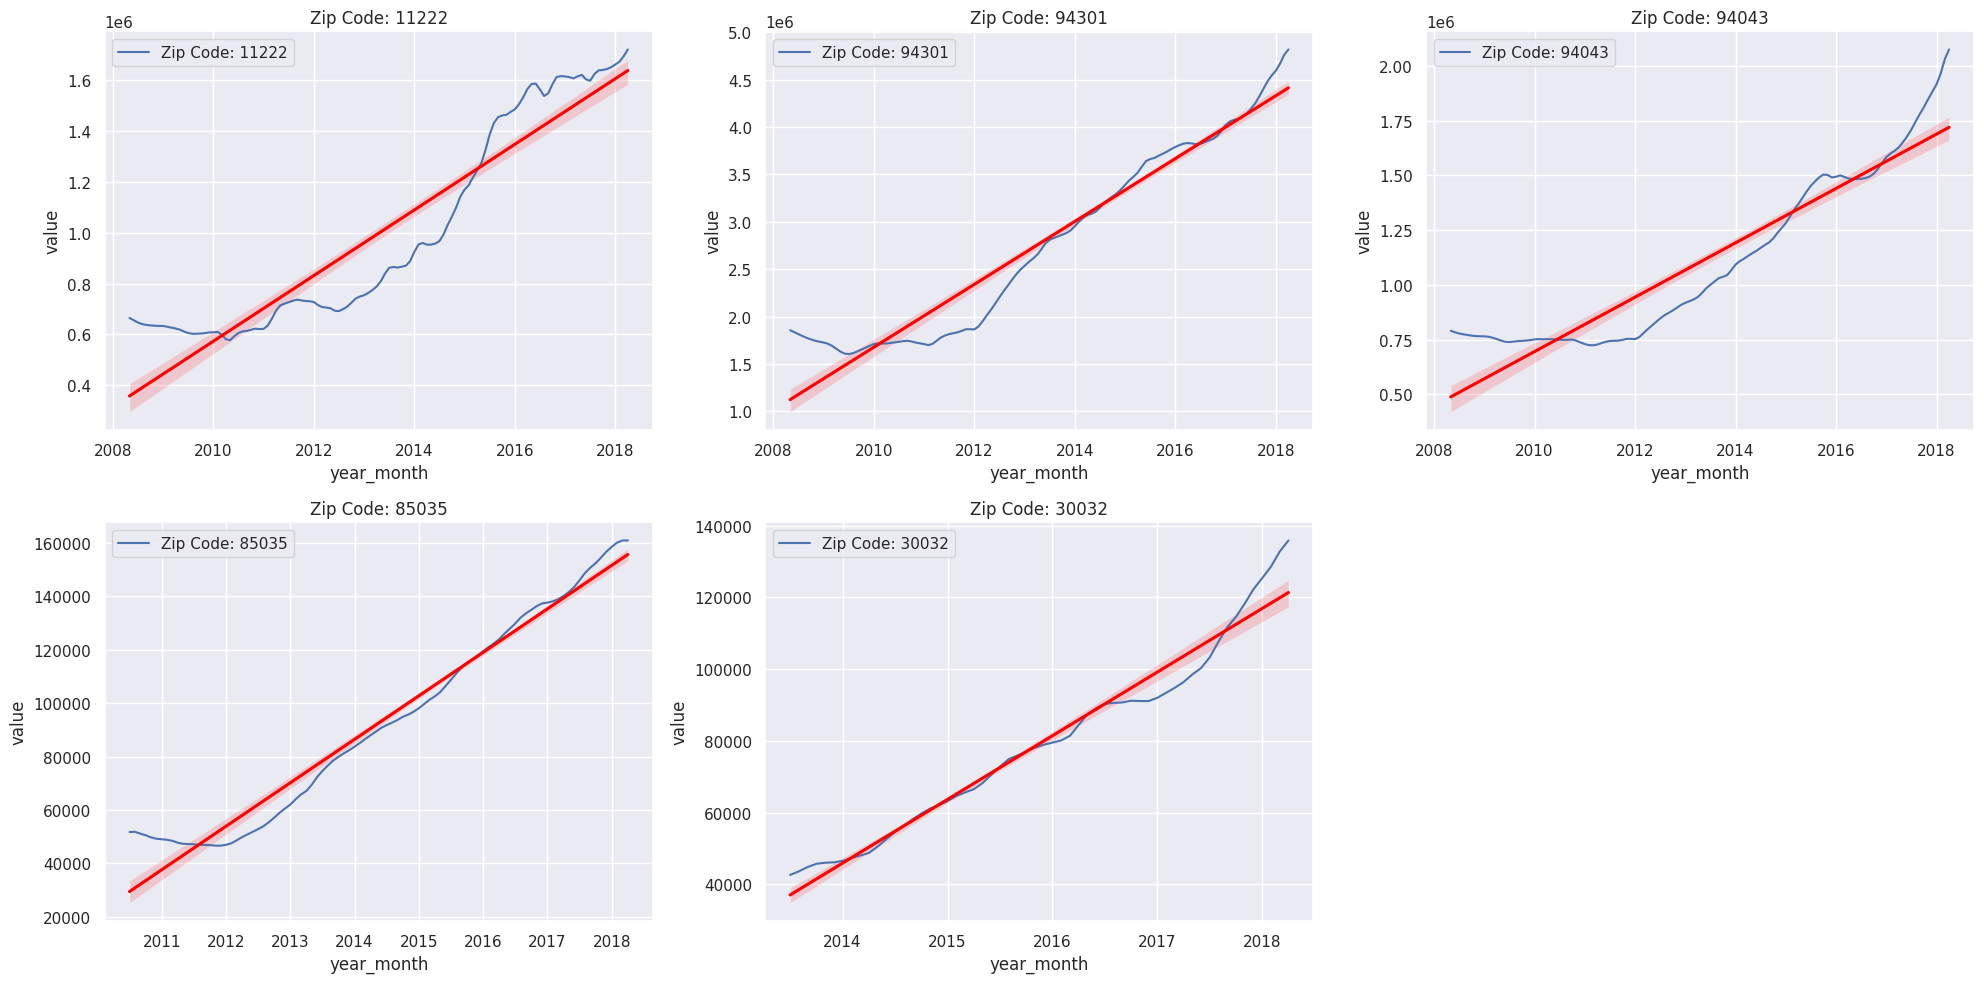

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert index to PeriodIndex to handle periods (months) as numeric values
df_monthly.index = df_monthly.index.to_period('M')

# Create a new column combining year and month as a numeric value
df_monthly['year_month'] = df_monthly.index.year + (df_monthly.index.month - 1) / 12

# Get unique zip codes
zip_codes = df_monthly['ZipCode'].unique()

# Define the number of rows and columns for subplots
num_zip_codes = len(zip_codes)
num_cols = 3  # Number of columns for subplots
num_rows = (num_zip_codes + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axs = axs.flatten()  # Flatten the array of axes for easy iteration

# Plot each zip code in a separate subplot
for i, zip_code in enumerate(zip_codes):
    # Filter the DataFrame for each zip code
    df_zip = df_monthly[df_monthly['ZipCode'] == zip_code]

    # Plotting the 'value' column against 'year_month'
    axs[i].plot(df_zip['year_month'], df_zip['value'], label=f'Zip Code: {zip_code}')
    axs[i].set_title(f'Zip Code: {zip_code}')
    axs[i].set_xlabel('Year and Month')
    axs[i].set_ylabel('Value')
    axs[i].legend()

    # Adding a trend line (linear regression) using seaborn
    sns.regplot(data=df_zip, x='year_month', y='value', ax=axs[i], scatter=False, line_kws={'color':'red'})

# Remove any empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


#### 4. Date Time Features

In [49]:
df4.head()

RegionID  ZipCode           City State   CountyName  SizeRank  \
time                                                                     
2008-05     62033    11222       New York    NY        Kings      1156   
2008-05     97691    94301      Palo Alto    CA  Santa Clara      5739   
2008-05     97530    94043  Mountain View    CA  Santa Clara      2581   
2008-06     62033    11222       New York    NY        Kings      1156   
2008-06     97691    94301      Palo Alto    CA  Santa Clara      5739   

             value        ROI  year  quarter   year_month  
time                                                       
2008-05   665000.0  158.81203  2008        2  2008.333333  
2008-05  1856400.0  159.55613  2008        2  2008.333333  
2008-05   790000.0  162.64557  2008        2  2008.333333  
2008-06   656200.0  158.81203  2008        2  2008.416667  
2008-06  1835900.0  159.55613  2008        2  2008.416667

In [50]:
features = df4.copy()
df4.index.name = 'time'

#### 5.Lag Features

In [51]:
# Create lag features (e.g., previous month value)
features['lag1'] = df4['value'].shift(1)
features['lag2'] = df4['value'].shift(30)
features.head(12)

RegionID  ZipCode           City State   CountyName  SizeRank  \
time                                                                     
2008-05     62033    11222       New York    NY        Kings      1156   
2008-05     97691    94301      Palo Alto    CA  Santa Clara      5739   
2008-05     97530    94043  Mountain View    CA  Santa Clara      2581   
2008-06     62033    11222       New York    NY        Kings      1156   
2008-06     97691    94301      Palo Alto    CA  Santa Clara      5739   
2008-06     97530    94043  Mountain View    CA  Santa Clara      2581   
2008-07     62033    11222       New York    NY        Kings      1156   
2008-07     97691    94301      Palo Alto    CA  Santa Clara      5739   
2008-07     97530    94043  Mountain View    CA  Santa Clara      2581   
2008-08     62033    11222       New York    NY        Kings      1156   
2008-08     97691    94301      Palo Alto    CA  Santa Clara      5739   
2008-08     97530    94043  Mountain View    CA  Santa Clara      2581   

             value        ROI  year  quarter   year_month       lag1  lag2  
time                                                                        
2008-05   665000.0  158.81203  2008        2  2008.333333        NaN   NaN  
2008-05  1856400.0  159.55613  2008        2  2008.333333   665000.0   NaN  
2008-05   790000.0  162.64557  2008        2  2008.333333  1856400.0   NaN  
2008-06   656200.0  158.81203  2008        2  2008.416667   790000.0   NaN  
2008-06  1835900.0  159.55613  2008        2  2008.416667   656200.0   NaN  
2008-06   783200.0  162.64557  2008        2  2008.416667  1835900.0   NaN  
2008-07   647100.0  158.81203  2008        3  2008.500000   783200.0   NaN  
2008-07  1814400.0  159.55613  2008        3  2008.500000   647100.0   NaN  
2008-07   777800.0  162.64557  2008        3  2008.500000  1814400.0   NaN  
2008-08   640900.0  158.81203  2008        3  2008.583333   777800.0   NaN  
2008-08  1793400.0  159.55613  2008        3  2008.583333   640900.0   NaN  
2008-08   773900.0  162.64557  2008        3  2008.583333  1793400.0   NaN

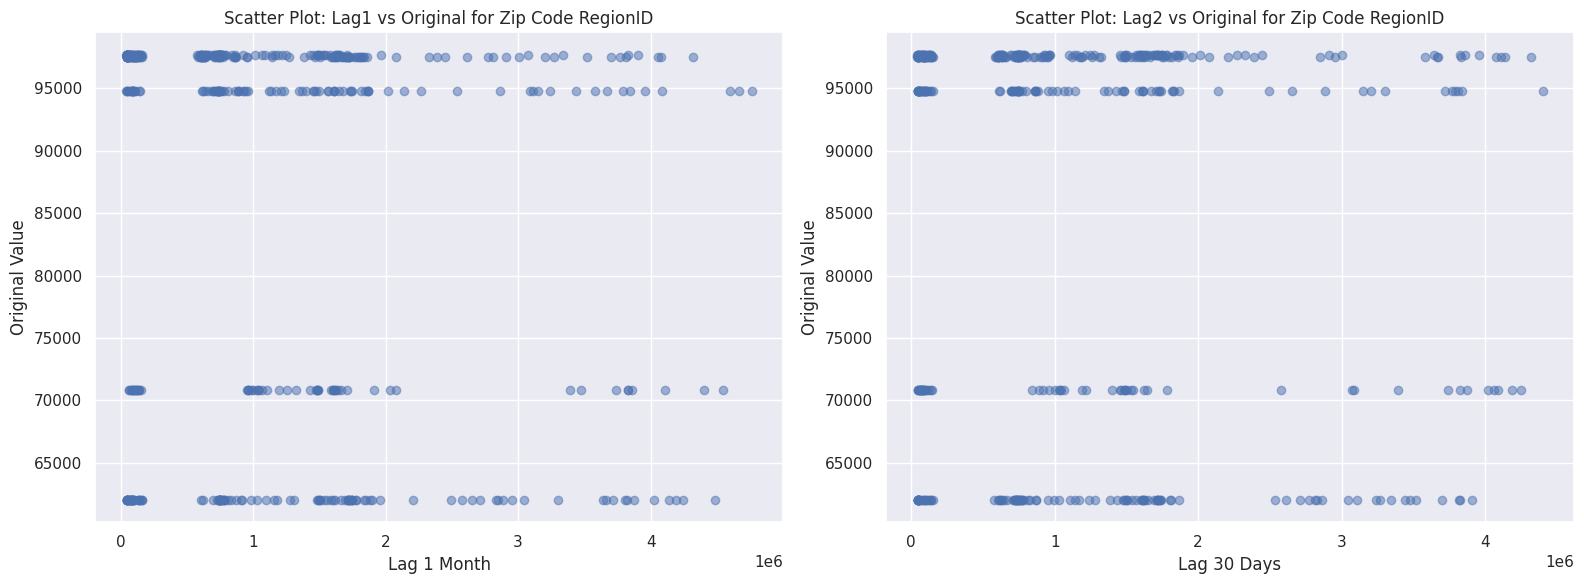

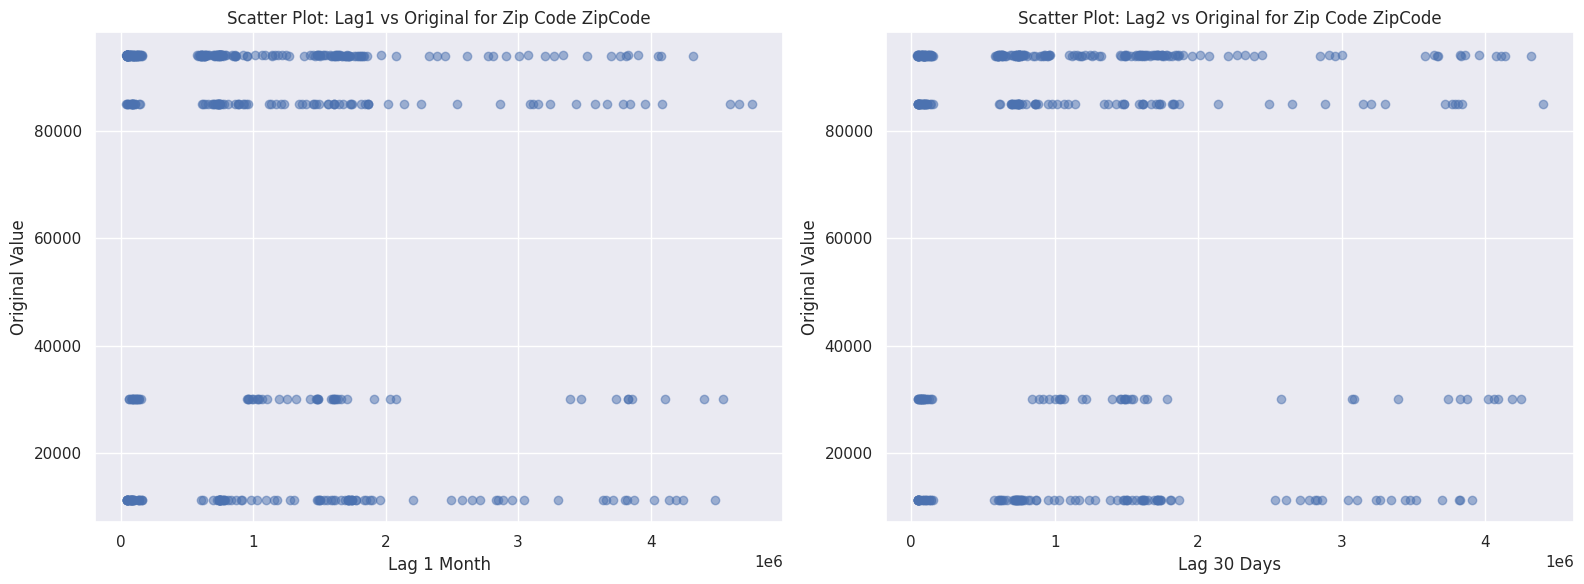

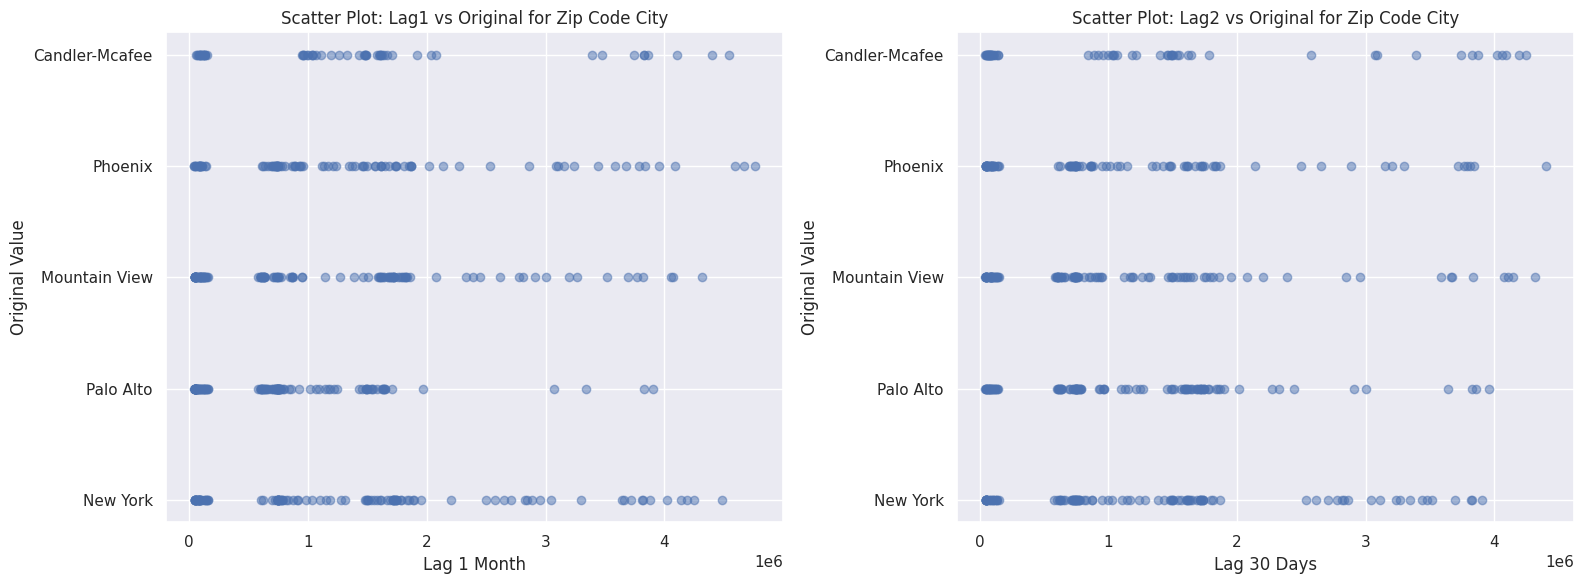

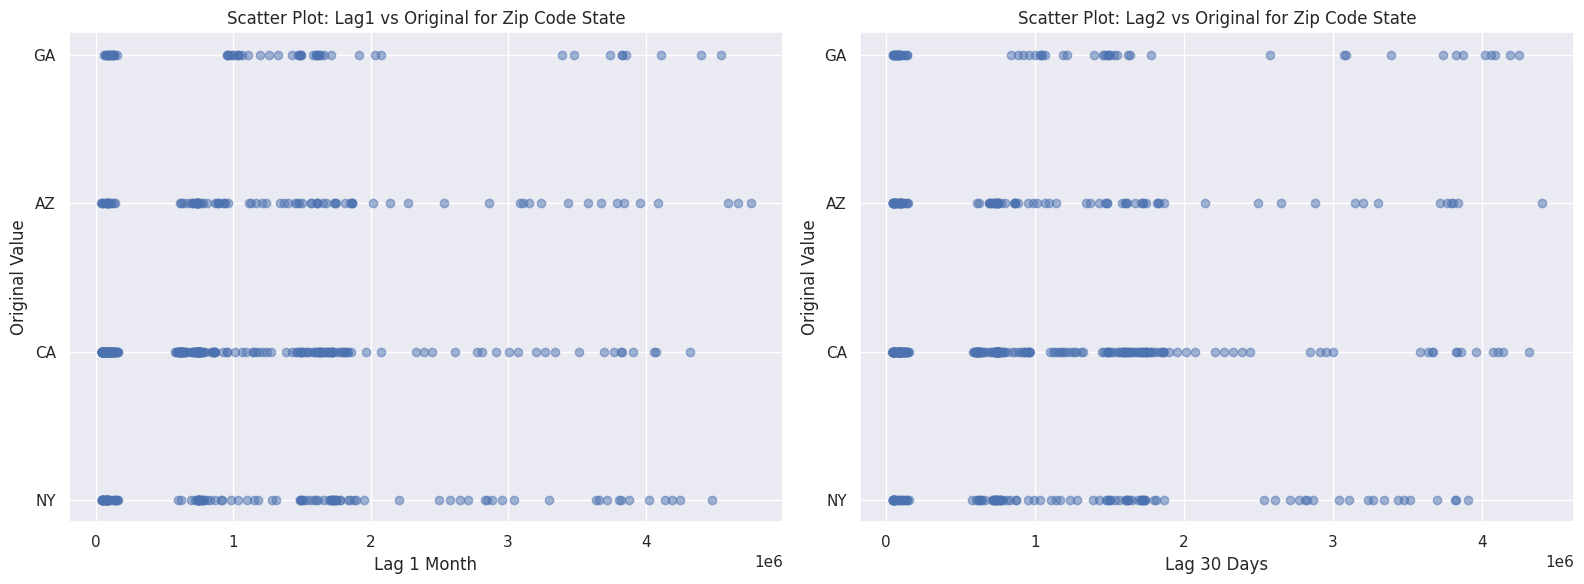

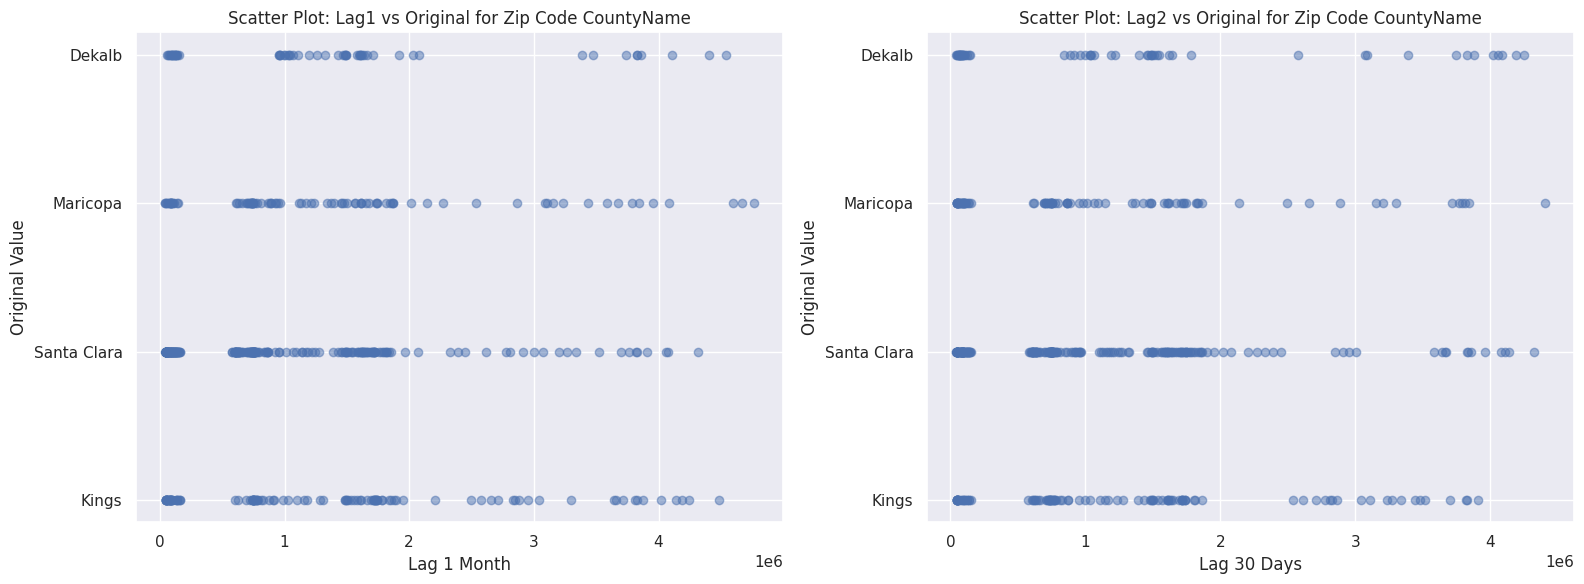

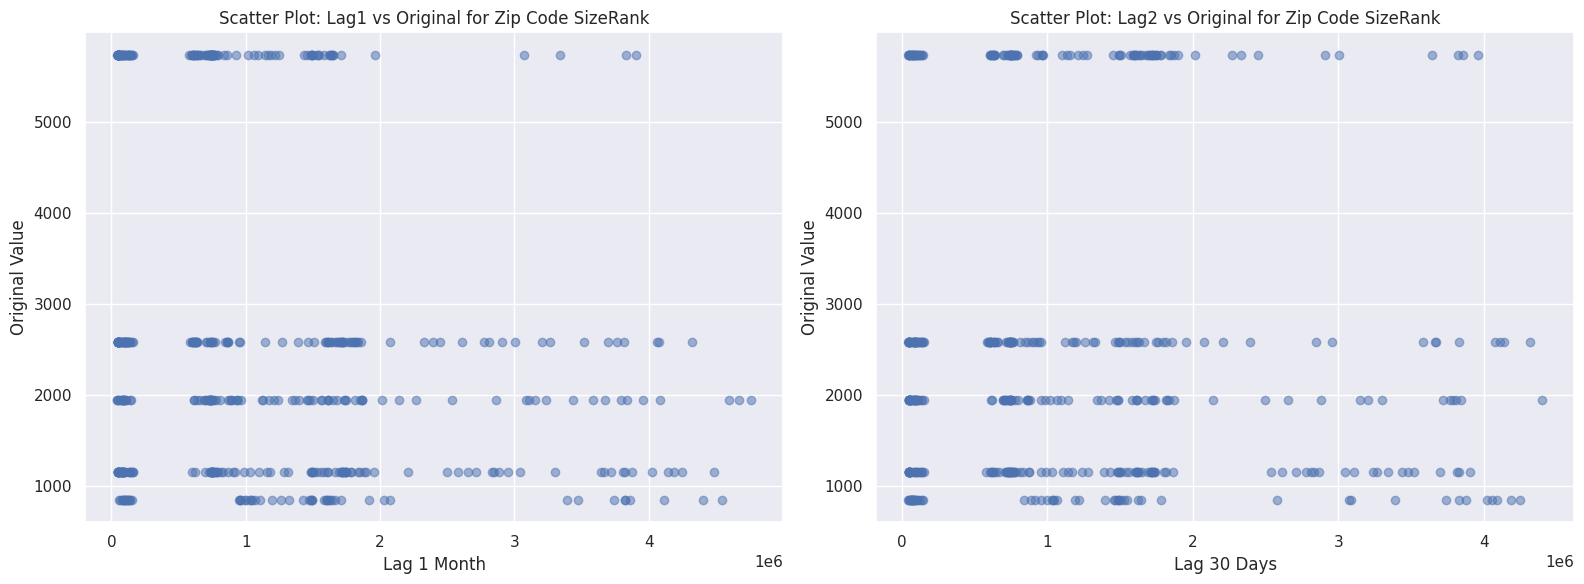

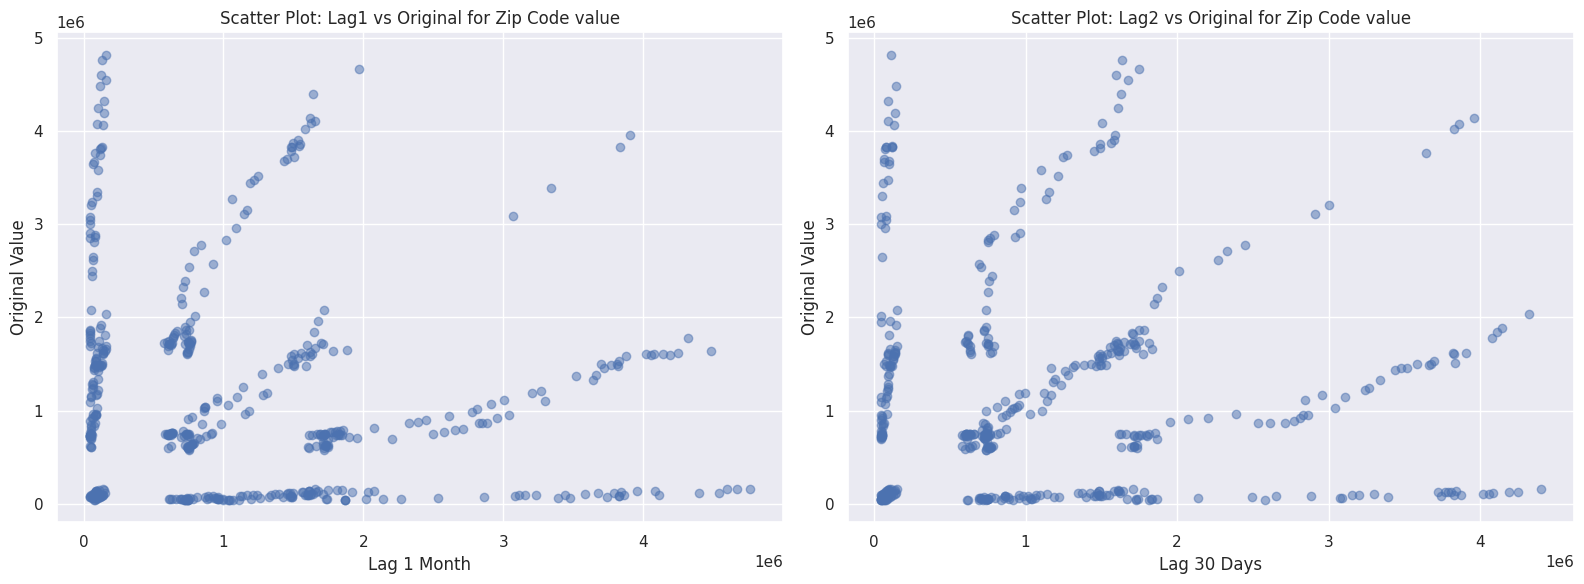

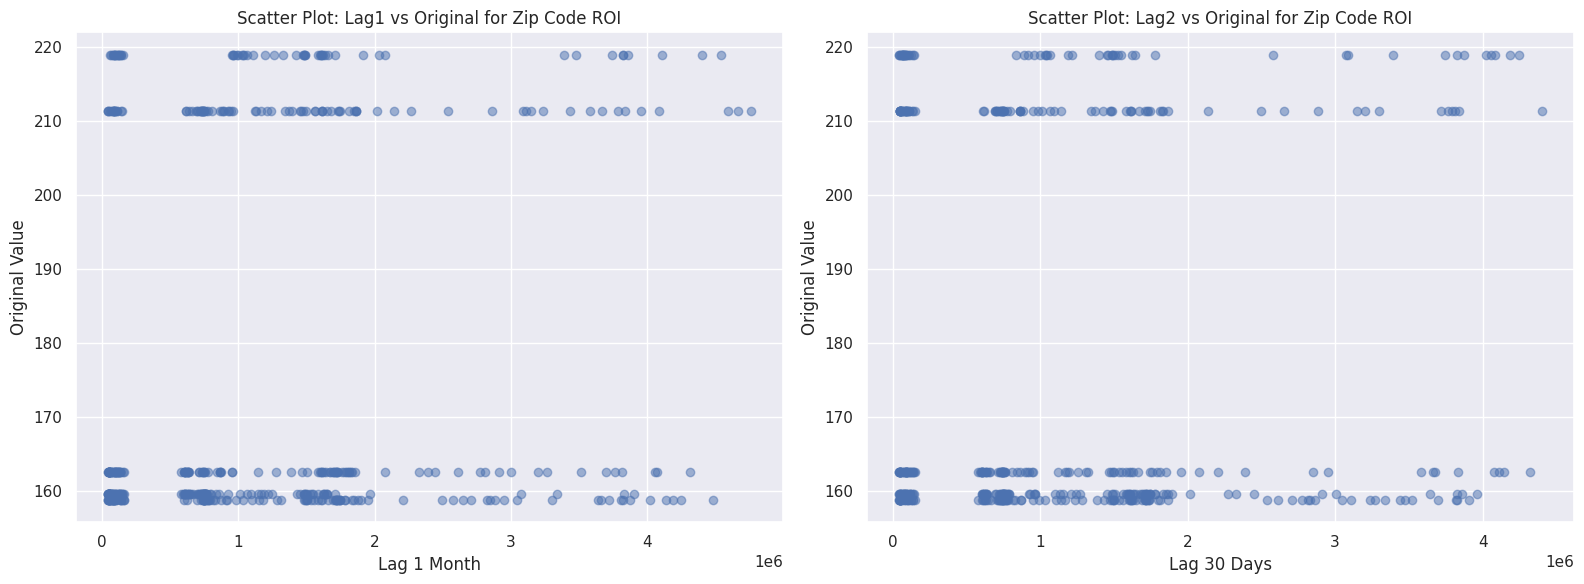

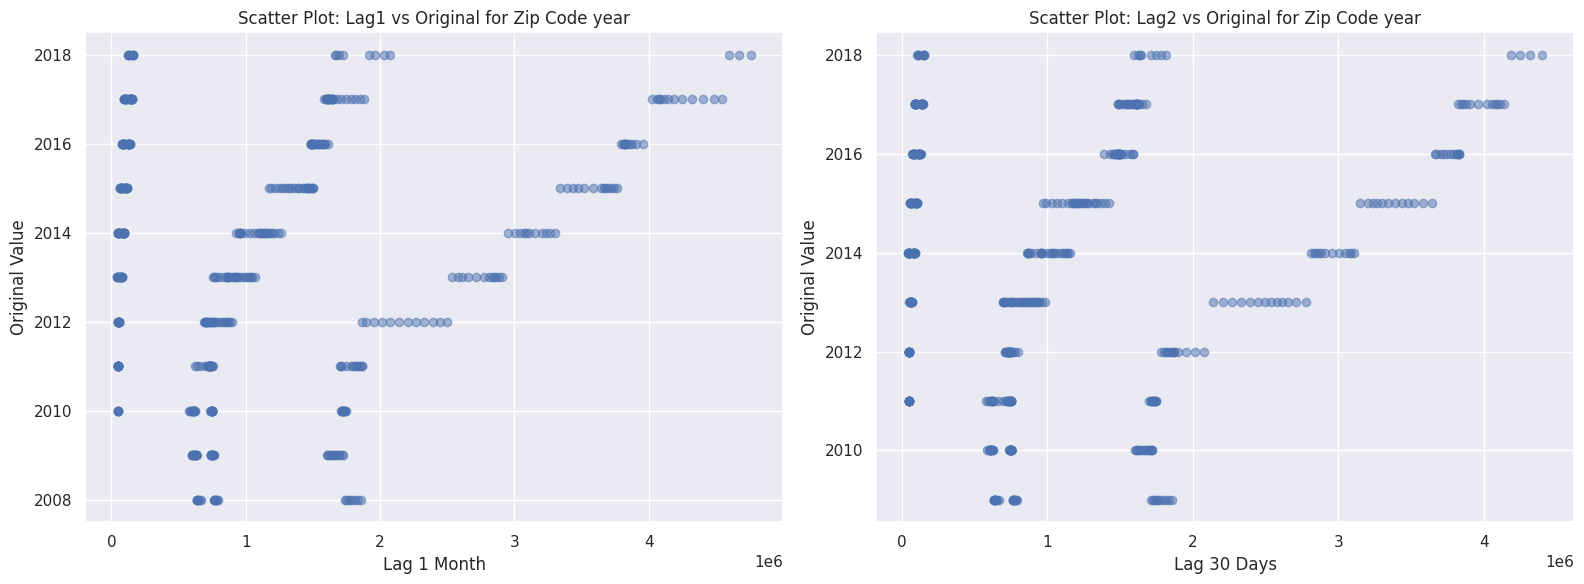

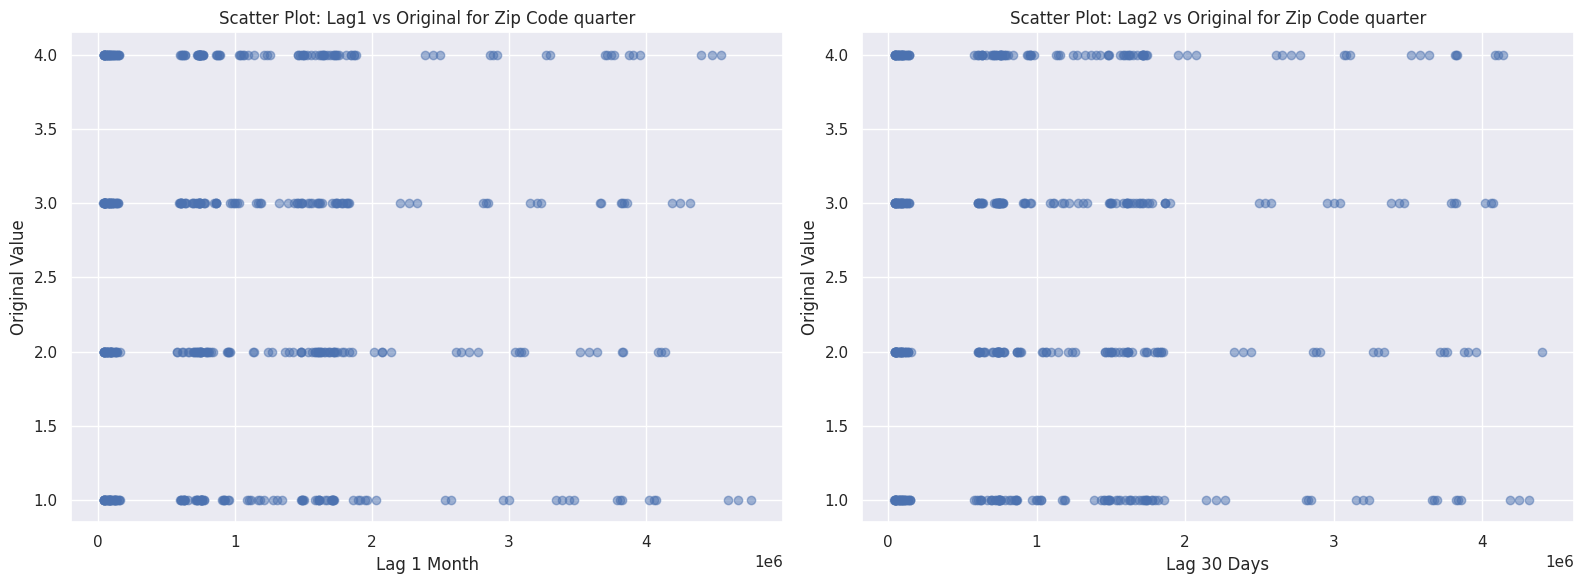

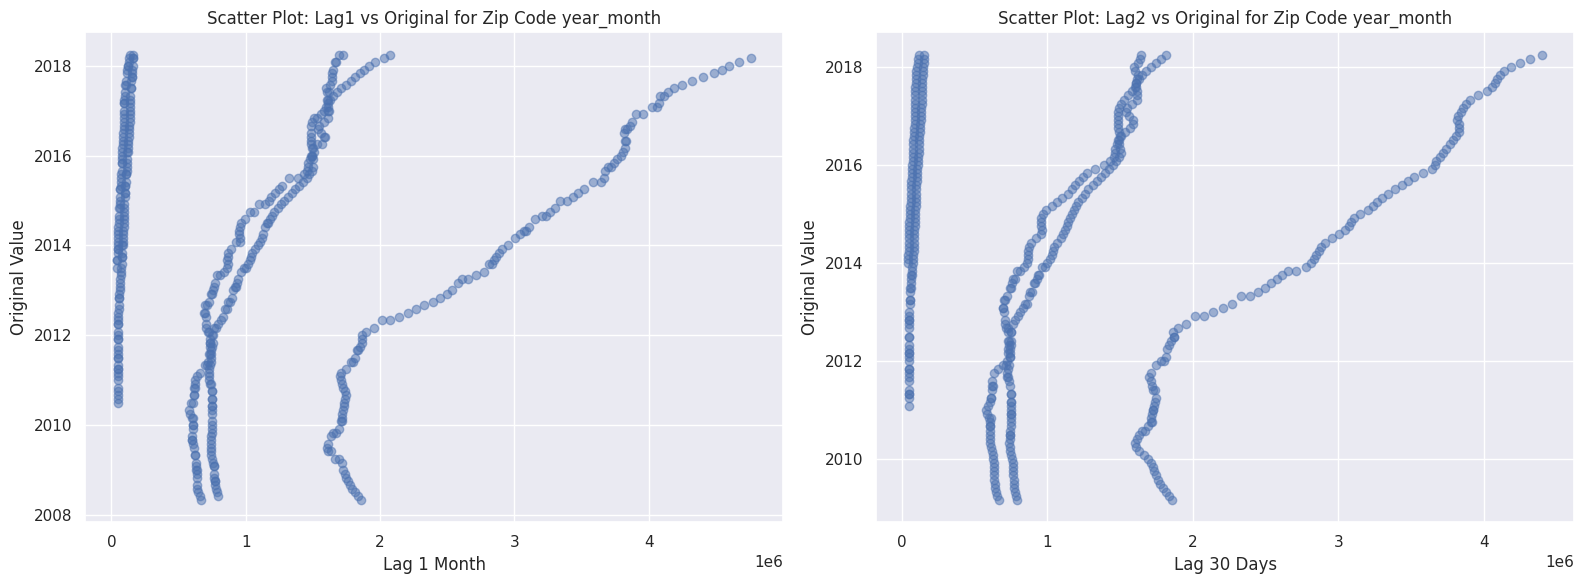

In [52]:
import matplotlib.pyplot as plt

# Loop through each zip code and create scatter plots
for zip_code in df4.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Scatter plot for lag1 vs original
    ax1.scatter(features['lag1'], df4[zip_code].values, alpha=0.5)
    ax1.set_title(f'Scatter Plot: Lag1 vs Original for Zip Code {zip_code}')
    ax1.set_xlabel('Lag 1 Month')
    ax1.set_ylabel('Original Value')

    # Scatter plot for lag2 vs original
    ax2.scatter(features['lag2'], df4[zip_code].values, alpha=0.5)
    ax2.set_title(f'Scatter Plot: Lag2 vs Original for Zip Code {zip_code}')
    ax2.set_xlabel('Lag 30 Days')
    ax2.set_ylabel('Original Value')

    plt.tight_layout()
    plt.show()


#### 6. Window Features
Through the moving average we will be able to smoothen out series and also use the mean in foecasting

In [53]:
# To identify the monthy home value mean
features['Roll_mean'] = df_yearly['value'].rolling(window = 1).mean()
features.head(15)

RegionID  ZipCode           City State   CountyName  SizeRank  \
time                                                                     
2008-05     62033    11222       New York    NY        Kings      1156   
2008-05     97691    94301      Palo Alto    CA  Santa Clara      5739   
2008-05     97530    94043  Mountain View    CA  Santa Clara      2581   
2008-06     62033    11222       New York    NY        Kings      1156   
2008-06     97691    94301      Palo Alto    CA  Santa Clara      5739   
2008-06     97530    94043  Mountain View    CA  Santa Clara      2581   
2008-07     62033    11222       New York    NY        Kings      1156   
2008-07     97691    94301      Palo Alto    CA  Santa Clara      5739   
2008-07     97530    94043  Mountain View    CA  Santa Clara      2581   
2008-08     62033    11222       New York    NY        Kings      1156   
2008-08     97691    94301      Palo Alto    CA  Santa Clara      5739   
2008-08     97530    94043  Mountain View    CA  Santa Clara      2581   
2008-09     62033    11222       New York    NY        Kings      1156   
2008-09     97691    94301      Palo Alto    CA  Santa Clara      5739   
2008-09     97530    94043  Mountain View    CA  Santa Clara      2581   

             value        ROI  year  quarter   year_month       lag1  lag2  \
time                                                                         
2008-05   665000.0  158.81203  2008        2  2008.333333        NaN   NaN   
2008-05  1856400.0  159.55613  2008        2  2008.333333   665000.0   NaN   
2008-05   790000.0  162.64557  2008        2  2008.333333  1856400.0   NaN   
2008-06   656200.0  158.81203  2008        2  2008.416667   790000.0   NaN   
2008-06  1835900.0  159.55613  2008        2  2008.416667   656200.0   NaN   
2008-06   783200.0  162.64557  2008        2  2008.416667  1835900.0   NaN   
2008-07   647100.0  158.81203  2008        3  2008.500000   783200.0   NaN   
2008-07  1814400.0  159.55613  2008        3  2008.500000   647100.0   NaN   
2008-07   777800.0  162.64557  2008        3  2008.500000  1814400.0   NaN   
2008-08   640900.0  158.81203  2008        3  2008.583333   777800.0   NaN   
2008-08  1793400.0  159.55613  2008        3  2008.583333   640900.0   NaN   
2008-08   773900.0  162.64557  2008        3  2008.583333  1793400.0   NaN   
2008-09   637900.0  158.81203  2008        3  2008.666667   773900.0   NaN   
2008-09  1775300.0  159.55613  2008        3  2008.666667   637900.0   NaN   
2008-09   770800.0  162.64557  2008        3  2008.666667  1775300.0   NaN   

         Roll_mean  
time                
2008-05        NaN  
2008-05        NaN  
2008-05        NaN  
2008-06        NaN  
2008-06        NaN  
2008-06        NaN  
2008-07        NaN  
2008-07        NaN  
2008-07        NaN  
2008-08        NaN  
2008-08        NaN  
2008-08        NaN  
2008-09        NaN  
2008-09        NaN  
2008-09        NaN

In [54]:
# Calculate rolling mean per ZipCode
df_yearly['Roll_mean'] = df_yearly.groupby('ZipCode')['value'].rolling(window=1, min_periods=1).mean().reset_index(level=0, drop=True)

# Display the first 15 rows
features = df_yearly.head(15)
features

RegionID  ZipCode            City State CountyName  SizeRank  year  \
0      62033    11222        New York    NY      Kings      1156  2008   
1      62033    11222        New York    NY      Kings      1156  2009   
2      62033    11222        New York    NY      Kings      1156  2010   
3      62033    11222        New York    NY      Kings      1156  2011   
4      62033    11222        New York    NY      Kings      1156  2012   
5      62033    11222        New York    NY      Kings      1156  2013   
6      62033    11222        New York    NY      Kings      1156  2014   
7      62033    11222        New York    NY      Kings      1156  2015   
8      62033    11222        New York    NY      Kings      1156  2016   
9      62033    11222        New York    NY      Kings      1156  2017   
10     62033    11222        New York    NY      Kings      1156  2018   
11     70817    30032  Candler-Mcafee    GA     Dekalb       843  2013   
12     70817    30032  Candler-Mcafee    GA     Dekalb       843  2014   
13     70817    30032  Candler-Mcafee    GA     Dekalb       843  2015   
14     70817    30032  Candler-Mcafee    GA     Dekalb       843  2016   

           value         ROI     Roll_mean  
0   6.438625e+05  158.812030  6.438625e+05  
1   6.145083e+05  158.812030  6.145083e+05  
2   6.053500e+05  158.812030  6.053500e+05  
3   7.035750e+05  158.812030  7.035750e+05  
4   7.142250e+05  158.812030  7.142250e+05  
5   8.288417e+05  158.812030  8.288417e+05  
6   1.000142e+06  158.812030  1.000142e+06  
7   1.340867e+06  158.812030  1.340867e+06  
8   1.560358e+06  158.812030  1.560358e+06  
9   1.622567e+06  158.812030  1.622567e+06  
10  1.687425e+06  158.812030  1.687425e+06  
11  4.480000e+04  219.014085  4.480000e+04  
12  5.378333e+04  219.014085  5.378333e+04  
13  7.135000e+04  219.014085  7.135000e+04  
14  8.724167e+04  219.014085  8.724167e+04

In [55]:
# To identify the maximum sales value for a rolling window of three
features.loc[:,'Roll_max']= features['value'].rolling(window =3).max()
features.head(10)

RegionID  ZipCode      City State CountyName  SizeRank  year         value  \
0     62033    11222  New York    NY      Kings      1156  2008  6.438625e+05   
1     62033    11222  New York    NY      Kings      1156  2009  6.145083e+05   
2     62033    11222  New York    NY      Kings      1156  2010  6.053500e+05   
3     62033    11222  New York    NY      Kings      1156  2011  7.035750e+05   
4     62033    11222  New York    NY      Kings      1156  2012  7.142250e+05   
5     62033    11222  New York    NY      Kings      1156  2013  8.288417e+05   
6     62033    11222  New York    NY      Kings      1156  2014  1.000142e+06   
7     62033    11222  New York    NY      Kings      1156  2015  1.340867e+06   
8     62033    11222  New York    NY      Kings      1156  2016  1.560358e+06   
9     62033    11222  New York    NY      Kings      1156  2017  1.622567e+06   

         ROI     Roll_mean      Roll_max  
0  158.81203  6.438625e+05           NaN  
1  158.81203  6.145083e+05           NaN  
2  158.81203  6.053500e+05  6.438625e+05  
3  158.81203  7.035750e+05  7.035750e+05  
4  158.81203  7.142250e+05  7.142250e+05  
5  158.81203  8.288417e+05  8.288417e+05  
6  158.81203  1.000142e+06  1.000142e+06  
7  158.81203  1.340867e+06  1.340867e+06  
8  158.81203  1.560358e+06  1.560358e+06  
9  158.81203  1.622567e+06  1.622567e+06

#### 7. Expanding Features

We will be considering the mean, max am]nd min fromm the start of the data

In [56]:
# Calculate expanding statistics per ZipCode
features.loc[:,'Expand_mean']= features['value'].expanding().mean()
features.loc[:,'Expand_max']= features['value'].expanding().max()
features.loc[:,'Expand_min']= features['value'].expanding().min()
features.head(10)

RegionID  ZipCode      City State CountyName  SizeRank  year         value  \
0     62033    11222  New York    NY      Kings      1156  2008  6.438625e+05   
1     62033    11222  New York    NY      Kings      1156  2009  6.145083e+05   
2     62033    11222  New York    NY      Kings      1156  2010  6.053500e+05   
3     62033    11222  New York    NY      Kings      1156  2011  7.035750e+05   
4     62033    11222  New York    NY      Kings      1156  2012  7.142250e+05   
5     62033    11222  New York    NY      Kings      1156  2013  8.288417e+05   
6     62033    11222  New York    NY      Kings      1156  2014  1.000142e+06   
7     62033    11222  New York    NY      Kings      1156  2015  1.340867e+06   
8     62033    11222  New York    NY      Kings      1156  2016  1.560358e+06   
9     62033    11222  New York    NY      Kings      1156  2017  1.622567e+06   

         ROI     Roll_mean      Roll_max    Expand_mean    Expand_max  \
0  158.81203  6.438625e+05           NaN  643862.500000  6.438625e+05   
1  158.81203  6.145083e+05           NaN  629185.416667  6.438625e+05   
2  158.81203  6.053500e+05  6.438625e+05  621240.277778  6.438625e+05   
3  158.81203  7.035750e+05  7.035750e+05  641823.958333  7.035750e+05   
4  158.81203  7.142250e+05  7.142250e+05  656304.166667  7.142250e+05   
5  158.81203  8.288417e+05  8.288417e+05  685060.416667  8.288417e+05   
6  158.81203  1.000142e+06  1.000142e+06  730072.023810  1.000142e+06   
7  158.81203  1.340867e+06  1.340867e+06  806421.354167  1.340867e+06   
8  158.81203  1.560358e+06  1.560358e+06  890192.129630  1.560358e+06   
9  158.81203  1.622567e+06  1.622567e+06  963429.583333  1.622567e+06   

      Expand_min  
0  643862.500000  
1  614508.333333  
2  605350.000000  
3  605350.000000  
4  605350.000000  
5  605350.000000  
6  605350.000000  
7  605350.000000  
8  605350.000000  
9  605350.000000

In [57]:
#Month on month growth rate
features.loc[:, 'mom_growth_rate'] = features.groupby('ZipCode')['value'].pct_change(1)
features

RegionID  ZipCode            City State CountyName  SizeRank  year  \
0      62033    11222        New York    NY      Kings      1156  2008   
1      62033    11222        New York    NY      Kings      1156  2009   
2      62033    11222        New York    NY      Kings      1156  2010   
3      62033    11222        New York    NY      Kings      1156  2011   
4      62033    11222        New York    NY      Kings      1156  2012   
5      62033    11222        New York    NY      Kings      1156  2013   
6      62033    11222        New York    NY      Kings      1156  2014   
7      62033    11222        New York    NY      Kings      1156  2015   
8      62033    11222        New York    NY      Kings      1156  2016   
9      62033    11222        New York    NY      Kings      1156  2017   
10     62033    11222        New York    NY      Kings      1156  2018   
11     70817    30032  Candler-Mcafee    GA     Dekalb       843  2013   
12     70817    30032  Candler-Mcafee    GA     Dekalb       843  2014   
13     70817    30032  Candler-Mcafee    GA     Dekalb       843  2015   
14     70817    30032  Candler-Mcafee    GA     Dekalb       843  2016   

           value         ROI     Roll_mean      Roll_max   Expand_mean  \
0   6.438625e+05  158.812030  6.438625e+05           NaN  6.438625e+05   
1   6.145083e+05  158.812030  6.145083e+05           NaN  6.291854e+05   
2   6.053500e+05  158.812030  6.053500e+05  6.438625e+05  6.212403e+05   
3   7.035750e+05  158.812030  7.035750e+05  7.035750e+05  6.418240e+05   
4   7.142250e+05  158.812030  7.142250e+05  7.142250e+05  6.563042e+05   
5   8.288417e+05  158.812030  8.288417e+05  8.288417e+05  6.850604e+05   
6   1.000142e+06  158.812030  1.000142e+06  1.000142e+06  7.300720e+05   
7   1.340867e+06  158.812030  1.340867e+06  1.340867e+06  8.064214e+05   
8   1.560358e+06  158.812030  1.560358e+06  1.560358e+06  8.901921e+05   
9   1.622567e+06  158.812030  1.622567e+06  1.622567e+06  9.634296e+05   
10  1.687425e+06  158.812030  1.687425e+06  1.687425e+06  1.029247e+06   
11  4.480000e+04  219.014085  4.480000e+04  1.687425e+06  9.472101e+05   
12  5.378333e+04  219.014085  5.378333e+04  1.687425e+06  8.784849e+05   
13  7.135000e+04  219.014085  7.135000e+04  7.135000e+04  8.208324e+05   
14  8.724167e+04  219.014085  8.724167e+04  8.724167e+04  7.719264e+05   

      Expand_max     Expand_min  mom_growth_rate  
0   6.438625e+05  643862.500000              NaN  
1   6.438625e+05  614508.333333        -0.045591  
2   6.438625e+05  605350.000000        -0.014904  
3   7.035750e+05  605350.000000         0.162262  
4   7.142250e+05  605350.000000         0.015137  
5   8.288417e+05  605350.000000         0.160477  
6   1.000142e+06  605350.000000         0.206674  
7   1.340867e+06  605350.000000         0.340677  
8   1.560358e+06  605350.000000         0.163694  
9   1.622567e+06  605350.000000         0.039868  
10  1.687425e+06  605350.000000         0.039973  
11  1.687425e+06   44800.000000              NaN  
12  1.687425e+06   44800.000000         0.200521  
13  1.687425e+06   44800.000000         0.326619  
14  1.687425e+06   44800.000000         0.222728

In [58]:
# Calculate year-over-year growth rate
features.loc[:,'yoy_growth_rate'] = features.groupby('ZipCode')['value'].pct_change(12)
features

RegionID  ZipCode            City State CountyName  SizeRank  year  \
0      62033    11222        New York    NY      Kings      1156  2008   
1      62033    11222        New York    NY      Kings      1156  2009   
2      62033    11222        New York    NY      Kings      1156  2010   
3      62033    11222        New York    NY      Kings      1156  2011   
4      62033    11222        New York    NY      Kings      1156  2012   
5      62033    11222        New York    NY      Kings      1156  2013   
6      62033    11222        New York    NY      Kings      1156  2014   
7      62033    11222        New York    NY      Kings      1156  2015   
8      62033    11222        New York    NY      Kings      1156  2016   
9      62033    11222        New York    NY      Kings      1156  2017   
10     62033    11222        New York    NY      Kings      1156  2018   
11     70817    30032  Candler-Mcafee    GA     Dekalb       843  2013   
12     70817    30032  Candler-Mcafee    GA     Dekalb       843  2014   
13     70817    30032  Candler-Mcafee    GA     Dekalb       843  2015   
14     70817    30032  Candler-Mcafee    GA     Dekalb       843  2016   

           value         ROI     Roll_mean      Roll_max   Expand_mean  \
0   6.438625e+05  158.812030  6.438625e+05           NaN  6.438625e+05   
1   6.145083e+05  158.812030  6.145083e+05           NaN  6.291854e+05   
2   6.053500e+05  158.812030  6.053500e+05  6.438625e+05  6.212403e+05   
3   7.035750e+05  158.812030  7.035750e+05  7.035750e+05  6.418240e+05   
4   7.142250e+05  158.812030  7.142250e+05  7.142250e+05  6.563042e+05   
5   8.288417e+05  158.812030  8.288417e+05  8.288417e+05  6.850604e+05   
6   1.000142e+06  158.812030  1.000142e+06  1.000142e+06  7.300720e+05   
7   1.340867e+06  158.812030  1.340867e+06  1.340867e+06  8.064214e+05   
8   1.560358e+06  158.812030  1.560358e+06  1.560358e+06  8.901921e+05   
9   1.622567e+06  158.812030  1.622567e+06  1.622567e+06  9.634296e+05   
10  1.687425e+06  158.812030  1.687425e+06  1.687425e+06  1.029247e+06   
11  4.480000e+04  219.014085  4.480000e+04  1.687425e+06  9.472101e+05   
12  5.378333e+04  219.014085  5.378333e+04  1.687425e+06  8.784849e+05   
13  7.135000e+04  219.014085  7.135000e+04  7.135000e+04  8.208324e+05   
14  8.724167e+04  219.014085  8.724167e+04  8.724167e+04  7.719264e+05   

      Expand_max     Expand_min  mom_growth_rate  yoy_growth_rate  
0   6.438625e+05  643862.500000              NaN              NaN  
1   6.438625e+05  614508.333333        -0.045591              NaN  
2   6.438625e+05  605350.000000        -0.014904              NaN  
3   7.035750e+05  605350.000000         0.162262              NaN  
4   7.142250e+05  605350.000000         0.015137              NaN  
5   8.288417e+05  605350.000000         0.160477              NaN  
6   1.000142e+06  605350.000000         0.206674              NaN  
7   1.340867e+06  605350.000000         0.340677              NaN  
8   1.560358e+06  605350.000000         0.163694              NaN  
9   1.622567e+06  605350.000000         0.039868              NaN  
10  1.687425e+06  605350.000000         0.039973              NaN  
11  1.687425e+06   44800.000000              NaN              NaN  
12  1.687425e+06   44800.000000         0.200521              NaN  
13  1.687425e+06   44800.000000         0.326619              NaN  
14  1.687425e+06   44800.000000         0.222728              NaN

In [59]:
# Calculate rolling standard deviation
rolling_std = features.groupby('ZipCode')['value'].rolling(window=12).std()

# Assign the values from rolling_std directly to df4['rolling_std_12']
features.loc[:,'rolling_std_12'] = rolling_std.values

# Display the updated DataFrame
features

RegionID  ZipCode            City State CountyName  SizeRank  year  \
0      62033    11222        New York    NY      Kings      1156  2008   
1      62033    11222        New York    NY      Kings      1156  2009   
2      62033    11222        New York    NY      Kings      1156  2010   
3      62033    11222        New York    NY      Kings      1156  2011   
4      62033    11222        New York    NY      Kings      1156  2012   
5      62033    11222        New York    NY      Kings      1156  2013   
6      62033    11222        New York    NY      Kings      1156  2014   
7      62033    11222        New York    NY      Kings      1156  2015   
8      62033    11222        New York    NY      Kings      1156  2016   
9      62033    11222        New York    NY      Kings      1156  2017   
10     62033    11222        New York    NY      Kings      1156  2018   
11     70817    30032  Candler-Mcafee    GA     Dekalb       843  2013   
12     70817    30032  Candler-Mcafee    GA     Dekalb       843  2014   
13     70817    30032  Candler-Mcafee    GA     Dekalb       843  2015   
14     70817    30032  Candler-Mcafee    GA     Dekalb       843  2016   

           value         ROI     Roll_mean      Roll_max   Expand_mean  \
0   6.438625e+05  158.812030  6.438625e+05           NaN  6.438625e+05   
1   6.145083e+05  158.812030  6.145083e+05           NaN  6.291854e+05   
2   6.053500e+05  158.812030  6.053500e+05  6.438625e+05  6.212403e+05   
3   7.035750e+05  158.812030  7.035750e+05  7.035750e+05  6.418240e+05   
4   7.142250e+05  158.812030  7.142250e+05  7.142250e+05  6.563042e+05   
5   8.288417e+05  158.812030  8.288417e+05  8.288417e+05  6.850604e+05   
6   1.000142e+06  158.812030  1.000142e+06  1.000142e+06  7.300720e+05   
7   1.340867e+06  158.812030  1.340867e+06  1.340867e+06  8.064214e+05   
8   1.560358e+06  158.812030  1.560358e+06  1.560358e+06  8.901921e+05   
9   1.622567e+06  158.812030  1.622567e+06  1.622567e+06  9.634296e+05   
10  1.687425e+06  158.812030  1.687425e+06  1.687425e+06  1.029247e+06   
11  4.480000e+04  219.014085  4.480000e+04  1.687425e+06  9.472101e+05   
12  5.378333e+04  219.014085  5.378333e+04  1.687425e+06  8.784849e+05   
13  7.135000e+04  219.014085  7.135000e+04  7.135000e+04  8.208324e+05   
14  8.724167e+04  219.014085  8.724167e+04  8.724167e+04  7.719264e+05   

      Expand_max     Expand_min  mom_growth_rate  yoy_growth_rate  \
0   6.438625e+05  643862.500000              NaN              NaN   
1   6.438625e+05  614508.333333        -0.045591              NaN   
2   6.438625e+05  605350.000000        -0.014904              NaN   
3   7.035750e+05  605350.000000         0.162262              NaN   
4   7.142250e+05  605350.000000         0.015137              NaN   
5   8.288417e+05  605350.000000         0.160477              NaN   
6   1.000142e+06  605350.000000         0.206674              NaN   
7   1.340867e+06  605350.000000         0.340677              NaN   
8   1.560358e+06  605350.000000         0.163694              NaN   
9   1.622567e+06  605350.000000         0.039868              NaN   
10  1.687425e+06  605350.000000         0.039973              NaN   
11  1.687425e+06   44800.000000              NaN              NaN   
12  1.687425e+06   44800.000000         0.200521              NaN   
13  1.687425e+06   44800.000000         0.326619              NaN   
14  1.687425e+06   44800.000000         0.222728              NaN   

    rolling_std_12  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
5              NaN  
6              NaN  
7              NaN  
8              NaN  
9              NaN  
10             NaN  
11             NaN  
12             NaN  
13             NaN  
14             NaN

In [60]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RegionID         15 non-null     int64  
 1   ZipCode          15 non-null     int64  
 2   City             15 non-null     object 
 3   State            15 non-null     object 
 4   CountyName       15 non-null     object 
 5   SizeRank         15 non-null     int64  
 6   year             15 non-null     int32  
 7   value            15 non-null     float64
 8   ROI              15 non-null     float64
 9   Roll_mean        15 non-null     float64
 10  Roll_max         13 non-null     float64
 11  Expand_mean      15 non-null     float64
 12  Expand_max       15 non-null     float64
 13  Expand_min       15 non-null     float64
 14  mom_growth_rate  13 non-null     float64
 15  yoy_growth_rate  0 non-null      float64
 16  rolling_std_12   0 non-null      float64
dtypes: float64(10), in

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

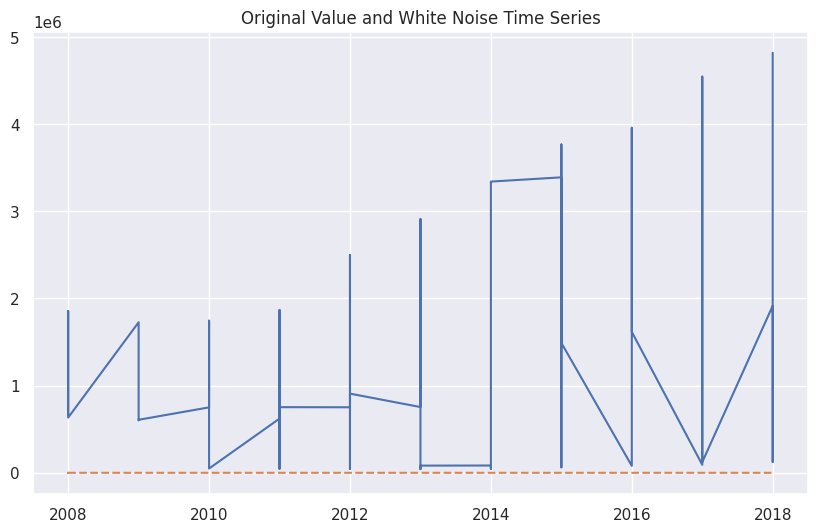

In [61]:
# Generate a white noise time series
np.random.seed(42)  # For reproducibility
white_noise = np.random.normal(size=len(df4))

# Add the white noise series to the df4 DataFrame
df4['white_noise'] = white_noise

# Plot the original 'value' series and the white noise series
plt.figure(figsize=(10, 6))

plt.plot(df4['year'], df4['value'], label='Original Value')
plt.plot(df4['year'], df4['white_noise'], label='White Noise', linestyle='--')

plt.title('Original Value and White Noise Time Series')
plt

There is a clear trend indicating that there is autocorellation and therefore our model may be able to predict future values.While autocorrelation indicates predictability to some extent, several factors can influence a model's actual predictive performance. Therefore we proceed with more advanced models

## F. STATIONARITY CHECKS

1. Checking for Stationarity with Augmented Dicky-Fuller Test
2. Removal of Stationarity through Differencing

#### Checking for Stationarity with Dickey-Fuller Test

In [62]:
from statsmodels.tsa.stattools import adfuller
# Perform ADF test for each zip code and print the results
# Get unique zip codes
zip_codes = df4['ZipCode'].unique()

# Loop through each zip code and perform the ADF test
for zip_code in zip_codes:
    df_zip = df4[df4['ZipCode'] == zip_code]
    result = adfuller(df_zip['value'].dropna())
    print(f'ADF test for Zip Code: {zip_code}')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    if result[1] > 0.05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
    else:
        print('Reject the null hypothesis. Data is stationary.\n')
    print('-' * 50)


ADF test for Zip Code: 11222
ADF Statistic: 0.5934330575941228
p-value: 0.98745264189478
Critical Values:
   1%: -3.4936021509366793
   5%: -2.8892174239808703
   10%: -2.58153320754717
Fail to reject the null hypothesis. Data is not stationary.

--------------------------------------------------
ADF test for Zip Code: 94301
ADF Statistic: 0.46518279322998146
p-value: 0.9837755415904116
Critical Values:
   1%: -3.490683082754047
   5%: -2.8879516565798817
   10%: -2.5808574442009578
Fail to reject the null hypothesis. Data is not stationary.

--------------------------------------------------
ADF test for Zip Code: 94043
ADF Statistic: 1.725970502725317
p-value: 0.9981903129956653
Critical Values:
   1%: -3.492995948509562
   5%: -2.888954648057252
   10%: -2.58139291903223
Fail to reject the null hypothesis. Data is not stationary.

--------------------------------------------------
ADF test for Zip Code: 85035
ADF Statistic: -0.2922970967838775
p-value: 0.9265882308704005
Critical Va

The Augmented Dickey-Fuller (ADF) test is used to determine whether a unit root is present in a time series dataset.

* ADF Statistic: The ADF statistic in this case is are mostly positive with one negative.

* p-value: The p-value associated with the test is between 0.9 and 1.

* Critical Values: Critical values are thresholds that the ADF statistic must exceed for different confidence levels (1%, 5%, and 10%).

**Interpretation:**
ADF Statistic: The more negative the ADF statistic (further from zero), the stronger the evidence against the null hypothesis (the presence of a unit root). In this case, the ADF statistic is significantly negative, indicating strong evidence against the null hypothesis.

p-value: The p-value of 0.0 (or very close to zero) suggests strong evidence against the null hypothesis. Typically, a p-value less than 0.05 (or the significance level chosen) indicates that you can reject the null hypothesis. Here, with a p-value of 0.0, we can confidently reject the null hypothesis of a unit root.

Critical Values: These values serve as benchmarks against which the ADF statistic is compared. Since the ADF statistic (-19.26) is much lower than the critical values at all significance levels (1%, 5%, and 10%), this further supports rejecting the null hypothesis.

Conclusion:
Based on the ADF test results:

For all the zip codes analyzed, the ADF test results show very high p-values, well above the common significance levels (1%, 5%, and 10%). This indicates that we fail to reject the null hypothesis for all the zip codes. In simpler terms, the data for all the zip codes tested is not stationary. Non-stationarity implies that the statistical properties of the series such as mean, variance, and autocorrelation are not constant over time, which is often a challenge for time series analysis and forecasting models.






#### Removal of Stationarity through Differencing

In [63]:
# Apply differencing and show ADF test results after differencing
for zip_code in zip_codes:
    df_zip = df4[df4['ZipCode'] == zip_code]
    result = adfuller(df_zip['value'].dropna())
    adf_statistic = result[0]

    # Adjust the critical value based on your ADF test results
    if adf_statistic > -3.52:  # Adjust this threshold as per your results
        # Perform differencing on train_data for this zip code
        df4.loc[df4['ZipCode'] == zip_code, 'value'] = df4.loc[df4['ZipCode'] == zip_code, 'value'].diff()
        # Perform ADF test after differencing
        df_zip_diff = df4[df4['ZipCode'] == zip_code].dropna()  # Remove NaNs after differencing
        result_diff = adfuller(df_zip_diff['value'])

        print(f"Differencing applied to Zip Code {zip_code}")
        print('New ADF Statistic:', result_diff[0])
        print('New p-value:', result_diff[1])
        print('New Critical Values:')
        for key, value in result_diff[4].items():
            print(f'   {key}: {value}')
        print('-' * 50)
    else:
        print(f"Zip Code {zip_code} is already stationary (ADF Statistic {adf_statistic})")

Differencing applied to Zip Code 11222
New ADF Statistic: -2.71038706768497
New p-value: 0.07225803521977787
New Critical Values:
   1%: -3.4942202045135513
   5%: -2.889485291005291
   10%: -2.5816762131519275
--------------------------------------------------
Differencing applied to Zip Code 94301
New ADF Statistic: -2.391209554305196
New p-value: 0.14423283356513578
New Critical Values:
   1%: -3.4942202045135513
   5%: -2.889485291005291
   10%: -2.5816762131519275
--------------------------------------------------
Differencing applied to Zip Code 94043
New ADF Statistic: -1.4541901581060068
New p-value: 0.5560389904085268
New Critical Values:
   1%: -3.492995948509562
   5%: -2.888954648057252
   10%: -2.58139291903223
--------------------------------------------------
Differencing applied to Zip Code 85035
New ADF Statistic: -2.3053225755242566
New p-value: 0.17025708106464021
New Critical Values:
   1%: -3.506944401824286
   5%: -2.894989819214876
   10%: -2.584614550619835
----

In [64]:
df4

RegionID  ZipCode            City State   CountyName  SizeRank  \
time                                                                      
2008-05     62033    11222        New York    NY        Kings      1156   
2008-05     97691    94301       Palo Alto    CA  Santa Clara      5739   
2008-05     97530    94043   Mountain View    CA  Santa Clara      2581   
2008-06     62033    11222        New York    NY        Kings      1156   
2008-06     97691    94301       Palo Alto    CA  Santa Clara      5739   
...           ...      ...             ...   ...          ...       ...   
2018-04     62033    11222        New York    NY        Kings      1156   
2018-04     97530    94043   Mountain View    CA  Santa Clara      2581   
2018-04     70817    30032  Candler-Mcafee    GA       Dekalb       843   
2018-04     94751    85035         Phoenix    AZ     Maricopa      1947   
2018-04     97691    94301       Palo Alto    CA  Santa Clara      5739   

           value         ROI  year  quarter   year_month  white_noise  
time                                                                   
2008-05      NaN  158.812030  2008        2  2008.333333     0.496714  
2008-05      NaN  159.556130  2008        2  2008.333333    -0.138264  
2008-05      NaN  162.645570  2008        2  2008.333333     0.647689  
2008-06  -8800.0  158.812030  2008        2  2008.416667     1.523030  
2008-06 -20500.0  159.556130  2008        2  2008.416667    -0.234153  
...          ...         ...   ...      ...          ...          ...  
2018-04  27100.0  158.812030  2018        2  2018.250000    -0.863991  
2018-04  43100.0  162.645570  2018        2  2018.250000     0.048522  
2018-04   3100.0  219.014085  2018        2  2018.250000    -0.830950  
2018-04      0.0  211.411992  2018        2  2018.250000     0.270457  
2018-04  55800.0  159.556130  2018        2  2018.250000    -0.050238  

[512 rows x 12 columns]

#### G. SEASONALITY CHECKS

1. Seasonality Check
2. Seasonality Elimination


In [65]:
df4.head()

RegionID  ZipCode           City State   CountyName  SizeRank  \
time                                                                     
2008-05     62033    11222       New York    NY        Kings      1156   
2008-05     97691    94301      Palo Alto    CA  Santa Clara      5739   
2008-05     97530    94043  Mountain View    CA  Santa Clara      2581   
2008-06     62033    11222       New York    NY        Kings      1156   
2008-06     97691    94301      Palo Alto    CA  Santa Clara      5739   

           value        ROI  year  quarter   year_month  white_noise  
time                                                                  
2008-05      NaN  158.81203  2008        2  2008.333333     0.496714  
2008-05      NaN  159.55613  2008        2  2008.333333    -0.138264  
2008-05      NaN  162.64557  2008        2  2008.333333     0.647689  
2008-06  -8800.0  158.81203  2008        2  2008.416667     1.523030  
2008-06 -20500.0  159.55613  2008        2  2008.416667    -0.234153

In [66]:

# Pivot the DataFrame to have time as index and ZipCodes as columns with their values
df_pivot = df4.pivot_table(index='time', columns='ZipCode', values='value')

# Display the transformed DataFrame
df_pivot

ZipCode    11222   30032   85035    94043    94301
time                                              
2008-06  -8800.0     NaN     NaN  -6800.0 -20500.0
2008-07  -9100.0     NaN     NaN  -5400.0 -21500.0
2008-08  -6200.0     NaN     NaN  -3900.0 -21000.0
2008-09  -3000.0     NaN     NaN  -3100.0 -18100.0
2008-10  -2200.0     NaN     NaN  -3000.0 -16400.0
...          ...     ...     ...      ...      ...
2017-12   7100.0  4000.0  2200.0  34100.0  63000.0
2018-01  10600.0  3100.0  1800.0  33800.0  50400.0
2018-02  11000.0  3200.0  1600.0  49900.0  73600.0
2018-03  21200.0  4200.0   800.0  66200.0  93900.0
2018-04  27100.0  3100.0     0.0  43100.0  55800.0

[119 rows x 5 columns]

##### 1. Check For Seasonality

Seasonality: 11222 is Seasonal


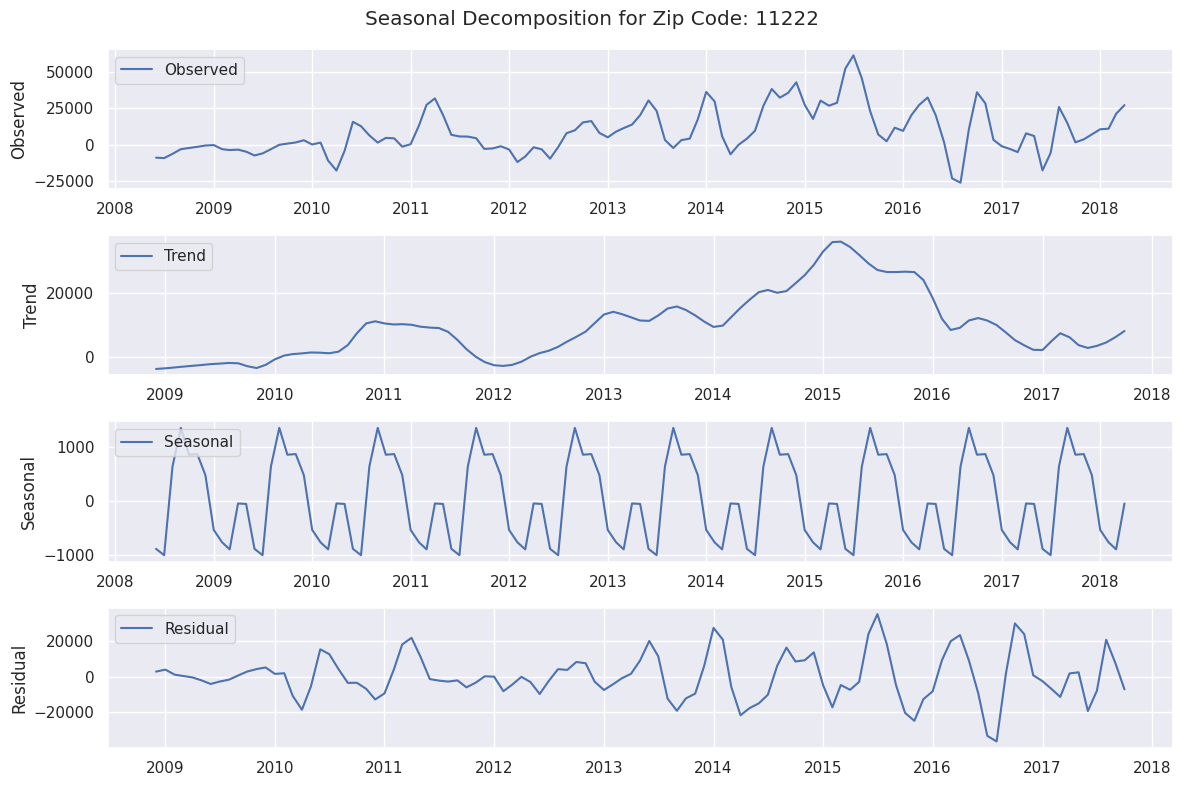

Seasonality: 30032 is Seasonal


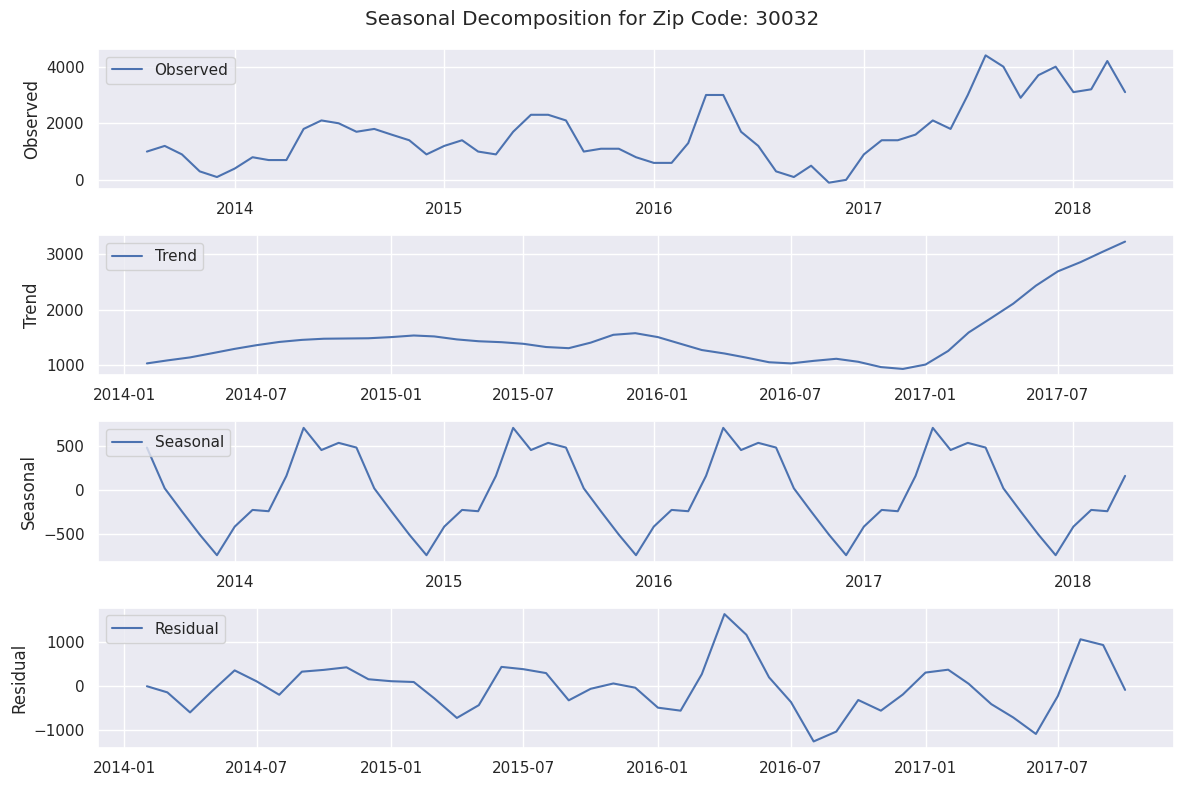

Seasonality: 85035 is Seasonal


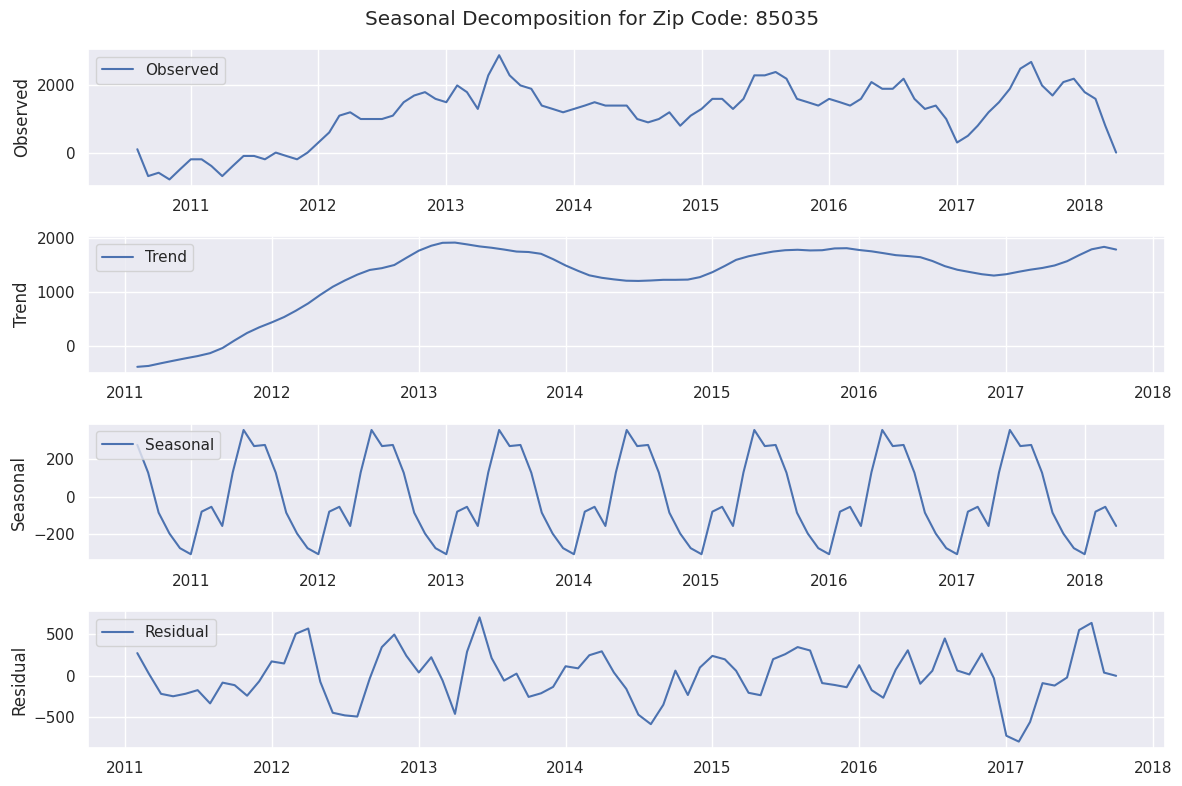

Seasonality: 94043 is Seasonal


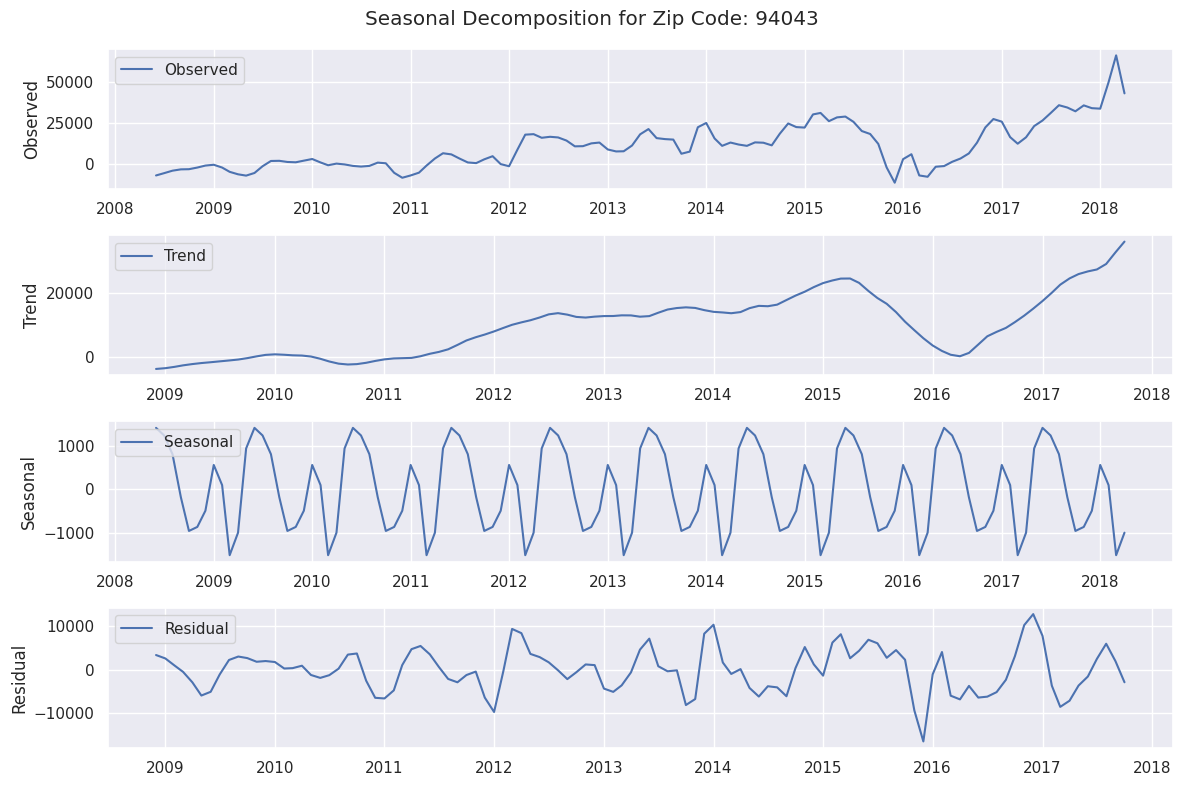

Seasonality: 94301 is Seasonal


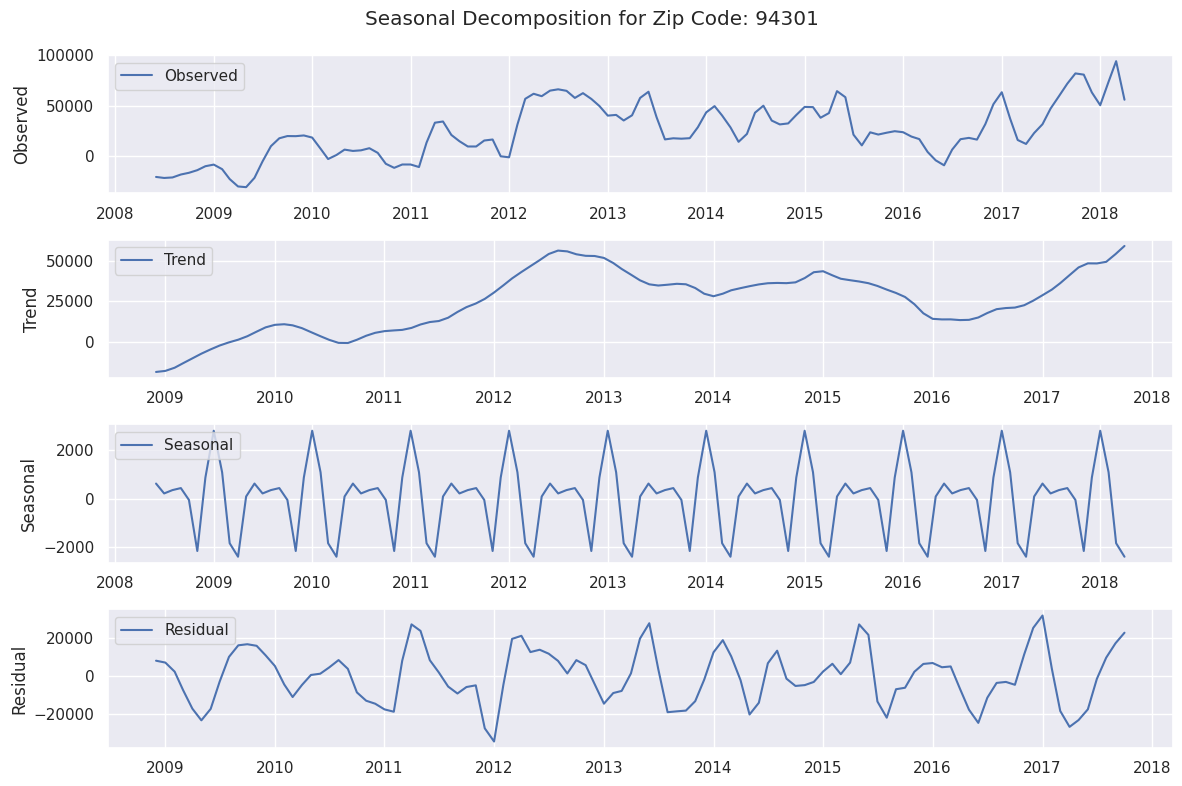

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

def check_seasonality(df_pivot, zip_code):
    df_zip = df_pivot[zip_code].dropna()  # Select the specific zip code's data and drop NaN values

    # Perform seasonal decomposition
    decomposition = seasonal_decompose(df_zip, model='additive', period=12)  # Assuming monthly data

    # Check for seasonality based on the standard deviation of the seasonal component
    if np.std(decomposition.seasonal) > 0.5:
        print(f"Seasonality: {zip_code} is Seasonal")
    else:
        print(f"Seasonality: {zip_code} is not Seasonal")

    # Plot the decomposition
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))

    # Convert PeriodIndex to datetime for plotting if needed
    if isinstance(decomposition.observed.index, pd.PeriodIndex):
        observed_index = decomposition.observed.index.to_timestamp()
    else:
        observed_index = decomposition.observed.index

    ax1.plot(observed_index, decomposition.observed, label='Observed')
    ax1.set_ylabel('Observed')
    ax1.legend(loc='upper left')

    ax2.plot(observed_index, decomposition.trend, label='Trend')
    ax2.set_ylabel('Trend')
    ax2.legend(loc='upper left')

    ax3.plot(observed_index, decomposition.seasonal, label='Seasonal')
    ax3.set_ylabel('Seasonal')
    ax3.legend(loc='upper left')

    ax4.plot(observed_index, decomposition.resid, label='Residual')
    ax4.set_ylabel('Residual')
    ax4.legend(loc='upper left')

    fig.suptitle(f'Seasonal Decomposition for Zip Code: {zip_code}')
    plt.tight_layout()
    plt.show()

# Loop through each zip code and check for seasonality and plot decomposition
for zip_code in df_pivot.columns:
    check_seasonality(df_pivot, zip_code)



#### Eliminating Trend and Seasonality using Decomposing the Time Series
The purpose is to identify trends and seasonality detection. The residual component obtained from decomposition represents the random variations or noise in the data that are not explained by the trend or seasonal patterns. Analyzing residuals helps in assessing the goodness of fit of our model and in detecting any remaining patterns that may need further investigation.
Decomposition also provides insights into the structure of the time series, which can guide the selection of appropriate models for forecasting.

1. Original Time Series Plot:
Interpretation: A basic line plot of the original time series data against time. This plot helps visualize the overall trend and any apparent seasonality or irregularities.

2. Trend Component Plot:
Interpretation: This plot shows the extracted trend component after decomposition. It helps visualize the long-term direction or movement of the data, ignoring seasonal fluctuations and noise. A clear trend can indicate whether the series is increasing, decreasing, or staying relatively stable over time. OUr trund has flactuations over time.

3. Seasonal Component Plot:
Interpretation: Shows the seasonal pattern extracted from the data. It reveals repetitive patterns that occur within specific time intervals, in our case it is monthly. Understanding the seasonal component is crucial for selecting seasonal models like SARIMA (Seasonal Autoregressive Integrated Moving Average).

4. Residual Plot:
Interpretation: This plot displays the residual component obtained after removing the trend and seasonal components from the original data. Residuals ideally should exhibit no clear patterns or trends, indicating that the model has effectively captured the systematic variation in the data. Patterns in residuals might suggest further adjustments or insights into the data structure.

**Overall Interpretation:**

**There is seasonality in  all the trends for individual zipcodes**
Trend: Helps understand the overall direction and long-term behavior of the data.
Seasonality: Identifies repetitive patterns within the data, guiding the selection of seasonal models.
Residuals: Assess model adequacy by examining the randomness and lack of patterns in residuals.
Model Selection: Visualizations aid in choosing appropriate time series models (e.g., ARIMA, SARIMA) that best capture the observed patterns and provide accurate forecasts.

##### 2. Removal of Seasonlity

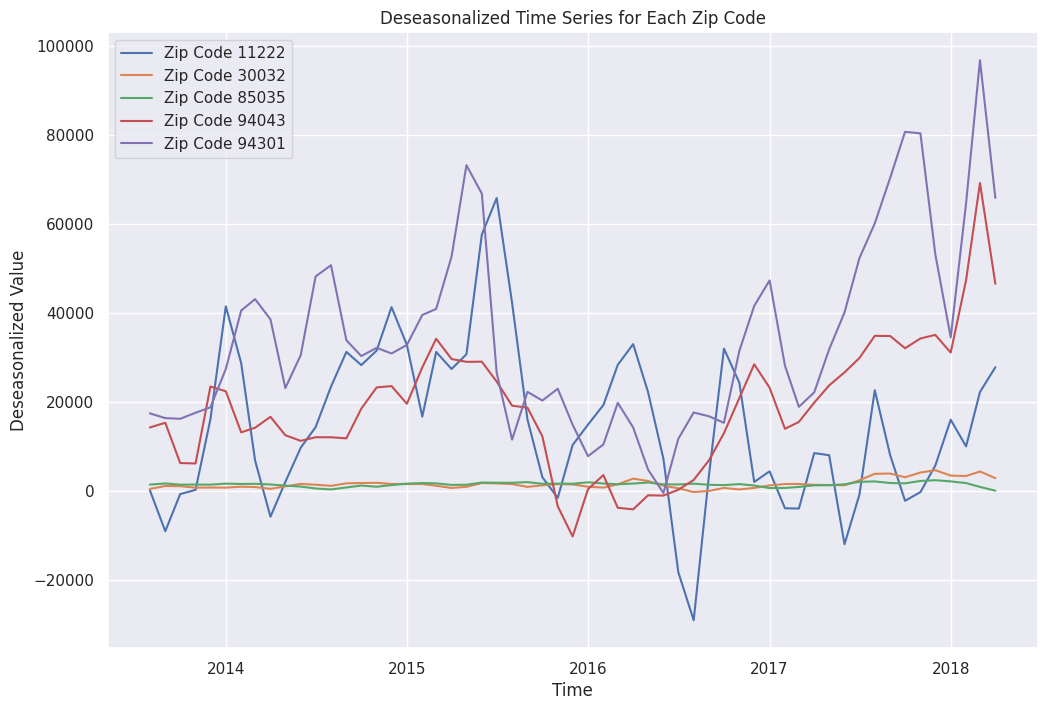

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Drop missing values from the DataFrame
df_pivot.dropna(inplace=True)

# Convert index to datetime if it's in Period format
df_pivot.index = df_pivot.index.to_timestamp()

# Check for missing values
missing_values = df_pivot.isnull().sum().sum()
if missing_values > 0:
    print(f"There are still {missing_values} missing values in the DataFrame. Investigate further.")

# Initialize a figure for plotting
plt.figure(figsize=(12, 8))

# Loop through each zip code and plot deseasonalized series with trend line
for zip_code in df_pivot.columns:
    # Perform seasonal decomposition
    decomposition = seasonal_decompose(df_pivot[zip_code], model='additive', period=12)

    # Deseasonalize by subtracting the seasonal component
    deseasonalized = df_pivot[zip_code] - decomposition.seasonal

    # Plot deseasonalized series with trend line
    plt.plot(df_pivot.index, deseasonalized, label=f'Zip Code {zip_code}')

plt.title('Deseasonalized Time Series for Each Zip Code')
plt.xlabel('Time')
plt.ylabel('Deseasonalized Value')
plt.legend()
plt.show()


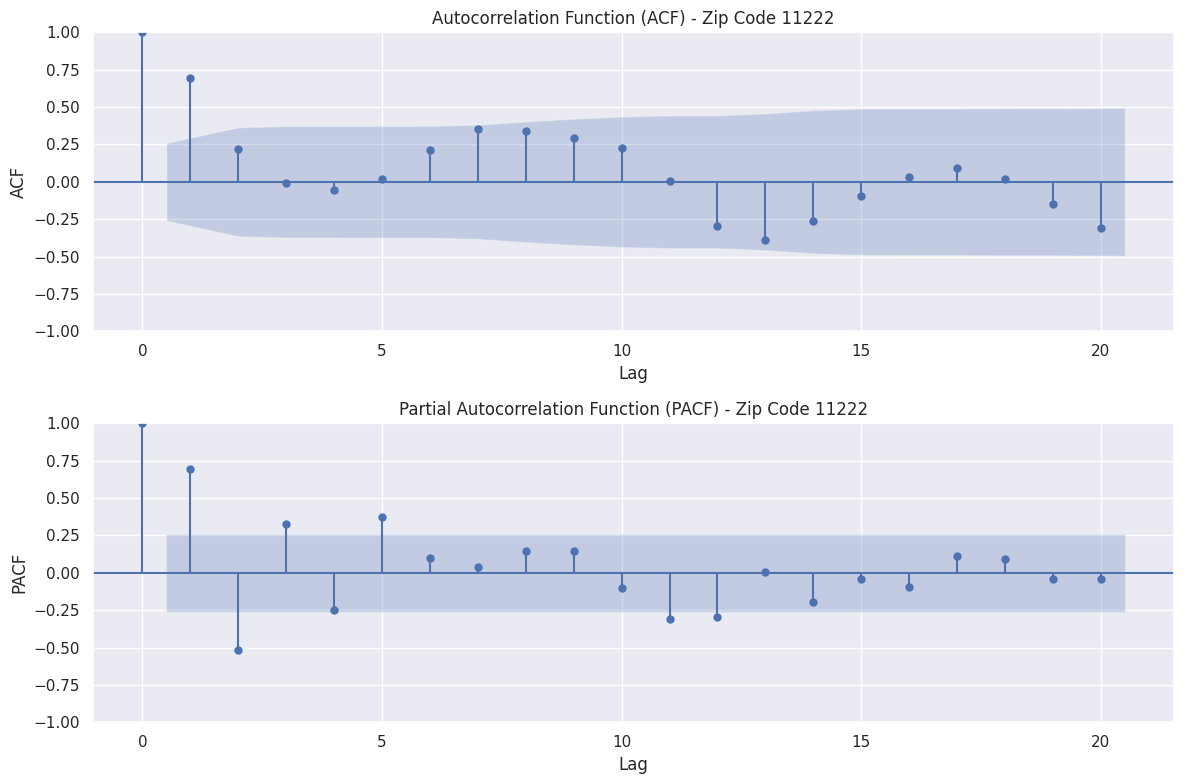

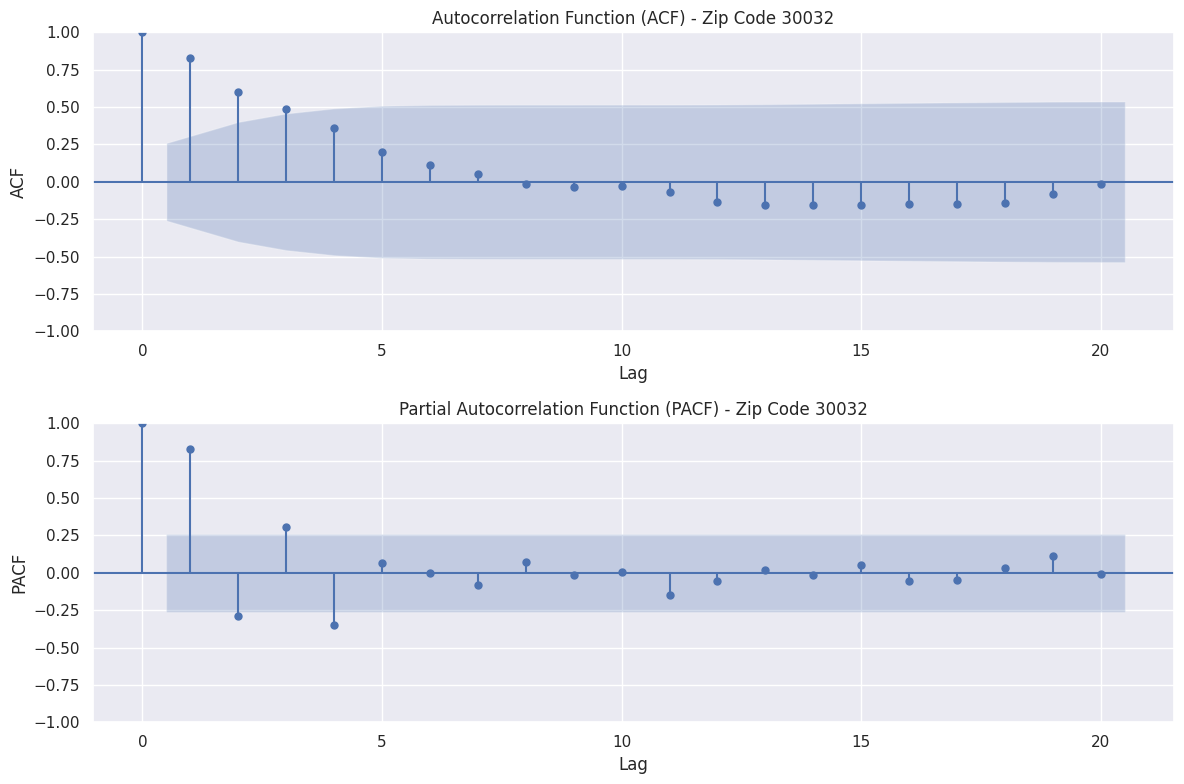

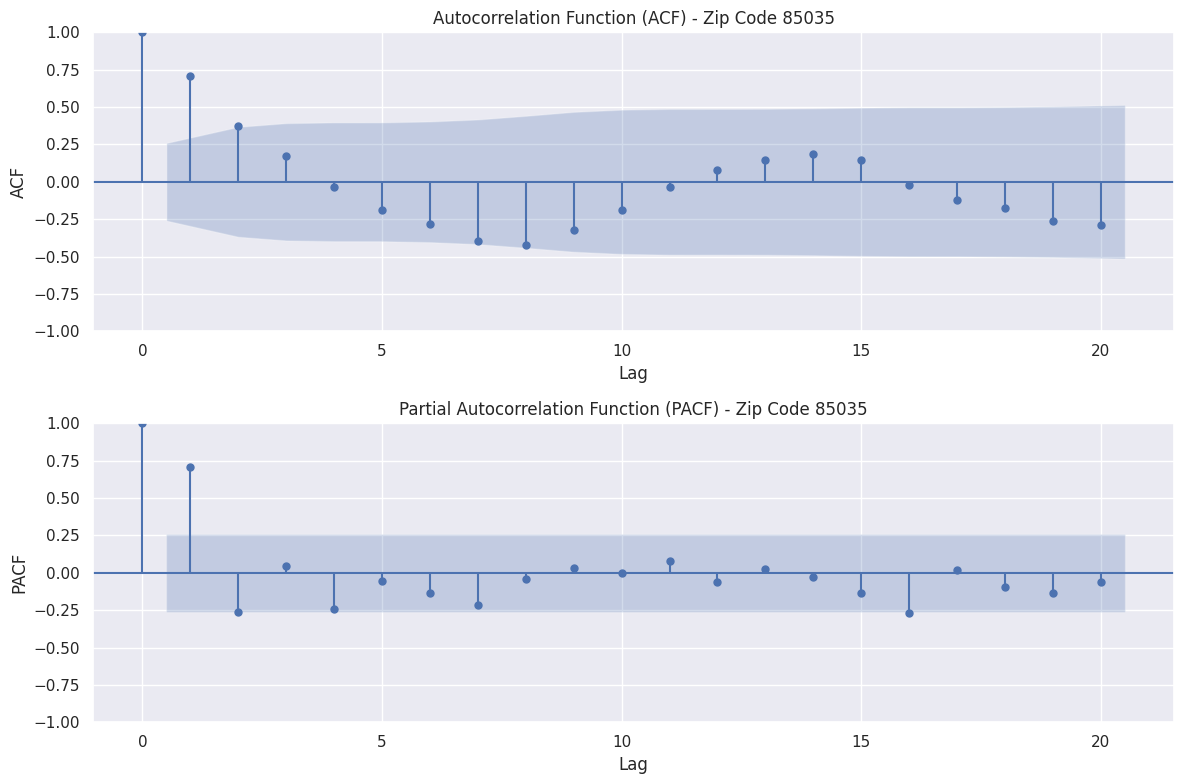

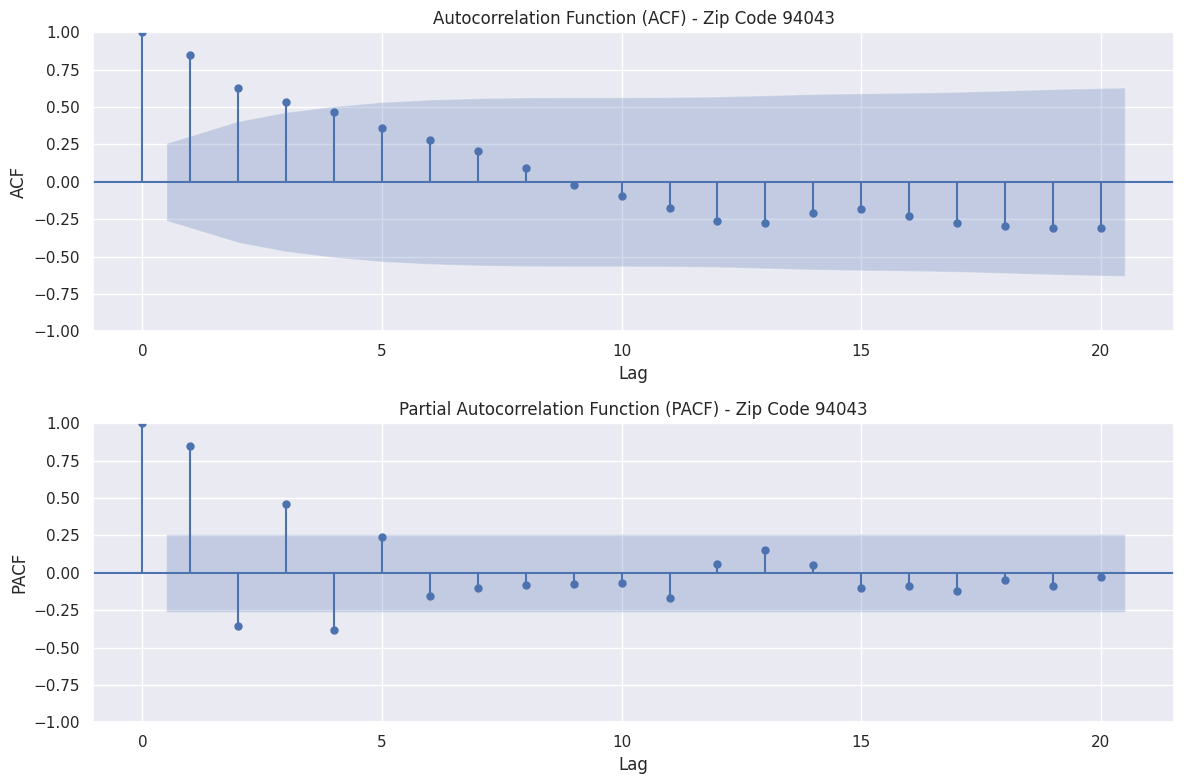

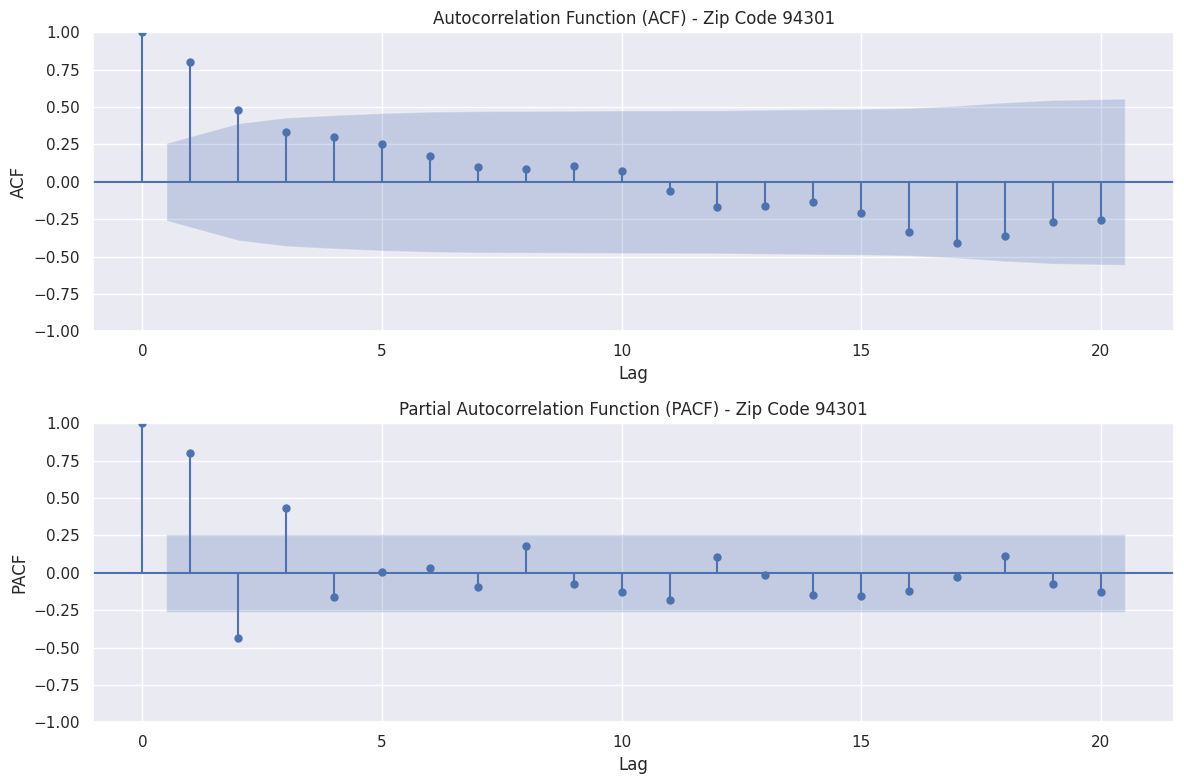

In [69]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming df_pivot is your DataFrame with time as index and zip codes as columns

# Loop through each zip code and plot ACF and PACF
for zip_code in df_pivot.columns:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

    # Plot ACF
    plot_acf(df_pivot[zip_code].dropna(), lags=20, ax=ax1)
    ax1.set_title(f'Autocorrelation Function (ACF) - Zip Code {zip_code}')
    ax1.set_xlabel('Lag')
    ax1.set_ylabel('ACF')

    # Plot PACF
    plot_pacf(df_pivot[zip_code].dropna(), lags=20, ax=ax2)
    ax2.set_title(f'Partial Autocorrelation Function (PACF) - Zip Code {zip_code}')
    ax2.set_xlabel('Lag')
    ax2.set_ylabel('PACF')

    plt.tight_layout()
    plt.show()


ACF measures the correlation between a time series and its lagged values.
This helps in identifying patterns such as **seasonality and trends** in the data, **Model selection** by indicating the number of lagged terms needed in autoregressive (AR) models and **Stationarity**, where ACF can indicate if the time series is stationary (constant mean and variance over time), which is crucial for many time series models.
PACF measures the correlation between a time series and its lagged values, removing the effects of intermediate lags.
PACF helps in identifying the order of the autoregressive (AR) term in ARIMA models. It shows the direct relationship between observations at different time steps without the influence of other time points.
Model Diagnosis: PACF complements ACF by providing additional insights into the specific effects of lagged terms on the current value, aiding in model diagnosis and selection.

**Interpretation:** In both plots, significant spikes beyond the confidence intervals suggest strong correlations at those lags, indicating potential terms to include in time series models.


In [70]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RegionID         15 non-null     int64  
 1   ZipCode          15 non-null     int64  
 2   City             15 non-null     object 
 3   State            15 non-null     object 
 4   CountyName       15 non-null     object 
 5   SizeRank         15 non-null     int64  
 6   year             15 non-null     int32  
 7   value            15 non-null     float64
 8   ROI              15 non-null     float64
 9   Roll_mean        15 non-null     float64
 10  Roll_max         13 non-null     float64
 11  Expand_mean      15 non-null     float64
 12  Expand_max       15 non-null     float64
 13  Expand_min       15 non-null     float64
 14  mom_growth_rate  13 non-null     float64
 15  yoy_growth_rate  0 non-null      float64
 16  rolling_std_12   0 non-null      float64
dtypes: float64(10), in

## G. MODELING

### 1. ARIMA MODEL

In [71]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ts_85035 = df4[df4['ZipCode'] == 85035]['value'].diff().dropna()
ts_33974 = df4[df4['ZipCode'] == 33974]['value'].diff().dropna()
ts_80216 = df4[df4['ZipCode'] == 80216]['value'].diff().dropna()
ts_30032 = df4[df4['ZipCode'] == 30032]['value'].diff().dropna()
ts_27980 = df4[df4['ZipCode'] == 27980]['value'].diff().dropna()


In [72]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Example function for cross-validation
def rolling_cv_arima(data, order, tscv):
    rmse_scores = []
    mae_scores = []

    for train_index, test_index in tscv.split(data):
        train, test = data.iloc[train_index], data.iloc[test_index]

       # Fit the ARIMA model
        model = ARIMA(train, order=order)
        model_fit = model.fit()

        # Forecast the test period
        forecast = model_fit.forecast(steps=len(test))

        # Calculate evaluation metrics
        rmse = np.sqrt(mean_squared_error(test, forecast))
        mae = mean_absolute_error(test, forecast)

        rmse_scores.append(rmse)
        mae_scores.append(mae)

    return rmse_scores, mae_scores
tscv = TimeSeriesSplit(n_splits=5)
order = (1, 1, 1)

rmse_scores, mae_scores = rolling_cv_arima(ts_85035, order, tscv)

print(f"Average RMSE: {np.mean(rmse_scores)}, Average MAE: {np.mean(mae_scores)}")

Average RMSE: 361.0970221654628, Average MAE: 287.9688103399867


In [73]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

def rolling_cv_sarima(data, order, seasonal_order, tscv):
    rmse_scores = []
    mae_scores = []

    for train_index, test_index in tscv.split(data):
        train, test = data.iloc[train_index], data.iloc[test_index]

        # Fit the SARIMA model
        model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
        model_fit = model.fit(disp=False)

        # Forecast the test period
        forecast = model_fit.forecast(steps=len(test))

        # Handle potential NaNs in test and forecast
        test_clean = test.dropna()
        # Convert forecast to a Series with the same index as test_clean
        forecast_clean = pd.Series(forecast.values, index=test.index).reindex(test_clean.index)

        # Calculate evaluation metrics if there are valid data points
        if len(test_clean) > 0:
            rmse = np.sqrt(mean_squared_error(test_clean, forecast_clean))
            mae = mean_absolute_error(test_clean, forecast_clean)

            rmse_scores.append(rmse)
            mae_scores.append(mae)

    return rmse_scores, mae_scores
# Perform time series split cross-validation
tscv = TimeSeriesSplit(n_splits=5)
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

rmse_scores, mae_scores = rolling_cv_sarima(ts_85035, order, seasonal_order, tscv)

print("RMSE scores:", rmse_scores)
print("MAE scores:", mae_scores)

RMSE scores: [460.06290655282385, 438.0651900249102, 240.19149134449486, 385.7756081389571, 505.9357518161537]
MAE scores: [377.4288185552365, 307.1797553260884, 190.32085552355775, 326.4298232048781, 425.000760595549]


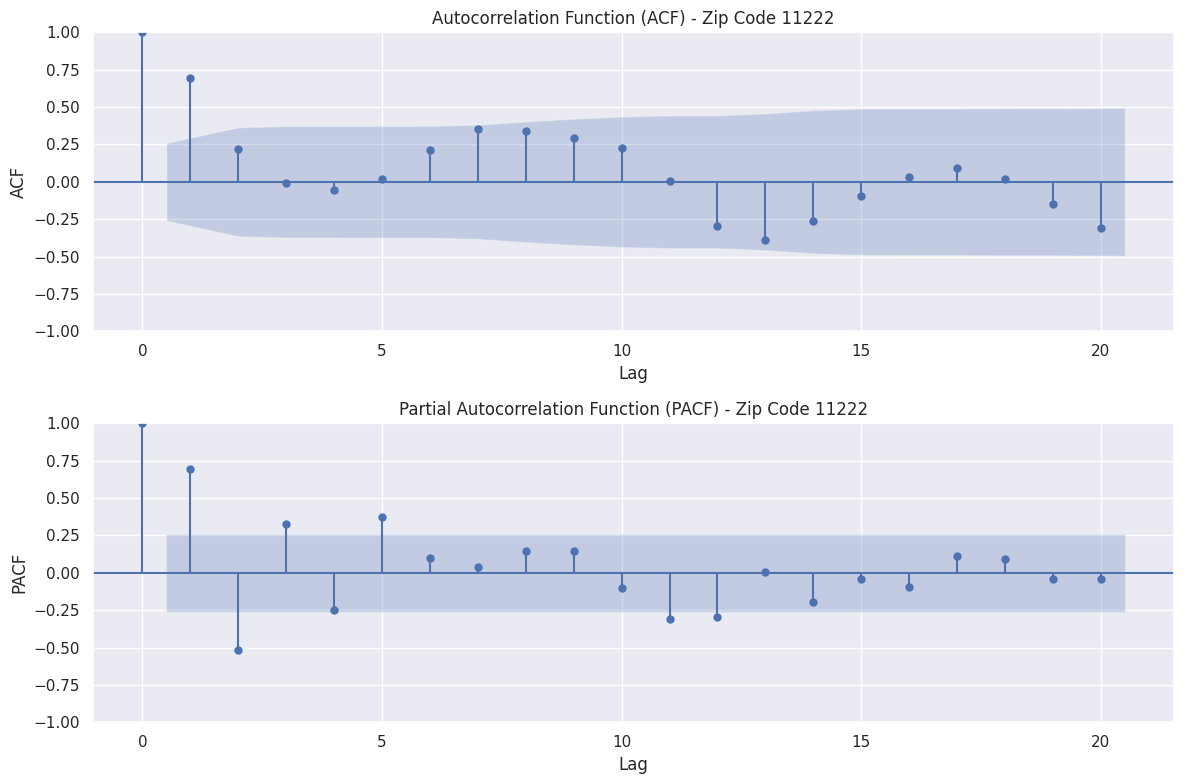

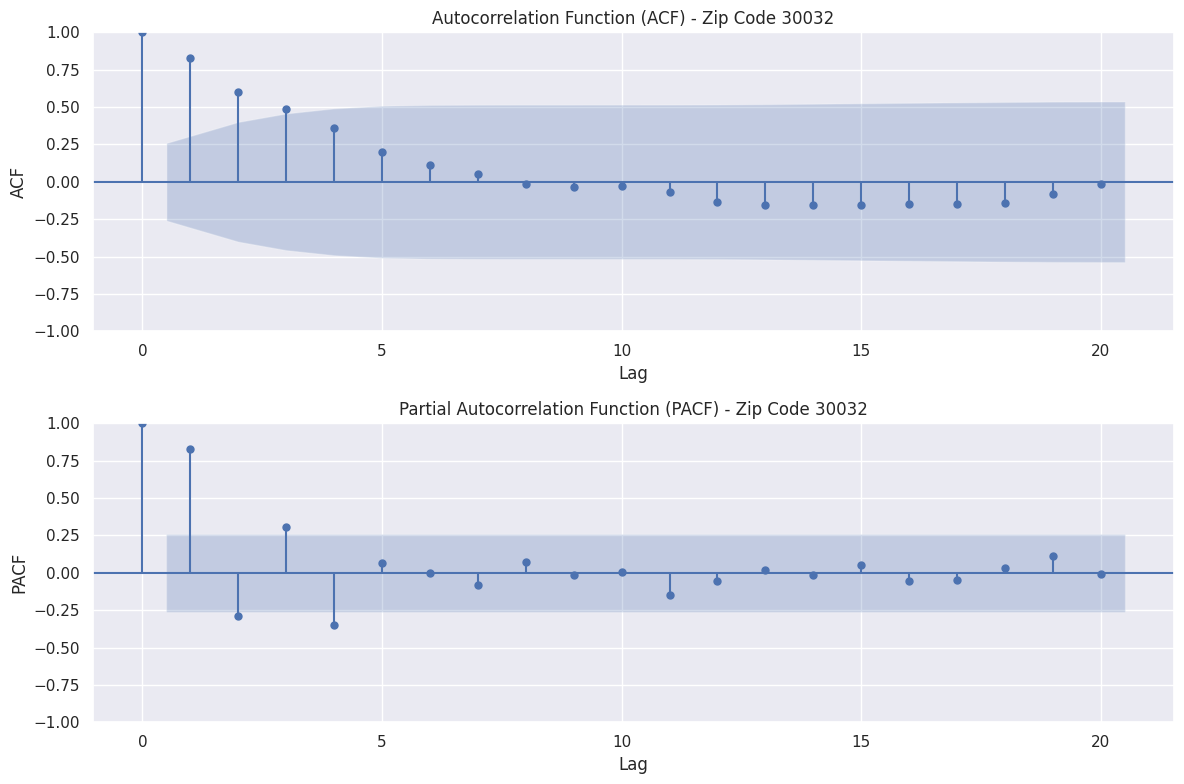

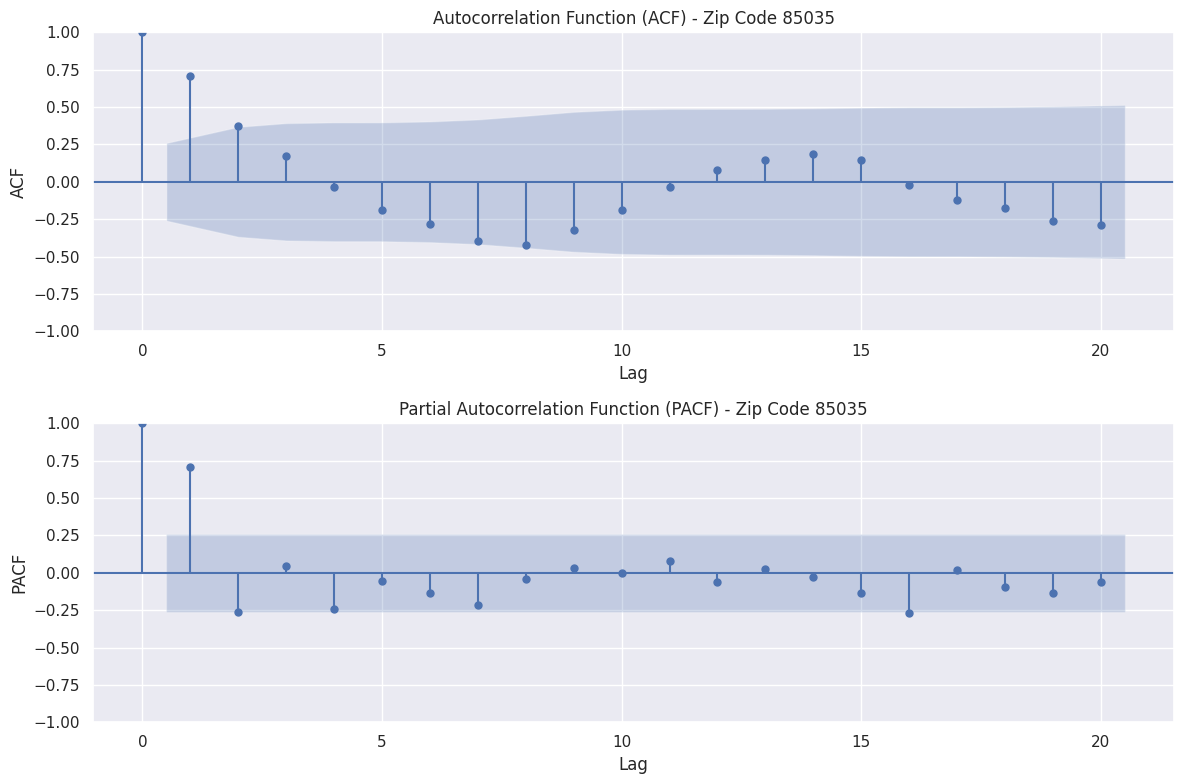

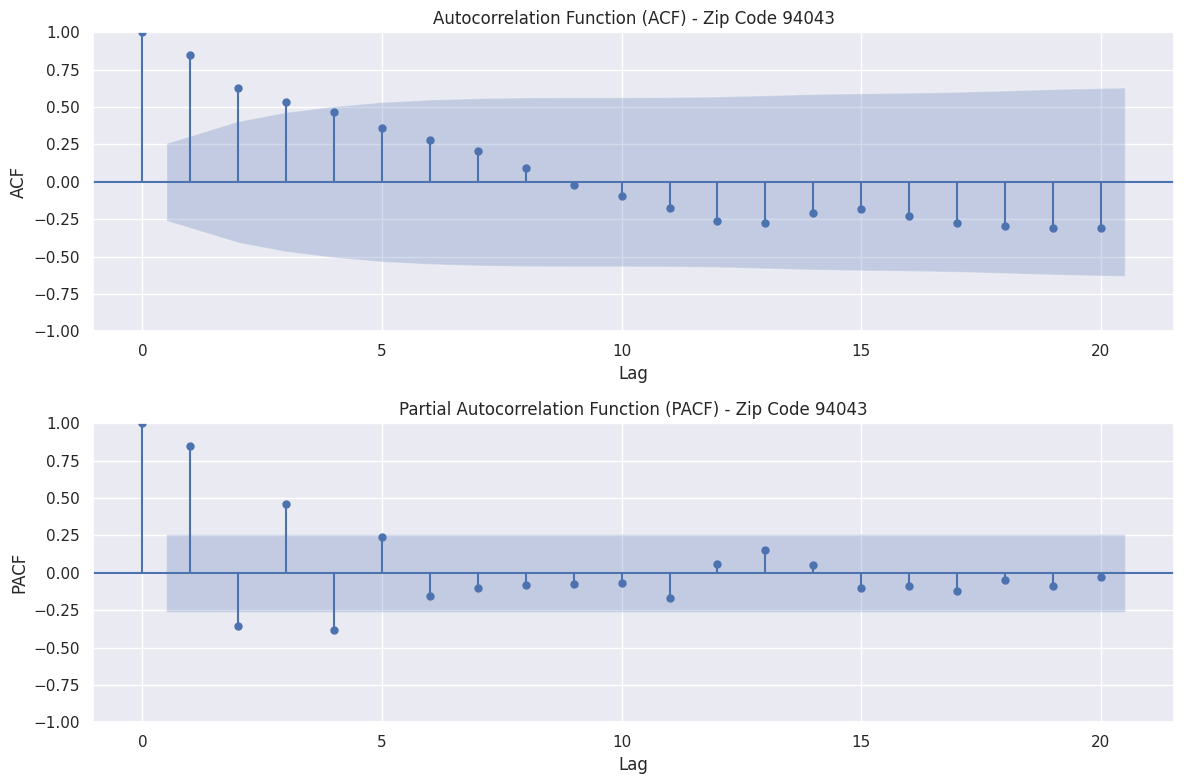

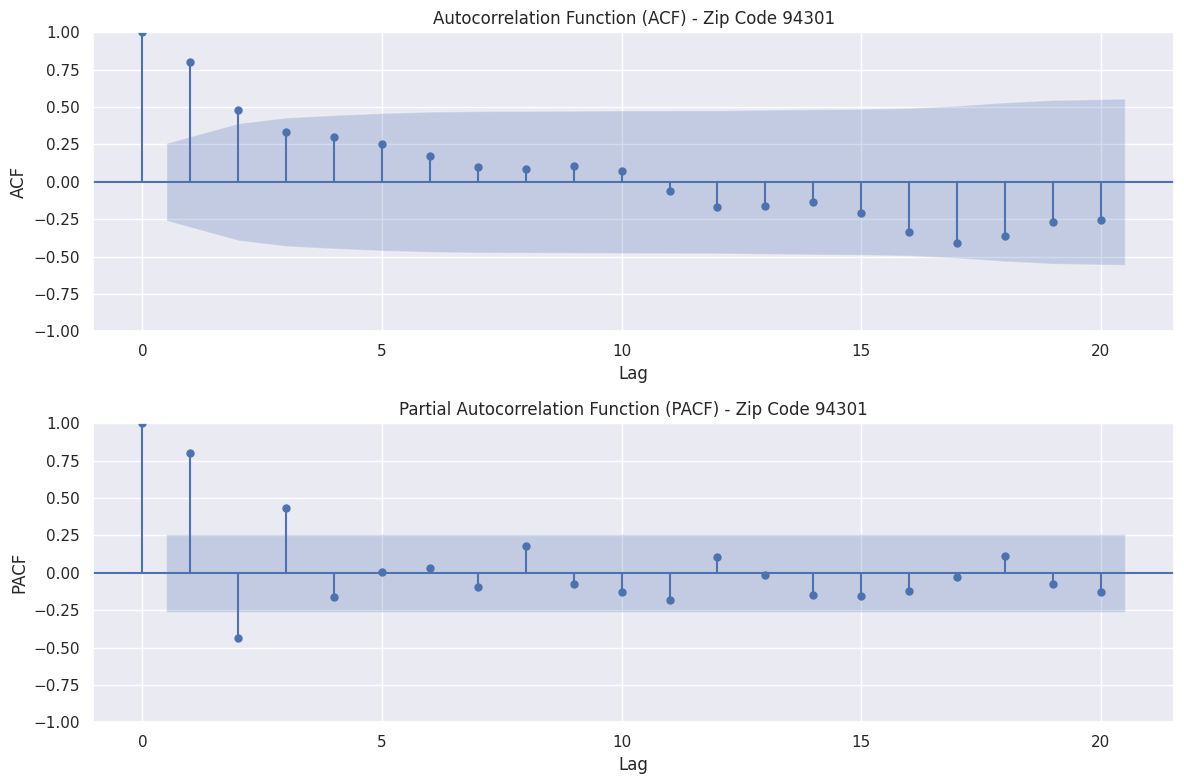

In [74]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Loop through each zip code and plot ACF and PACF
for zip_code in df_pivot.columns:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

    # Plot ACF
    plot_acf(df_pivot[zip_code].dropna(), lags=20, ax=ax1)
    ax1.set_title(f'Autocorrelation Function (ACF) - Zip Code {zip_code}')
    ax1.set_xlabel('Lag')
    ax1.set_ylabel('ACF')

    # Plot PACF
    plot_pacf(df_pivot[zip_code].dropna(), lags=20, ax=ax2)
    ax2.set_title(f'Partial Autocorrelation Function (PACF) - Zip Code {zip_code}')
    ax2.set_xlabel('Lag')
    ax2.set_ylabel('PACF')

    plt.tight_layout()
    plt.show()

In [75]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.0 MB/s eta 0:00:00


In [76]:
# using auto arima to find the best p,d,q for our model
from pmdarima import auto_arima

# Use auto_arima directly instead of through the 'pm' alias
model_85035 = auto_arima(ts_85035, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
print(model_85035.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1328.937, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1342.124, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1339.606, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1333.679, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1340.124, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1332.476, Time=0.24 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=1330.869, Time=0.18 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1330.866, Time=0.87 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1332.459, Time=0.51 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=1332.984, Time=0.24 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1333.543, Time=0.46 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.24 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1326.936, Time=0.56 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1

In [77]:
from sklearn.model_selection import TimeSeriesSplit

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Assuming ts_85035 is a pandas DataFrame with a datetime index
X = ts_85035

# Generating the splits
for train_index, test_index in tscv.split(X):
    train_85035, test_85035 = X.iloc[train_index], X.iloc[test_index]

    # You can print the indices or the actual split data
    print("TRAIN:")
    print(train_85035)
    print("TEST:")
    print(test_85035)
    print("-" * 80)

TRAIN:
time
2010-09   -800.0
2010-10    100.0
2010-11   -200.0
2010-12    300.0
2011-01    300.0
2011-02      0.0
2011-03   -200.0
2011-04   -300.0
2011-05    300.0
2011-06    300.0
2011-07      0.0
2011-08   -100.0
2011-09    200.0
2011-10   -100.0
2011-11   -100.0
2011-12    200.0
2012-01    300.0
Freq: M, Name: value, dtype: float64
TEST:
time
2012-02    300.0
2012-03    500.0
2012-04    100.0
2012-05   -200.0
2012-06      0.0
2012-07      0.0
2012-08    100.0
2012-09    400.0
2012-10    200.0
2012-11    100.0
2012-12   -200.0
2013-01   -100.0
2013-02    500.0
2013-03   -200.0
2013-04   -500.0
Freq: M, Name: value, dtype: float64
--------------------------------------------------------------------------------
TRAIN:
time
2010-09   -800.0
2010-10    100.0
2010-11   -200.0
2010-12    300.0
2011-01    300.0
2011-02      0.0
2011-03   -200.0
2011-04   -300.0
2011-05    300.0
2011-06    300.0
2011-07      0.0
2011-08   -100.0
2011-09    200.0
2011-10   -100.0
2011-11   -100.0
2011-12    

In [78]:
# initializing ARIMA model
ARIMAmodel = ARIMA(train_85035, order=(2, 0, 1))

In [79]:
# fit the model
ARIMAmodel = ARIMAmodel.fit()

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   77
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -548.718
Date:                Wed, 03 Jul 2024   AIC                           1107.435
Time:                        19:51:10   BIC                           1119.154
Sample:                    09-30-2010   HQIC                          1112.123
                         - 01-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1223     35.625      0.088      0.930     -66.702      72.946
ar.L1         -0.3117      0.238     -1.311      0.190      -0.778       0.154
ar.L2         -0.2640      0.151     -1.744      0.0

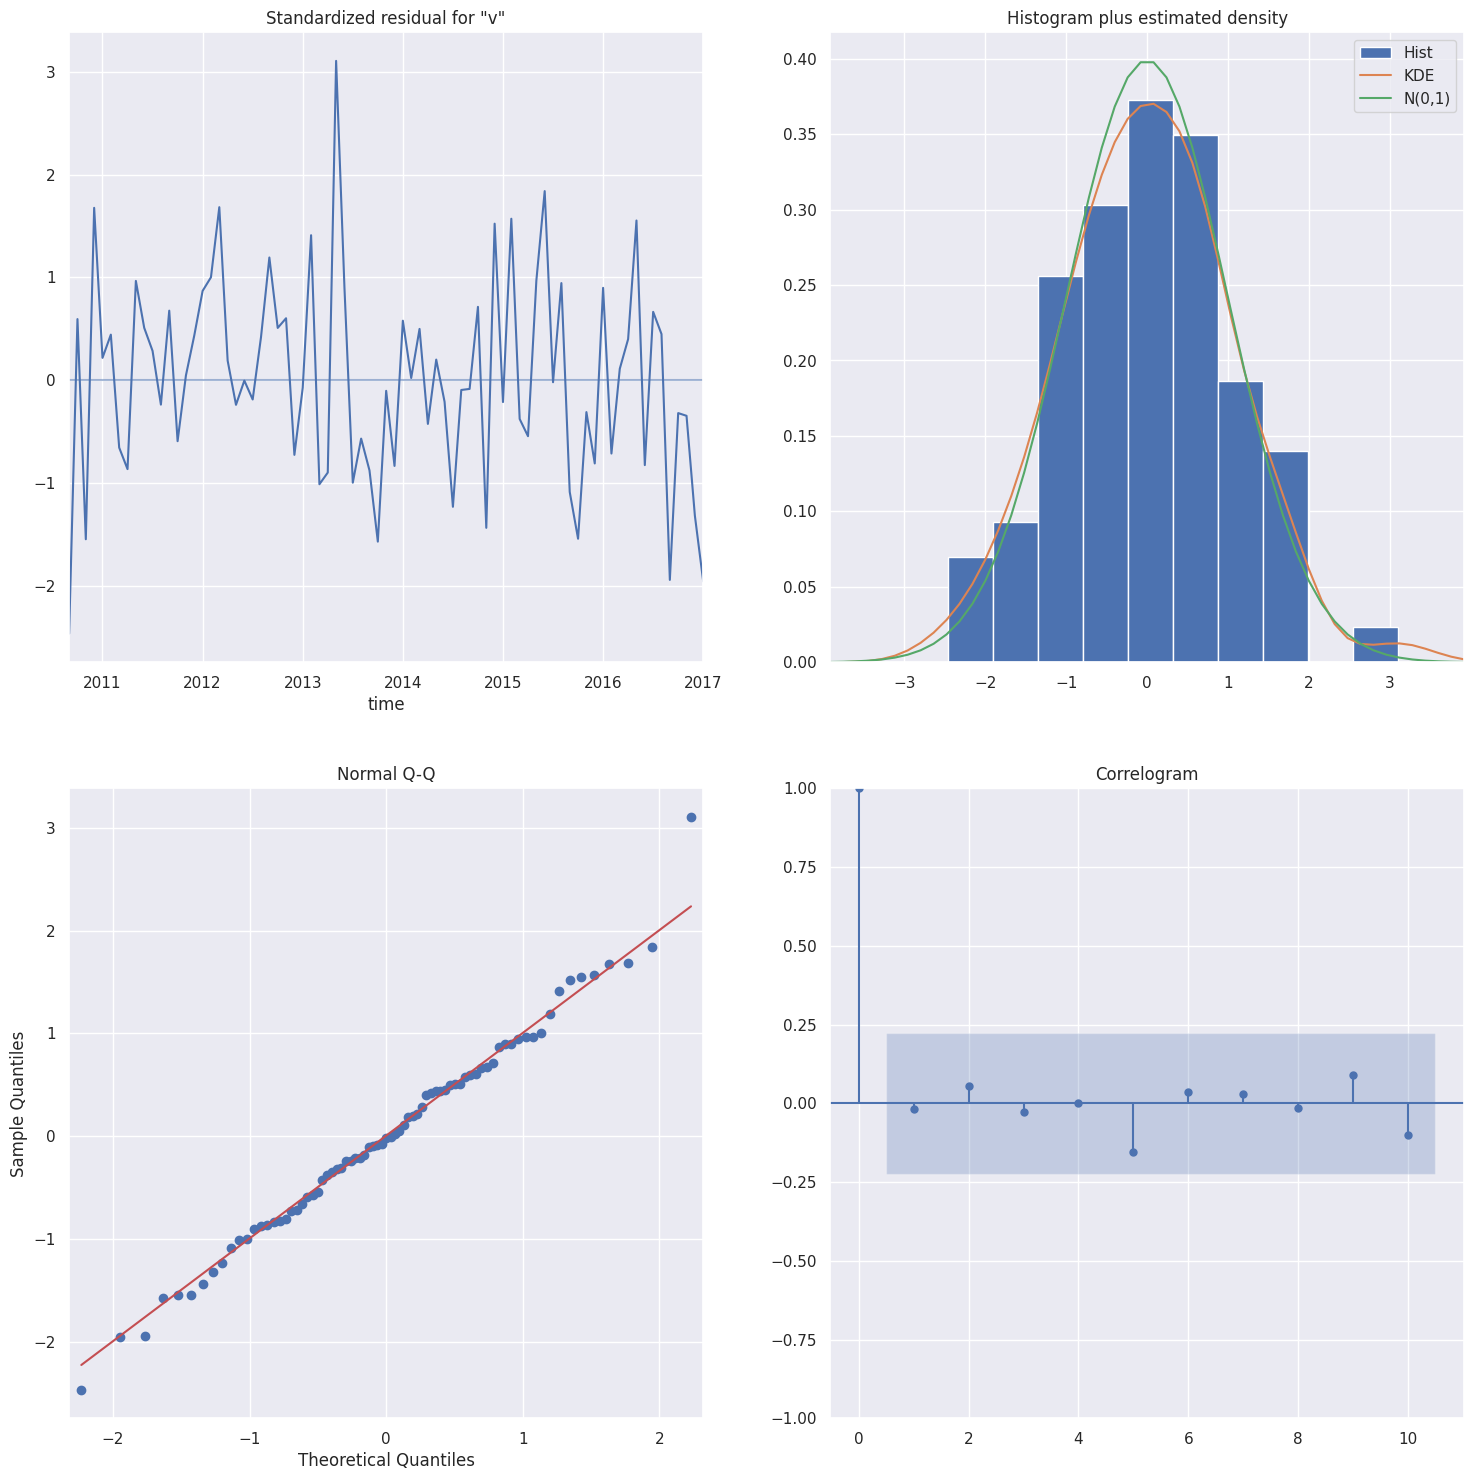

In [80]:
# printing the model summary
print(ARIMAmodel.summary())
ARIMAmodel.plot_diagnostics(figsize=(18,18))
plt.show()

In [81]:
#Define the range of parameters to search over
p_range = range(0, 3)
d_range = range(0, 2)
q_range = range(0, 3)

# Initialize variables to store best model and minimum AIC
best_model = None
best_aic = float("inf")

# Perform grid search
for p in p_range:
    for d in d_range:
        for q in q_range:
            # Fit ARIMA model
            model = auto_arima(ts_85035, start_p=p, d=d, start_q=q,
                               max_p=5, max_d=5, max_q=5,
                               seasonal=False,
                               suppress_warnings=True,
                               error_action='ignore',
                               stepwise=True)

            # Get model AIC (you can use BIC or other metrics as well)
            aic = model.aic()

            # Check if current model is better than the best found so far
            if aic < best_aic:
                best_aic = aic
                best_model = model
                best_params = (p, d, q)

# Print the best model summary and parameters
print("Best ARIMA model parameters (p, d, q):", best_params)
print(best_model.summary())

Best ARIMA model parameters (p, d, q): (2, 0, 2)
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   92
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -658.468
Date:                Wed, 03 Jul 2024   AIC                           1326.936
Time:                        19:52:18   BIC                           1339.545
Sample:                    09-30-2010   HQIC                          1332.025
                         - 04-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9939      0.192     -5.178      0.000      -1.370      -0.618
ar.L2         -0.6192      0.138     -4.486      0.000      -0.890      -0.349
ma.

In [82]:
# creating a table of the upper and lower limits
pred = ARIMAmodel.get_prediction(start=pd.to_datetime('2015-02'), end=pd.to_datetime('2018-04'), dynamic=False)
pred_conf = pred.conf_int()
pred_conf.head()

lower value  upper value
2015-02  -760.120157   417.216510
2015-03  -474.884035   702.452631
2015-04  -724.533165   452.803502
2015-05  -579.076745   598.259921
2015-06  -440.876256   736.460410

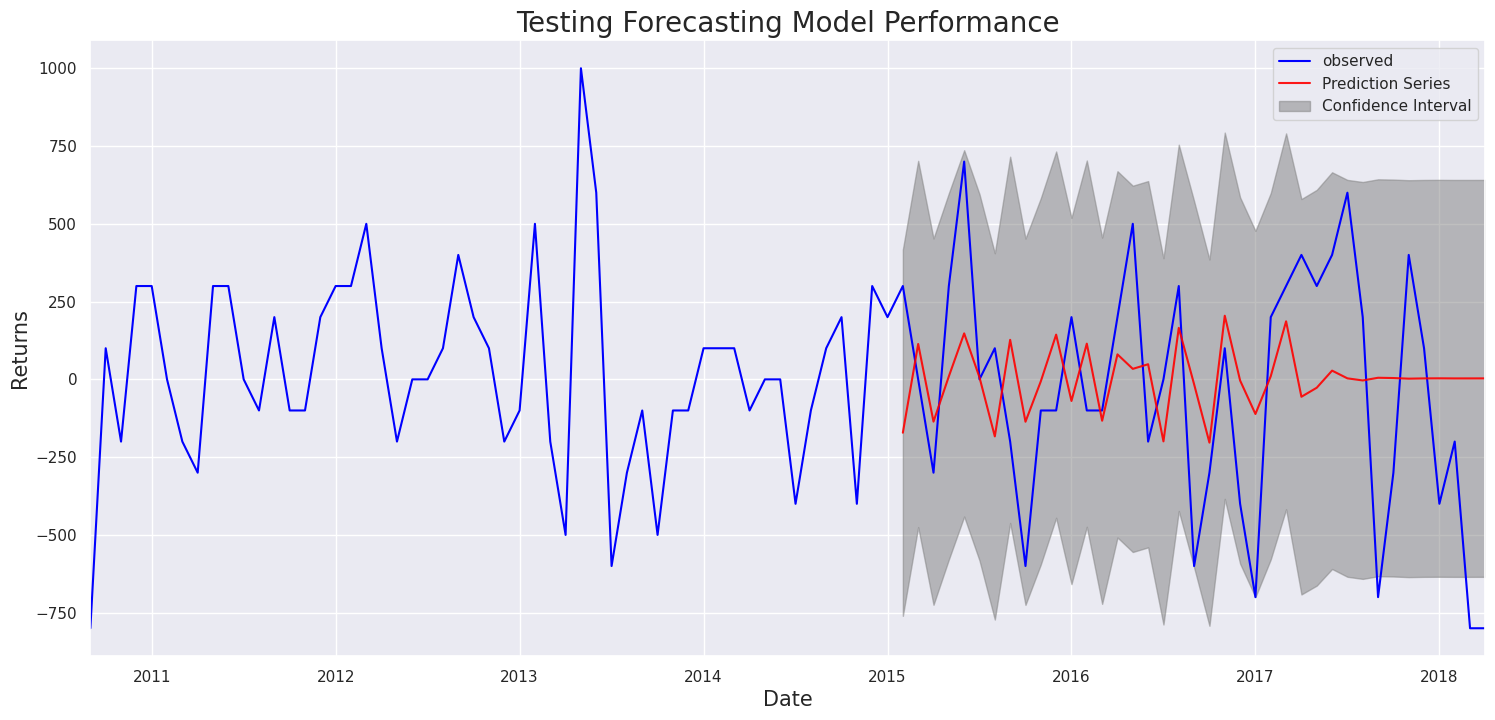

In [83]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 18, 8

# Plot observed values
ax = ts_85035.plot(label='observed',c="blue")

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='Prediction Series', alpha=0.9,c="red")

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='gray', alpha=0.5,label = 'Confidence Interval')

# Set axes labels
ax.set_xlabel('Date',fontsize=15)
ax.set_ylabel('Returns',fontsize=15)
ax.set_title('Testing Forecasting Model Performance',fontsize=20)
plt.legend()

plt.show()

In [84]:
pred = ARIMAmodel.get_prediction(start=test_85035.index.min(), end=pd.to_datetime('2018-04'), dynamic=False)

from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test_85035, pred.predicted_mean, squared=False)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 458.3160986591507


In [85]:
ARIMA_MODEL = ARIMA(ts_85035,
                    order=(2,0,1),
                    enforce_stationarity=False,
                    enforce_invertibility=False)


full_output = ARIMA_MODEL.fit()

print(full_output.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   92
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -643.575
Date:                Wed, 03 Jul 2024   AIC                           1297.149
Time:                        19:52:18   BIC                           1309.648
Sample:                    09-30-2010   HQIC                          1302.190
                         - 04-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0864     38.263     -0.028      0.977     -76.080      73.907
ar.L1         -0.2076      0.212     -0.980      0.327      -0.623       0.207
ar.L2         -0.1721      0.125     -1.381      0.1

In [86]:
# Getting a forecast for the next 36 months after the last recorded date on our dataset.
forecast = full_output.get_forecast(36)
future_prediction = forecast.conf_int()
future_prediction['Price'] = forecast.predicted_mean
future_prediction.columns = ['lower','upper','prediction']
future_prediction.head()

lower       upper  prediction
2018-05 -591.706153  615.964177   12.129012
2018-06 -515.337968  782.596121  133.629077
2018-07 -698.138082  635.493825  -31.322129
2018-08 -684.867372  648.888813  -17.989279
2018-09 -659.852195  675.100769    7.624287

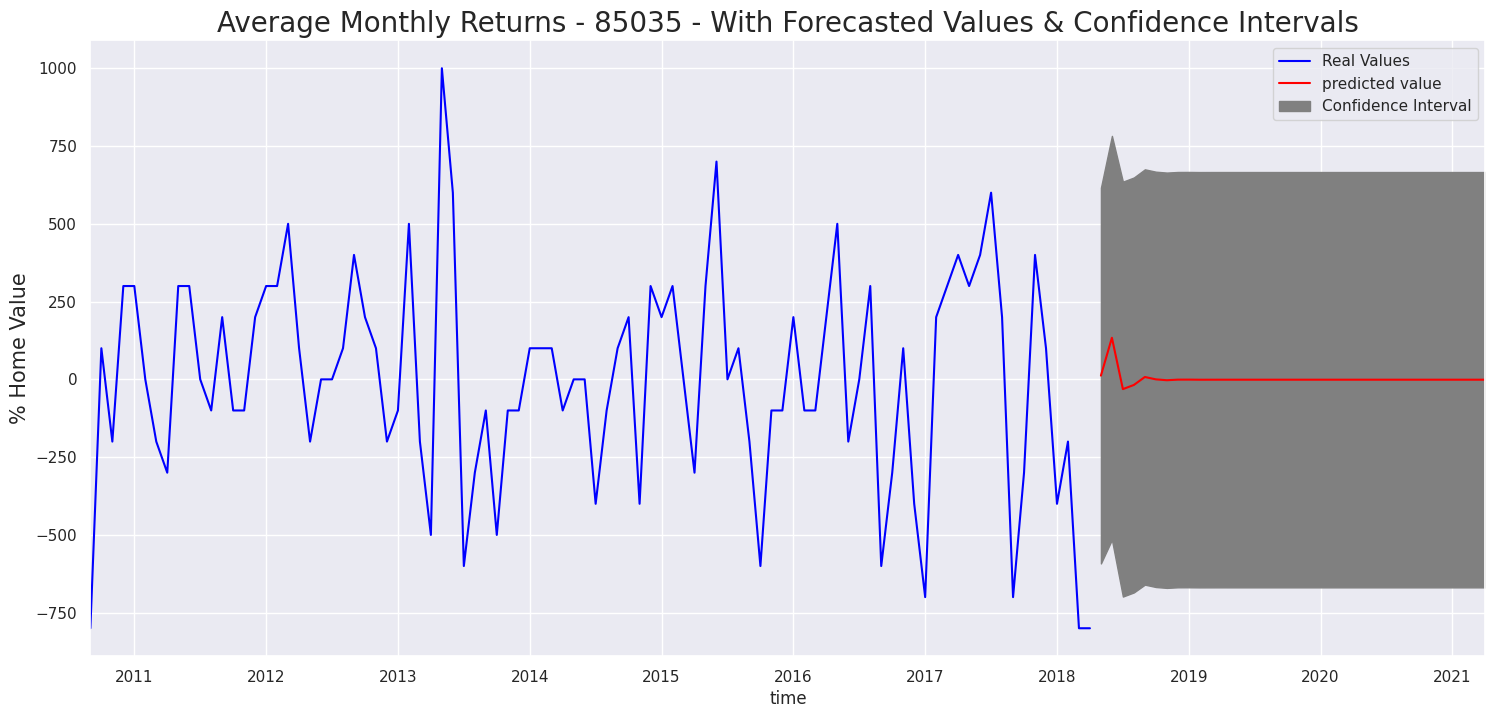

In [87]:
# Plotting our Forecast

fig, ax = plt.subplots()
ts_85035.plot(ax=ax,label='Real Values',c="blue")


future_prediction['prediction'].plot(ax=ax,label='predicted value',c="red")

ax.fill_between(x= future_prediction.index, y1= future_prediction['lower'],
                y2= future_prediction['upper'],color='gray',
                label='Confidence Interval')
ax.legend()
plt.ylabel("% Home Value",fontsize=15)
plt.title('Average Monthly Returns - 85035 - With Forecasted Values & Confidence Intervals',fontsize=20)
plt.show()

##### Forecasting for Every ZipCode

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


An error occurred for Zip Code 27980: Schur decomposition solver error.
Model summary for Zip Code 30032:
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   43
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -326.228
Date:                Wed, 03 Jul 2024   AIC                            662.456
Time:                        19:52:20   BIC                            671.145
Sample:                    10-01-2013   HQIC                           665.641
                         - 04-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4329      0.203      2.135      0.033       0.035       0.830
ar.L2         -0.3021    

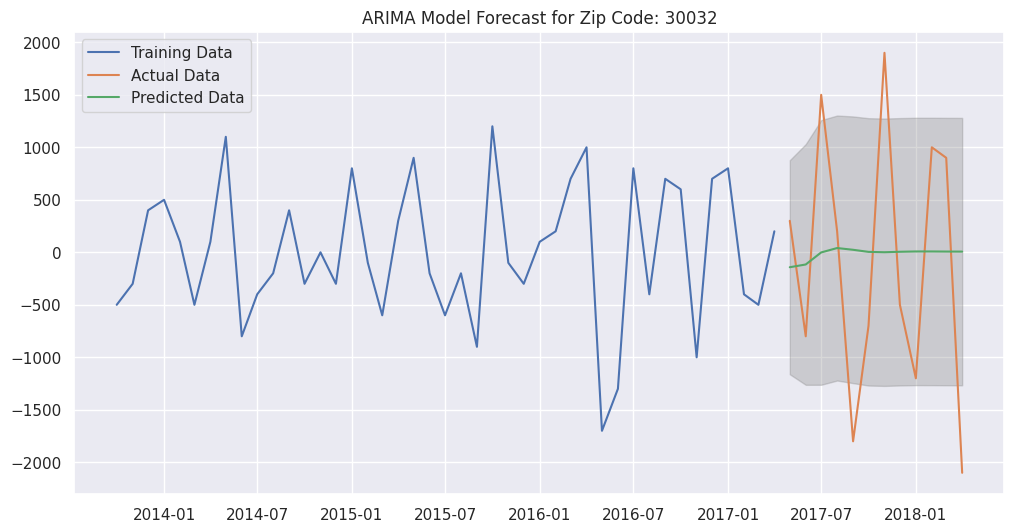

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Model summary for Zip Code 33974:
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                    0
Model:                 ARIMA(1, 1, 1)   Log Likelihood                   0.000
Date:                Wed, 03 Jul 2024   AIC                              6.000
Time:                        19:52:20   BIC                                nan
Sample:                             0   HQIC                               nan
                                  - 0                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0        nan        nan           0           0
sigma2         1.0

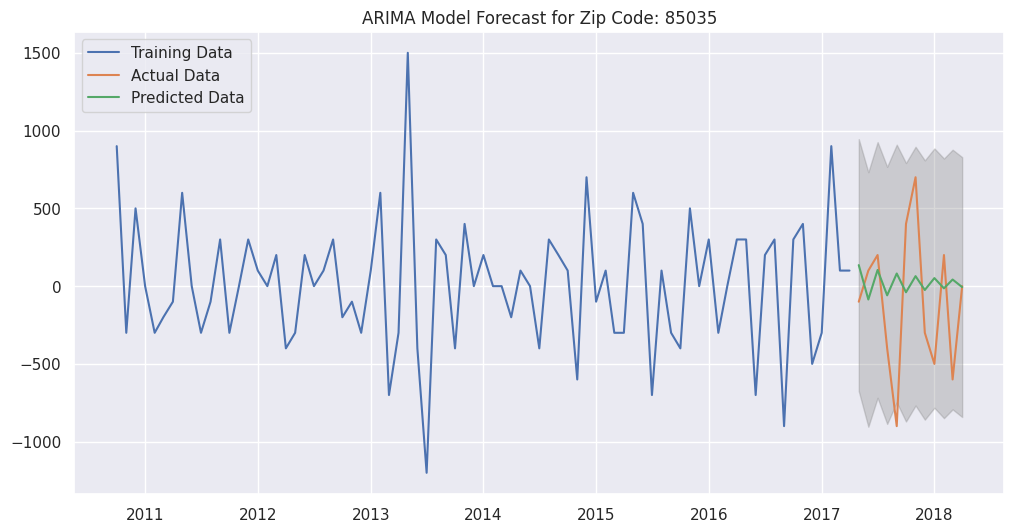

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


# Dictionary of zip codes with their (p, d, q) values
zip_codes_params = {
    27980: (1, 1, 3),
    30032: (2, 1, 2),
    33974: (1, 1, 1),
    80216: (1, 1, 2),
    85035: (1, 1, 2)
}

# Dictionary of time series data for each zip code
zip_codes_data = {
    27980: ts_27980,
    30032: ts_30032,
    33974: ts_33974,
    80216: ts_80216,
    85035: ts_85035
}

# Looping over each zip code and fit the ARIMA model
for zip_code, (p, d, q) in zip_codes_params.items():
    ts_data = zip_codes_data[zip_code]

    if isinstance(ts_data.index, pd.PeriodIndex):
        ts_data.index = ts_data.index.to_timestamp()

    if d > 0:
        ts_data = ts_data.diff().dropna()

    train_data = ts_data.iloc[:-12]
    test_data = ts_data.iloc[-12:]

    try:
        # Fit the ARIMA model
        model = ARIMA(train_data, order=(p, d, q))
        model_fit = model.fit()

        # Print model summary to inspect details
        print(f"Model summary for Zip Code {zip_code}:")
        print(model_fit.summary())

        # Generate forecasts
        forecast_result = model_fit.get_forecast(steps=len(test_data))

        # Extract forecast mean and confidence intervals
        forecast = forecast_result.predicted_mean
        conf_int = forecast_result.conf_int()

        # Create DataFrame to hold the forecast and the confidence intervals
        forecast_df = pd.DataFrame(index=test_data.index)
        forecast_df['Prediction'] = forecast
        forecast_df['Lower Limit'] = conf_int.iloc[:, 0]
        forecast_df['Upper Limit'] = conf_int.iloc[:, 1]

        # Print forecast DataFrame to inspect
        print(f"Forecast for Zip Code: {zip_code}")
        print(forecast_df.head())

        # Plotting the forecast with confidence intervals
        plt.figure(figsize=(12, 6))
        plt.plot(train_data.index, train_data, label='Training Data')
        plt.plot(test_data.index, test_data, label='Actual Data')
        plt.plot(forecast_df.index, forecast_df['Prediction'], label='Predicted Data')
        plt.fill_between(forecast_df.index, forecast_df['Lower Limit'], forecast_df['Upper Limit'], color='grey', alpha=0.3)
        plt.legend(loc='upper left')
        plt.title(f'ARIMA Model Forecast for Zip Code: {zip_code}')
        plt.show()

    except Exception as e:
        print(f"An error occurred for Zip Code {zip_code}: {e}")


In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Dictionary of zip codes with their (p, d, q) values
zip_codes_params = {
    27980: (1, 1, 3),
    30032: (2, 1, 2),
    33974: (1, 1, 1),
    80216: (1, 1, 2),
    85035: (1, 1, 2)
}

# Dictionary of time series data for each zip code
zip_codes_data = {
    27980: ts_27980,
    30032: ts_30032,
    33974: ts_33974,
    80216: ts_80216,
    85035: ts_85035
}

# Function to perform rolling origin cross-validation
def rolling_origin_validation(ts_data, p, d, q, forecast_steps=12):
    errors = []
    predictions = []

    # Perform rolling origin cross-validation
    for i in range(len(ts_data) - forecast_steps):
        train_data = ts_data.iloc[:i + forecast_steps]
        test_data = ts_data.iloc[i + forecast_steps:i + forecast_steps + forecast_steps]

        try:
            # Fit the ARIMA model
            model = ARIMA(train_data, order=(p, d, q))
            model_fit = model.fit()

            # Make forecasts
            forecast_result = model_fit.forecast(steps=forecast_steps)
            forecast = forecast_result[0]

            # Calculate error (e.g., Mean Absolute Error)
            error = (forecast - test_data.values).mean()
            errors.append(error)
            predictions.append(forecast)

        except Exception as e:
            print(f"An error occurred: {e}")
            errors.append(None)
            predictions.append(None)

    return errors, predictions

# Looping over each zip code and perform cross-validation
for zip_code, (p, d, q) in zip_codes_params.items():
    ts_data = zip_codes_data[zip_code]

    if isinstance(ts_data.index, pd.PeriodIndex):
        ts_data.index = ts_data.index.to_timestamp()

    if d > 0:
        ts_data = ts_data.diff().dropna()

    try:
        # Perform cross-validation
        errors, predictions = rolling_origin_validation(ts_data, p, d, q)

        # Print errors or further analysis
        print(f"Cross-validation errors for Zip Code {zip_code}:")
        print(errors)

        # Optionally, you can aggregate errors or perform further analysis

    except Exception as e:
        print(f"An error occurred for Zip Code {zip_code}: {e}")



Cross-validation errors for Zip Code 27980:
[]
Cross-validation errors for Zip Code 30032:
[327.4792898831529, -792.2097374025651, 97.05167818985599, -129.59666018737167, 397.01768663240733, 18.759273014642485, 95.46186509673021, 88.42868108654655, -308.7149135223928, -219.95954821047766, 477.81672866541857, 545.7921828672675, 433.29988379339346, 298.05415769564587, -26.949108314916412, 62.25454255723229, 3.991770811957925, -97.89732772811742, -433.1845660570645, 536.6437370113057, -559.7429539371728, 608.5623720523544, 764.6177720494192, 355.70274374366437, 327.127523729808, -99.80197199316444, -58.22669887029959, -22.84151169841841, -480.9932191527276, -609.8018604871974, -297.270281178011, -33.81166524469628, -190.82931184555312, 83.78154838341698, -323.1127834015416, -441.472325118226, 63.780175025011694, 866.7104593234508, 593.0390512580284, 38.51295545855737, 666.0119276532488, 983.4975379670896, 1579.013308650477]
Cross-validation errors for Zip Code 33974:
[]
Cross-validation e

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Looping over each zip code and fit the ARIMA model
results = {} # Initialize a dictionary to store results
for zip_code, (p, d, q) in zip_codes_params.items():

    try:

        # Calculate and store metrics for each zipcode
        mae = mean_absolute_error(test_data, forecast)
        mse = mean_squared_error(test_data, forecast)
        rmse = np.sqrt(mse)

        results[zip_code] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

    except Exception as e:
        print(f"An error occurred for Zip Code {zip_code}: {e}")

# Print the evaluation metrics for each zipcode
for zip_code, metrics in results.items():
    print(f"Metrics for Zip Code {zip_code}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")

Metrics for Zip Code 27980:
MAE: 383.6408380130756
MSE: 217832.58860065005
RMSE: 466.72538885371347
Metrics for Zip Code 30032:
MAE: 383.6408380130756
MSE: 217832.58860065005
RMSE: 466.72538885371347
Metrics for Zip Code 33974:
MAE: 383.6408380130756
MSE: 217832.58860065005
RMSE: 466.72538885371347
Metrics for Zip Code 80216:
MAE: 383.6408380130756
MSE: 217832.58860065005
RMSE: 466.72538885371347
Metrics for Zip Code 85035:
MAE: 383.6408380130756
MSE: 217832.58860065005
RMSE: 466.72538885371347


### 2. SARIMA Model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


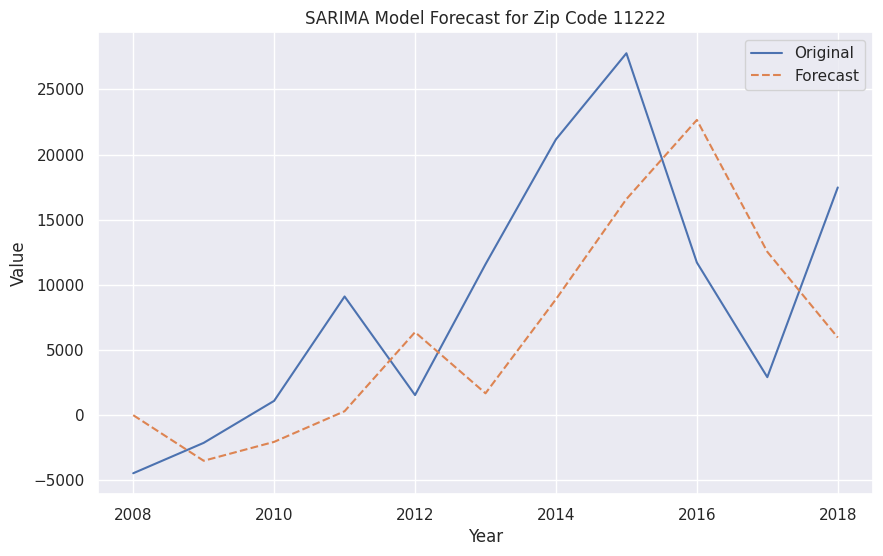

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


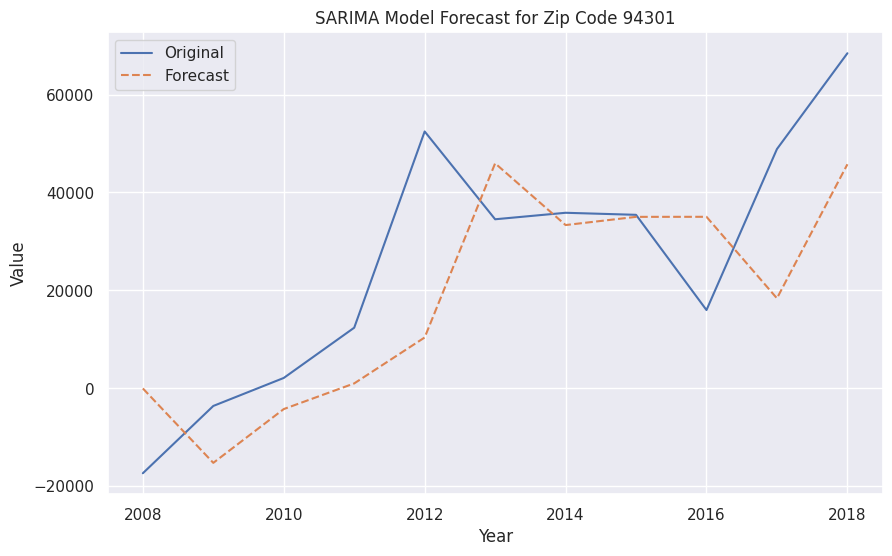

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


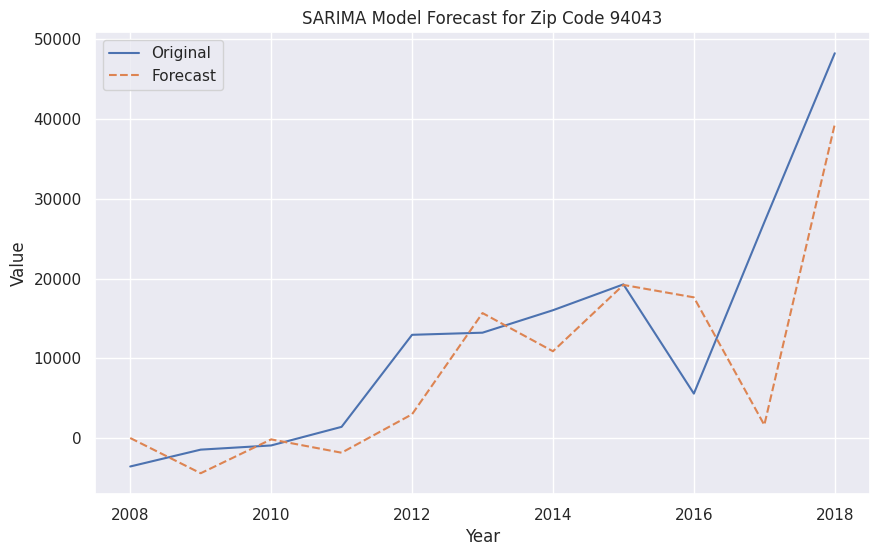

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


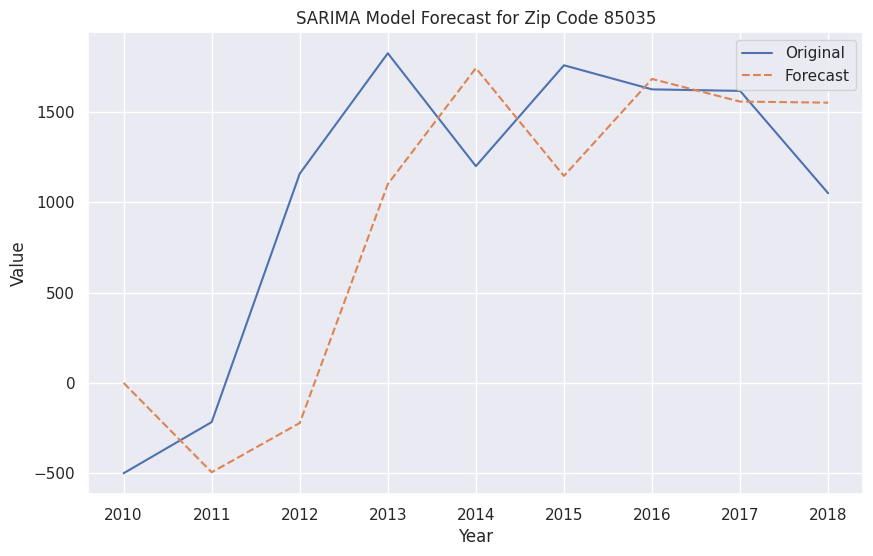

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


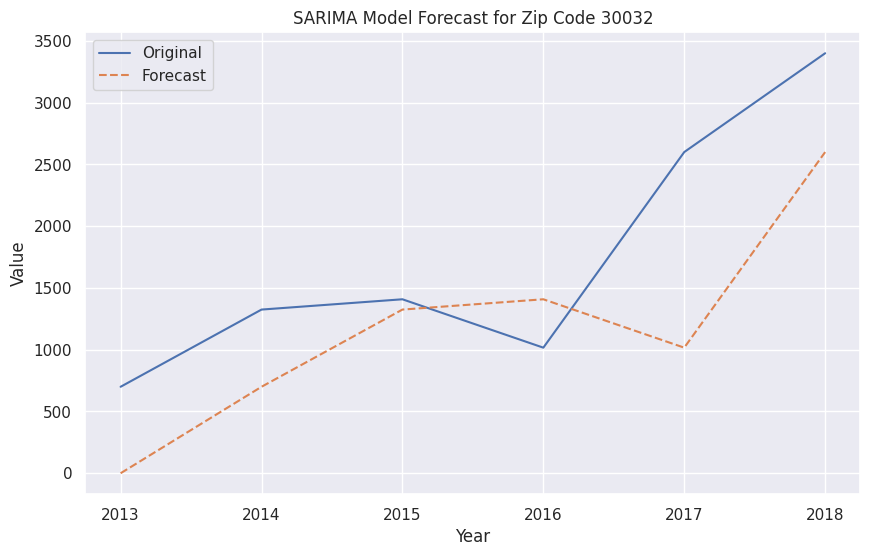

In [91]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create a list to store forecast results for each zip code
forecast_results = []

# Loop through each unique zip code
for zip_code in df4['ZipCode'].unique():
    # Filter the data for the current zip code
    df_zip = df4[df4['ZipCode'] == zip_code]

    # Group by year and calculate mean value
    df_yearly = df_zip.groupby('year').agg({'value': 'mean'})

    # Define the SARIMA model
    model = SARIMAX(df_yearly['value'], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))

    # Fit the model
    results = model.fit(disp=False)

    # Make predictions
    df_yearly['forecast'] = results.predict(start=0, end=len(df_yearly)-1, dynamic=False)

    # Store the forecast results
    forecast_results.append(df_yearly[['value', 'forecast']].reset_index())

    # Plot the original data and the forecast for the current zip code
    plt.figure(figsize=(10, 6))
    plt.plot(df_yearly.index, df_yearly['value'], label='Original')
    plt.plot(df_yearly.index, df_yearly['forecast'], label='Forecast', linestyle='--')
    plt.title(f'SARIMA Model Forecast for Zip Code {zip_code}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

### Conclusion

Based on ROI, the best zipcodes with their corresponding cities and states to invest in are as follows:

* 30032 Candler Mcafee GA, ROI - 219.01%
* 85035 Phoenix AZ, ROI - 211.41%
* 27980 Hertford NC, ROI - 197.31%
* 80216 Denver CO, ROI - 191.18%
* 33974 LeHigh Acres FL, ROI - 165.65%


### Recommendation


1. All the seslected zip codes(top 5) have a promising predicted value, as they are in the positive.

2. Based on the above graph, we can forecast our top five recommendations and their expected ROI after three years.

3. The investor can then decide to invest in any of the recommended zip codes.